In [1]:
import pandas as pd 
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import random 

def top_values(data,
               col: str,
               print_n: int=10) -> pd.Series:
    ''' Return the first 10 (default)
        values of a series'''
    return (data.loc[:, col]
            .value_counts()
            .sort_values(ascending=False)
            .iloc[:print_n])
# from sklearn import linear_model

In [2]:
# The dataset comes from the website open food facts.
!wc -l 'csv_files/data.csv'

2686037 csv_files/data.csv


In [5]:
# The CSV file is too big to be read at once.
# (2_686_036 rows, 196 columns)
data_en = pd.read_csv('./csv_files/data.csv', sep='\t', nrows=5)
data_en

code                                                url  \
0        225  http://world-en.openfoodfacts.org/product/0000...   
1  207025004  http://world-en.openfoodfacts.org/product/0000...   
2    3429145  http://world-en.openfoodfacts.org/product/0000...   
3   26772226  http://world-en.openfoodfacts.org/product/0000...   
4         17  http://world-en.openfoodfacts.org/product/0000...   

          creator   created_t      created_datetime  last_modified_t  \
0  nutrinet-sante  1623855208  2021-06-16T14:53:28Z       1623855209   
1         kiliweb  1656948610  2022-07-04T15:30:10Z       1656948613   
2         kiliweb  1630483911  2021-09-01T08:11:51Z       1656488106   
3         kiliweb  1654250311  2022-06-03T09:58:31Z       1654270474   
4         kiliweb  1529059080  2018-06-15T10:38:00Z       1561463718   

  last_modified_datetime      product_name  abbreviated_product_name  \
0   2021-06-16T14:53:29Z    jeunes pousses                       NaN   
1   2022-07-04T15:30:13Z             Andrè                       NaN   
2   2022-06-29T07:35:06Z           L.casei                       NaN   
3   2022-06-03T15:34:34Z              Skyr                       NaN   
4   2019-06-25T11:55:18Z  Vitória crackers                       NaN   

   generic_name  ... carbon-footprint-from-meat-or-fish_100g  \
0           NaN  ...                                     NaN   
1           NaN  ...                                     NaN   
2           NaN  ...                                     NaN   
3           NaN  ...                                     NaN   
4           NaN  ...                                     NaN   

   nutrition-score-fr_100g  nutrition-score-uk_100g  glycemic-index_100g  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                     -5.0                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   water-hardness_100g choline_100g phylloquinone_100g beta-glucan_100g  \
0                  NaN          NaN                NaN              NaN   
1                  NaN          NaN                NaN              NaN   
2                  NaN          NaN                NaN              NaN   
3                  NaN          NaN                NaN              NaN   
4                  NaN          NaN                NaN              NaN   

  inositol_100g carnitine_100g  
0           NaN            NaN  
1           NaN            NaN  
2           NaN            NaN  
3           NaN            NaN  
4           NaN            NaN  

[5 rows x 196 columns]

I want to create a very short list of interesting features found in the [features description](https://world.openfoodfacts.org/data/data-fields.txt) to start with.

- code
- product_name
- categories
- nutrition_grade_fr
- nutrition-score-fr_100g
- main_category
- main_category_fr



In [6]:
features = ['code',
            'product_name',
            'categories',
            'main_category',
            'main_category_fr',
            'nutrition_grade_fr',
            'nutrition-score-fr_100g',
            ]

# selecting only those columns on the first 200_000 products.
data_sel = pd.read_csv('./csv_files/data.csv',
                   sep='\t',
                   usecols=features,
                   nrows=2e5)


ValueError: Usecols do not match columns, columns expected but not found: ['main_category_fr', 'nutrition_grade_fr']

In [7]:
# feature_fr seem to not be included. Let's try with another CSV file
# provided in the OpenClassrooms website.
data_fr = pd.read_csv('./csv_files/fr.openfoodfacts.org.products.csv',
                      sep='\t',
                      nrows=5)


In [2]:
!wc -l 'csv_files/fr.openfoodfacts.org.products.csv'

320750 csv_files/fr.openfoodfacts.org.products.csv


In [8]:
data_fr.shape

(5, 162)

In [9]:
# the features list is not the same. (196 != 162)
features_only_fr = data_fr.columns.difference(data_en.columns)
print(features_only_fr)
print(len(features_only_fr))

Index(['additives_fr', 'allergens_fr', 'alpha-linolenic-acid_100g',
       'arachidic-acid_100g', 'arachidonic-acid_100g', 'behenic-acid_100g',
       'butyric-acid_100g', 'capric-acid_100g', 'caproic-acid_100g',
       'caprylic-acid_100g', 'categories_fr', 'cerotic-acid_100g',
       'countries_fr', 'dihomo-gamma-linolenic-acid_100g',
       'docosahexaenoic-acid_100g', 'eicosapentaenoic-acid_100g',
       'elaidic-acid_100g', 'erucic-acid_100g', 'fructose_100g',
       'gamma-linolenic-acid_100g', 'glucose_100g', 'gondoic-acid_100g',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_tags', 'labels_fr',
       'lactose_100g', 'lauric-acid_100g', 'lignoceric-acid_100g',
       'linoleic-acid_100g', 'main_category_fr', 'maltodextrins_100g',
       'maltose_100g', 'mead-acid_100g', 'melis

In [10]:
features_only_en = data_en.columns.difference(data_fr.columns)
print(features_only_en)
print(len(features_only_en))

Index(['-alpha-linolenic-acid_100g', '-arachidic-acid_100g',
       '-arachidonic-acid_100g', '-behenic-acid_100g', '-butyric-acid_100g',
       '-capric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
       '-cerotic-acid_100g', '-dihomo-gamma-linolenic-acid_100g',
       '-docosahexaenoic-acid_100g', '-eicosapentaenoic-acid_100g',
       '-elaidic-acid_100g', '-erucic-acid_100g', '-fructose_100g',
       '-gamma-linolenic-acid_100g', '-glucose_100g', '-gondoic-acid_100g',
       '-lactose_100g', '-lauric-acid_100g', '-lignoceric-acid_100g',
       '-linoleic-acid_100g', '-maltodextrins_100g', '-maltose_100g',
       '-mead-acid_100g', '-melissic-acid_100g', '-montanic-acid_100g',
       '-myristic-acid_100g', '-nervonic-acid_100g', '-oleic-acid_100g',
       '-palmitic-acid_100g', '-stearic-acid_100g', '-sucrose_100g',
       'abbreviated_product_name', 'additives_en', 'allergens_en',
       'beta-glucan_100g', 'brand_owner',
       'carbon-footprint-from-meat-or-fish_100g'

In [11]:
# More features are common. Need to strip for matching.
features_mod = {feat: feat.lstrip(' -') for feat in data_en.columns}

In [12]:
data_en.rename(columns=features_mod, inplace=True)

In [13]:
features_only_en = data_en.columns.difference(data_fr.columns)
print(features_only_en)
print(len(features_only_en))

Index(['abbreviated_product_name', 'additives_en', 'allergens_en',
       'beta-glucan_100g', 'brand_owner',
       'carbon-footprint-from-meat-or-fish_100g', 'carnitine_100g',
       'categories_en', 'choline_100g', 'completeness', 'countries_en',
       'data_quality_errors_tags', 'ecoscore_grade', 'ecoscore_score',
       'energy-kcal_100g', 'energy-kj_100g', 'food_groups', 'food_groups_en',
       'food_groups_tags', 'fruits-vegetables-nuts-dried_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'fruits-vegetables-nuts-estimate_100g', 'image_ingredients_small_url',
       'image_ingredients_url', 'image_nutrition_small_url',
       'image_nutrition_url', 'ingredients_analysis_tags', 'ingredients_tags',
       'inositol_100g', 'insoluble-fiber_100g', 'labels_en',
       'last_image_datetime', 'last_image_t', 'main_category_en', 'nova_group',
       'nutrient_levels_tags', 'nutriscore_grade', 'nutriscore_score',
       'origins_en', 'owner', 'packaging_en'

In [14]:
features_only_fr = data_fr.columns.difference(data_en.columns)
print(features_only_fr)
print(len(features_only_fr))

Index(['additives_fr', 'allergens_fr', 'categories_fr', 'countries_fr',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_tags', 'labels_fr',
       'main_category_fr', 'nutrition_grade_fr', 'nutrition_grade_uk',
       'states_fr', 'traces_fr'],
      dtype='object')
16


In [15]:
50 - 16 == 196 - 162

True

In [17]:
# From above, I see that nothing important seem to be missing
# in the 'world' data set. Differences are mainly about translation.
# Information about 'palm_oil' (which seem to be missing) are probably
# contained in the feature named 'ecoscore'.
common_features = data_en.columns.intersection(data_fr.columns)
print(len(common_features))

146


### Wondering if the world data set is an extension of the french one

In [ ]:
# Are those really common, or can I find information in one CSV file
# and not in the other?
categories_en = pd.read_csv('./csv_files/data.csv',
                            usecols=['code','categories'],
                            sep='\t')
categories_fr = pd.read_csv('./csv_files/fr.openfoodfacts.org.products.csv',
                            usecols=['code','categories'],
                            sep='\t')

In [ ]:
print(categories_en.shape)
print(categories_en.isnull().mean())
print(categories_fr.shape)
print(categories_fr.isnull().mean())

(2686036, 2)
code          0.000000
categories    0.586775
dtype: float64
(320772, 2)
code          0.000072
categories    0.736854
dtype: float64


In [ ]:
# The second data set has more missing values in percentage
# (regarding categories).
both_categories = categories_en.join(categories_fr.set_index('code'),
                                     on='code',
                                     how='outer',
                                     rsuffix='_fr')

In [ ]:
both_categories.shape

(2758010, 3)

In [ ]:
both_categories.shape[0]-categories_en.shape[0]

71974

In [ ]:
# If my hypothesis is correct (that the world database was made after
# the french one), quite a lot of products were not copied... Or they
# changed 'code' in between... Thus code is not a good identifier ?
both_categories.columns

Index(['code', 'categories', 'categories_fr'], dtype='object')

In [ ]:
both_categories.head(15)

code  \
0.0        00000000000000225   
1.0   0000000000000207025004   
2.0     00000000000003429145   
3.0     00000000000026772226   
4.0            0000000000017   
5.0            0000000000031   
6.0       000000000003327986   
7.0       000000000004128579   
8.0       000000000004622327   
9.0              00000000001   
10.0           0000000000100   
11.0           0000000000123   
12.0           0000000000178   
13.0           0000000000208   
14.0           0000000000284   

                                             categories categories_fr  
0.0                                                 NaN           NaN  
1.0                                                 NaN           NaN  
2.0                                                 NaN           NaN  
3.0   Produits laitiers, Desserts, Produits fermenté...           NaN  
4.0                                                 NaN           NaN  
5.0                                                 NaN           NaN  
6.0                                                 NaN           NaN  
7.0                                                 NaN           NaN  
8.0                                                 NaN           NaN  
9.0                                                 NaN           NaN  
10.0        en:groceries, Condiments, Sauces, Moutardes           NaN  
11.0                                                NaN           NaN  
12.0                                                NaN           NaN  
13.0                                                NaN           NaN  
14.0                                                NaN           NaN

In [ ]:
diff = (both_categories.
        loc[both_categories.categories 
            != both_categories.categories_fr])
diff.shape

(2757074, 3)

In [ ]:
equal = (both_categories.
         loc[both_categories.categories 
             == both_categories.categories_fr])
equal.shape

(936, 3)

In [ ]:
equal.tail(10)

code                    categories  \
2652343.0  9312726002758                    Hommus Dip   
2652787.0  9314137003263                 Psyllium husk   
2653442.0  9315822010863              Frozen Dumplings   
2653598.0  9316131600592                 Coconut flour   
2653661.0  9316401200460                        Snacks   
2653874.0  9317224401058                   Taco Shells   
2654205.0  9318020601000                  Cherry Juice   
2665406.0       93695152                    Meat Paste   
2666092.0  9400547012114               Canned apricots   
2666134.0  9400550602487  Chocolate covered muesli bar   

                          categories_fr  
2652343.0                    Hommus Dip  
2652787.0                 Psyllium husk  
2653442.0              Frozen Dumplings  
2653598.0                 Coconut flour  
2653661.0                        Snacks  
2653874.0                   Taco Shells  
2654205.0                  Cherry Juice  
2665406.0                    Meat Paste  
2666092.0               Canned apricots  
2666134.0  Chocolate covered muesli bar

<AxesSubplot: >

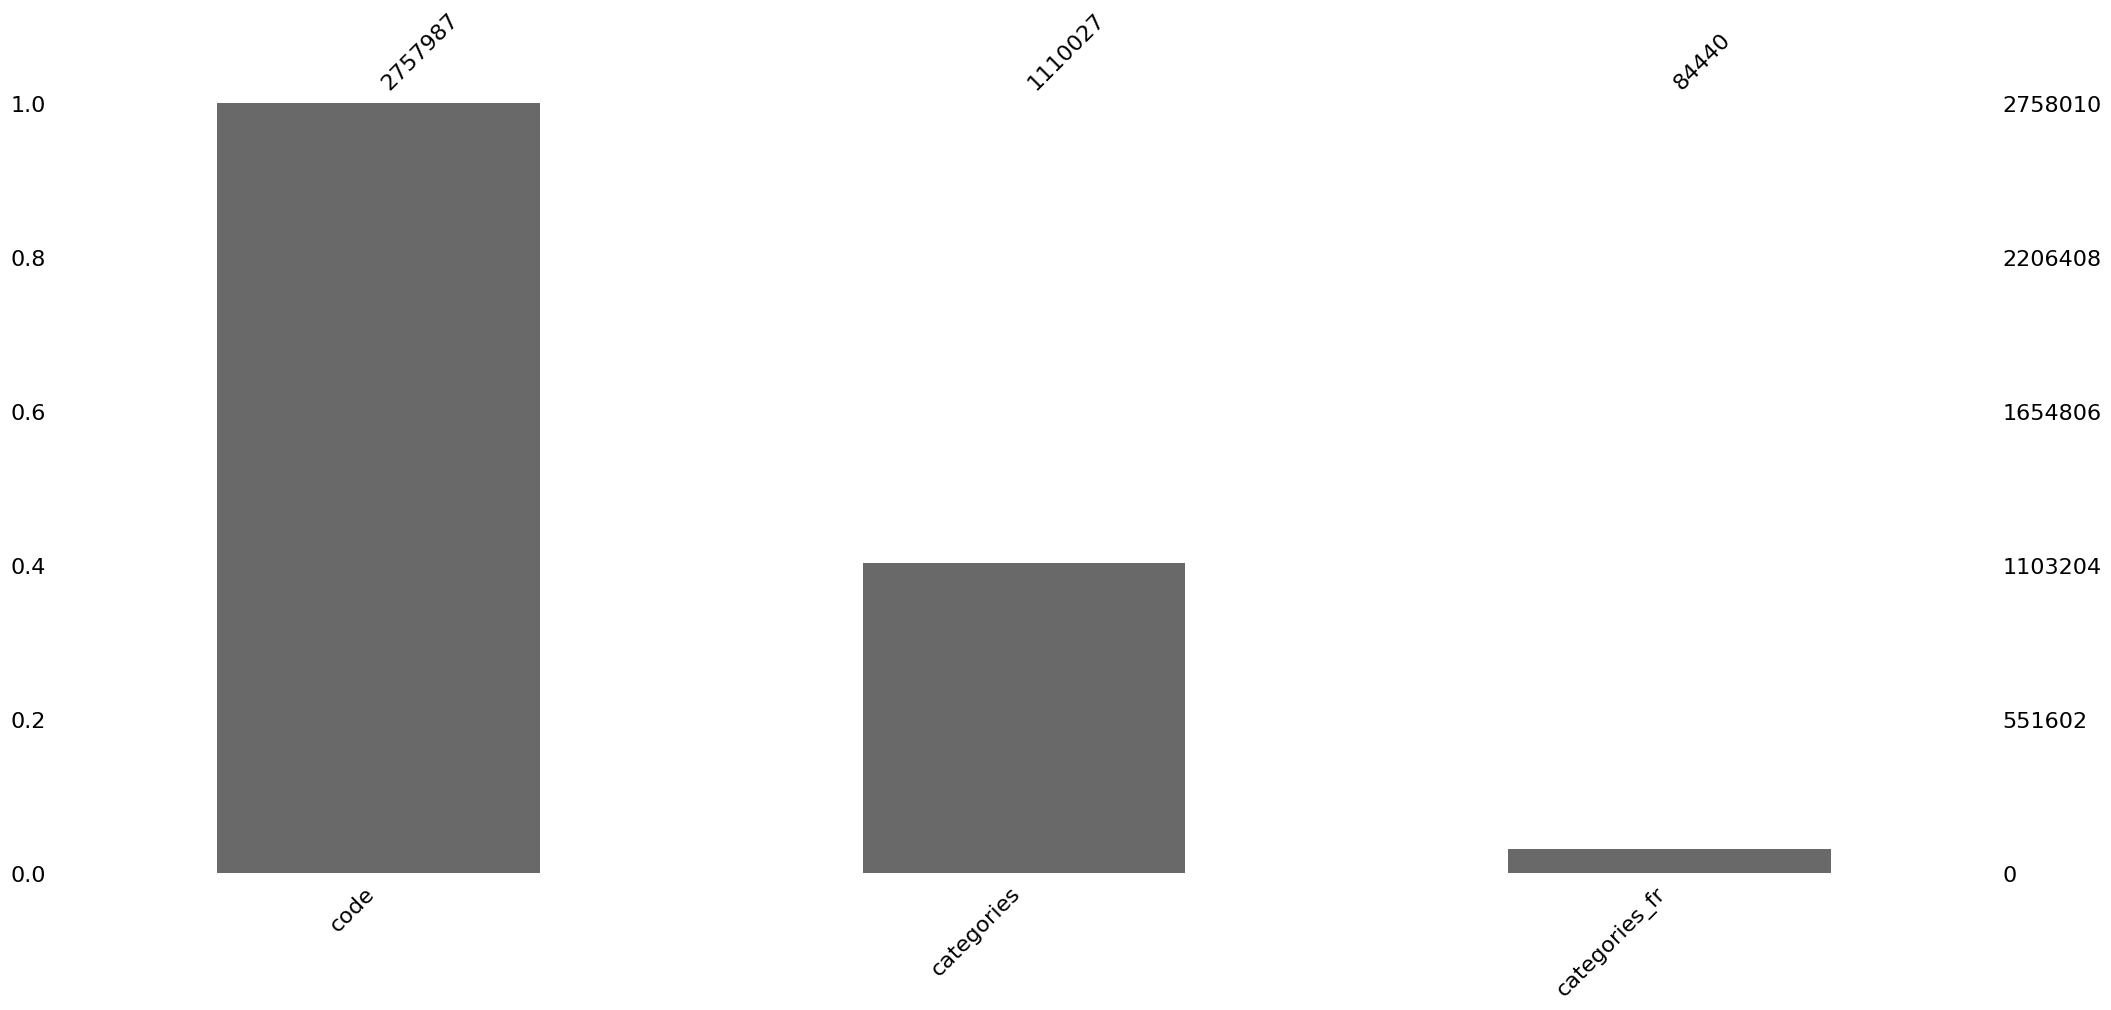

In [ ]:
msno.bar(both_categories)

I'm going to work with the world database (more info) ignoring that I could possibly try to search missing values in the other dataset for time purpose. 

#### visual inspection of all columns available

As the website does not seem to be updated...

In [18]:
data = pd.read_csv('./csv_files/data.csv',
                   sep='\t',
                   nrows=1)

In [19]:
for feat in data.columns:
    print(feat)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_en
packaging_text
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
ingredients_tags
ingredients_analysis_tags
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutriments
additives_n
additives
additives_tags
additives_en
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
food_groups
food_groups_tags
food_groups_en
states
states_tags
states_en
brand_owner
ecoscore_score
ecoscore_grade
nutrient_levels_tags
product_quantity
owner
data_quality_errors_tags
unique_scans_n
popularity_tags
completeness

I copied that in 'features.txt'

First I want to see the difference between some features and their _tags version.

After that, I will start a list of features to inspect.

In [20]:
mycols = ['packaging',
          'packaging_tags',
          'manufacturing_places',
          'manufacturing_places_tags',
          'countries',
          'countries_tags']

data = pd.read_csv('./csv_files/data.csv',
                   sep='\t',
                   nrows=20000,
                   usecols=mycols)

In [21]:
data.head(20)

packaging packaging_tags manufacturing_places manufacturing_places_tags  \
0        NaN            NaN                  NaN                       NaN   
1        NaN            NaN                  NaN                       NaN   
2        NaN            NaN                  NaN                       NaN   
3        NaN            NaN                  NaN                       NaN   
4        NaN            NaN                  NaN                       NaN   
5        NaN            NaN                  NaN                       NaN   
6        NaN            NaN                  NaN                       NaN   
7        NaN            NaN                  NaN                       NaN   
8        NaN            NaN                  NaN                       NaN   
9        NaN            NaN                  NaN                       NaN   
10       NaN            NaN                  NaN                       NaN   
11       NaN            NaN                  NaN                       NaN   
12       NaN            NaN                  NaN                       NaN   
13       NaN            NaN                  NaN                       NaN   
14       NaN            NaN                  NaN                       NaN   
15       NaN            NaN                  NaN                       NaN   
16       NaN            NaN                  NaN                       NaN   
17       NaN            NaN                  NaN                       NaN   
18       NaN            NaN                  NaN                       NaN   
19       NaN            NaN                  NaN                       NaN   

           countries    countries_tags  
0          en:france         en:france  
1              en:de        en:germany  
2              Spain          en:spain  
3             France         en:france  
4             France         en:france  
5             France         en:france  
6            Espagne          en:spain  
7              en:es          en:spain  
8              en:es          en:spain  
9   en:United States  en:united-states  
10            France         en:france  
11            France         en:france  
12            France         en:france  
13            France         en:france  
14         en:france         en:france  
15            France         en:france  
16             en:fr         en:france  
17             en:fr         en:france  
18             en:fr         en:france  
19            France         en:france

In [22]:
print(data.countries.value_counts())
print(f'total : {data.countries.value_counts().sum()}\n')
print(data.countries_tags.value_counts())
print(f'total : {data.countries_tags.value_counts().sum()}\n')

United States                                10099
en:us                                         4076
France                                        1003
en:United States                               881
en:fr                                          749
                                             ...  
Royaume-Uni, en:france                           1
Franciaország,Nagy-Britannia,Magyarország        1
en:gi                                            1
República Dominicana                             1
France,Germany,Spain                             1
Name: countries, Length: 291, dtype: int64
total : 19955

en:united-states            15688
en:france                    2202
en:united-kingdom             356
en:spain                      351
en:canada                     282
                            ...  
en:moldova                      1
en:south-africa                 1
en:gibraltar                    1
en:france,en:switzerland        1
en:belgium,en:spain             1
Name: c

In [23]:
print(data.packaging.value_counts())
print(f'total : {data.packaging.value_counts().sum()}\n')
print(data.packaging_tags.value_counts())
print(f'total : {data.packaging_tags.value_counts().sum()}\n')

Plastic                          45
Plastique                        25
Plastique, Sachet                17
Carton                           16
en:card-box                      15
                                 ..
אט                                1
Cartone                           1
Ldpe-bag, Plastic - film          1
Plastique, Boîte en plastique     1
Glass, Paper, Bottle              1
Name: packaging, Length: 440, dtype: int64
total : 846

en:plastic                          83
en:bag                              27
en:plastic,en:bag                   26
en:pet-bottle                       23
en:canned                           20
                                    ..
en:8                                 1
en:אט                                1
en:ldpe-bag,en:plastic-film          1
en:plastic,fr:boite-en-plastique     1
en:glass,en:paper,en:bottle          1
Name: packaging_tags, Length: 360, dtype: int64
total : 846



In [24]:
print(data.manufacturing_places.value_counts())
print(f'total : {data.manufacturing_places.value_counts().sum()}\n')
print(data.manufacturing_places_tags.value_counts())
print(f'total : {data.manufacturing_places_tags.value_counts().sum()}\n')

Royaume-Uni                             30
France                                  17
Italie                                  14
United Kingdom                          13
United States                           12
                                        ..
87500 Saint Yrieix                       1
Ireland                                  1
Good Organics Gmbh                       1
Allemagne                                1
Avery Island,Luisiana,Estados Unidos     1
Name: manufacturing_places, Length: 103, dtype: int64
total : 227

royaume-uni                             31
france                                  19
italie                                  14
united-kingdom                          13
united-states                           12
                                        ..
black-sheep-brewery                      1
ukraine                                  1
87500-saint-yrieix                       1
ireland                                  1
avery-island,luisiana,estados-

_tags version seem to be processed columns with some sort of standardization.

Based on the name, I'd like to have a look at :

- code
- product_name
- generic_name
- quantity
- brands
- categories
- packaging_tags
- origins_tags
- labels_tags
- countries_tags
- ingredients_tags
- ingredients_fr
- nutriscore_score
- nutriscore_grade
- food_groups_tags
- ecoscore_grade
- ecoscore_score
- data_quality_errors_tags
- popularity_tags
- completeness   
- main_category
- additives_n
- additives_tags
- nova_group
- carbon-footprint_100g
- carbon-footprint-from-meat-or-fish_100g
- nutrition-score-fr_100g
- nutrition-score-uk_100g
- glycemic-index_100g

note : nova (how much the product has been modified)

I found a better [description of the data fields ?](https://wiki.openfoodfacts.org/Data_fields)


In [6]:
with open('./features_first_selection.txt') as fin:
    features = [feat.strip('- \n')for feat in fin]
features

['code',
 'product_name',
 'generic_name',
 'quantity',
 'brands',
 'categories',
 'packaging_tags',
 'origins_tags',
 'labels_tags',
 'countries_tags',
 'ingredients_tags',
 'nutriscore_score',
 'nutriscore_grade',
 'food_groups_tags',
 'ecoscore_grade',
 'ecoscore_score',
 'data_quality_errors_tags',
 'popularity_tags',
 'completeness',
 'main_category',
 'additives_n',
 'additives_tags',
 'nova_group',
 'carbon-footprint_100g',
 'carbon-footprint-from-meat-or-fish_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g',
 'glycemic-index_100g']

In [7]:
# # Opening a sample of products, randomly chosen.
# rows = 2_686_037
# sample_size = int(1e5) 
# # The rows numbers to be skipped (keeping 0 which contains 
# # columns name) :
# skiprows = sorted(random.sample(range(1, rows+1), rows+1-sample_size))

# Skipping rows goes through the whole file. It is not much faster.
# I can keep all lines, as there is no memory problem.
data = pd.read_csv('./csv_files/data.csv',
                   sep='\t',
                   #skiprows=skiprows,
                   usecols=features,
                   dtype={'code': 'object'})

/tmp/ipykernel_10200/2953528614.py:10: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./csv_files/data.csv',


In [8]:
print(data.dtypes)
print(data.shape)

code                                        object
product_name                                object
generic_name                                object
quantity                                    object
packaging_tags                              object
brands                                      object
categories                                  object
origins_tags                                object
labels_tags                                 object
countries_tags                              object
ingredients_tags                            object
additives_n                                float64
additives_tags                              object
nutriscore_score                           float64
nutriscore_grade                            object
nova_group                                 float64
food_groups_tags                            object
ecoscore_score                             float64
ecoscore_grade                              object
data_quality_errors_tags       

<AxesSubplot: >

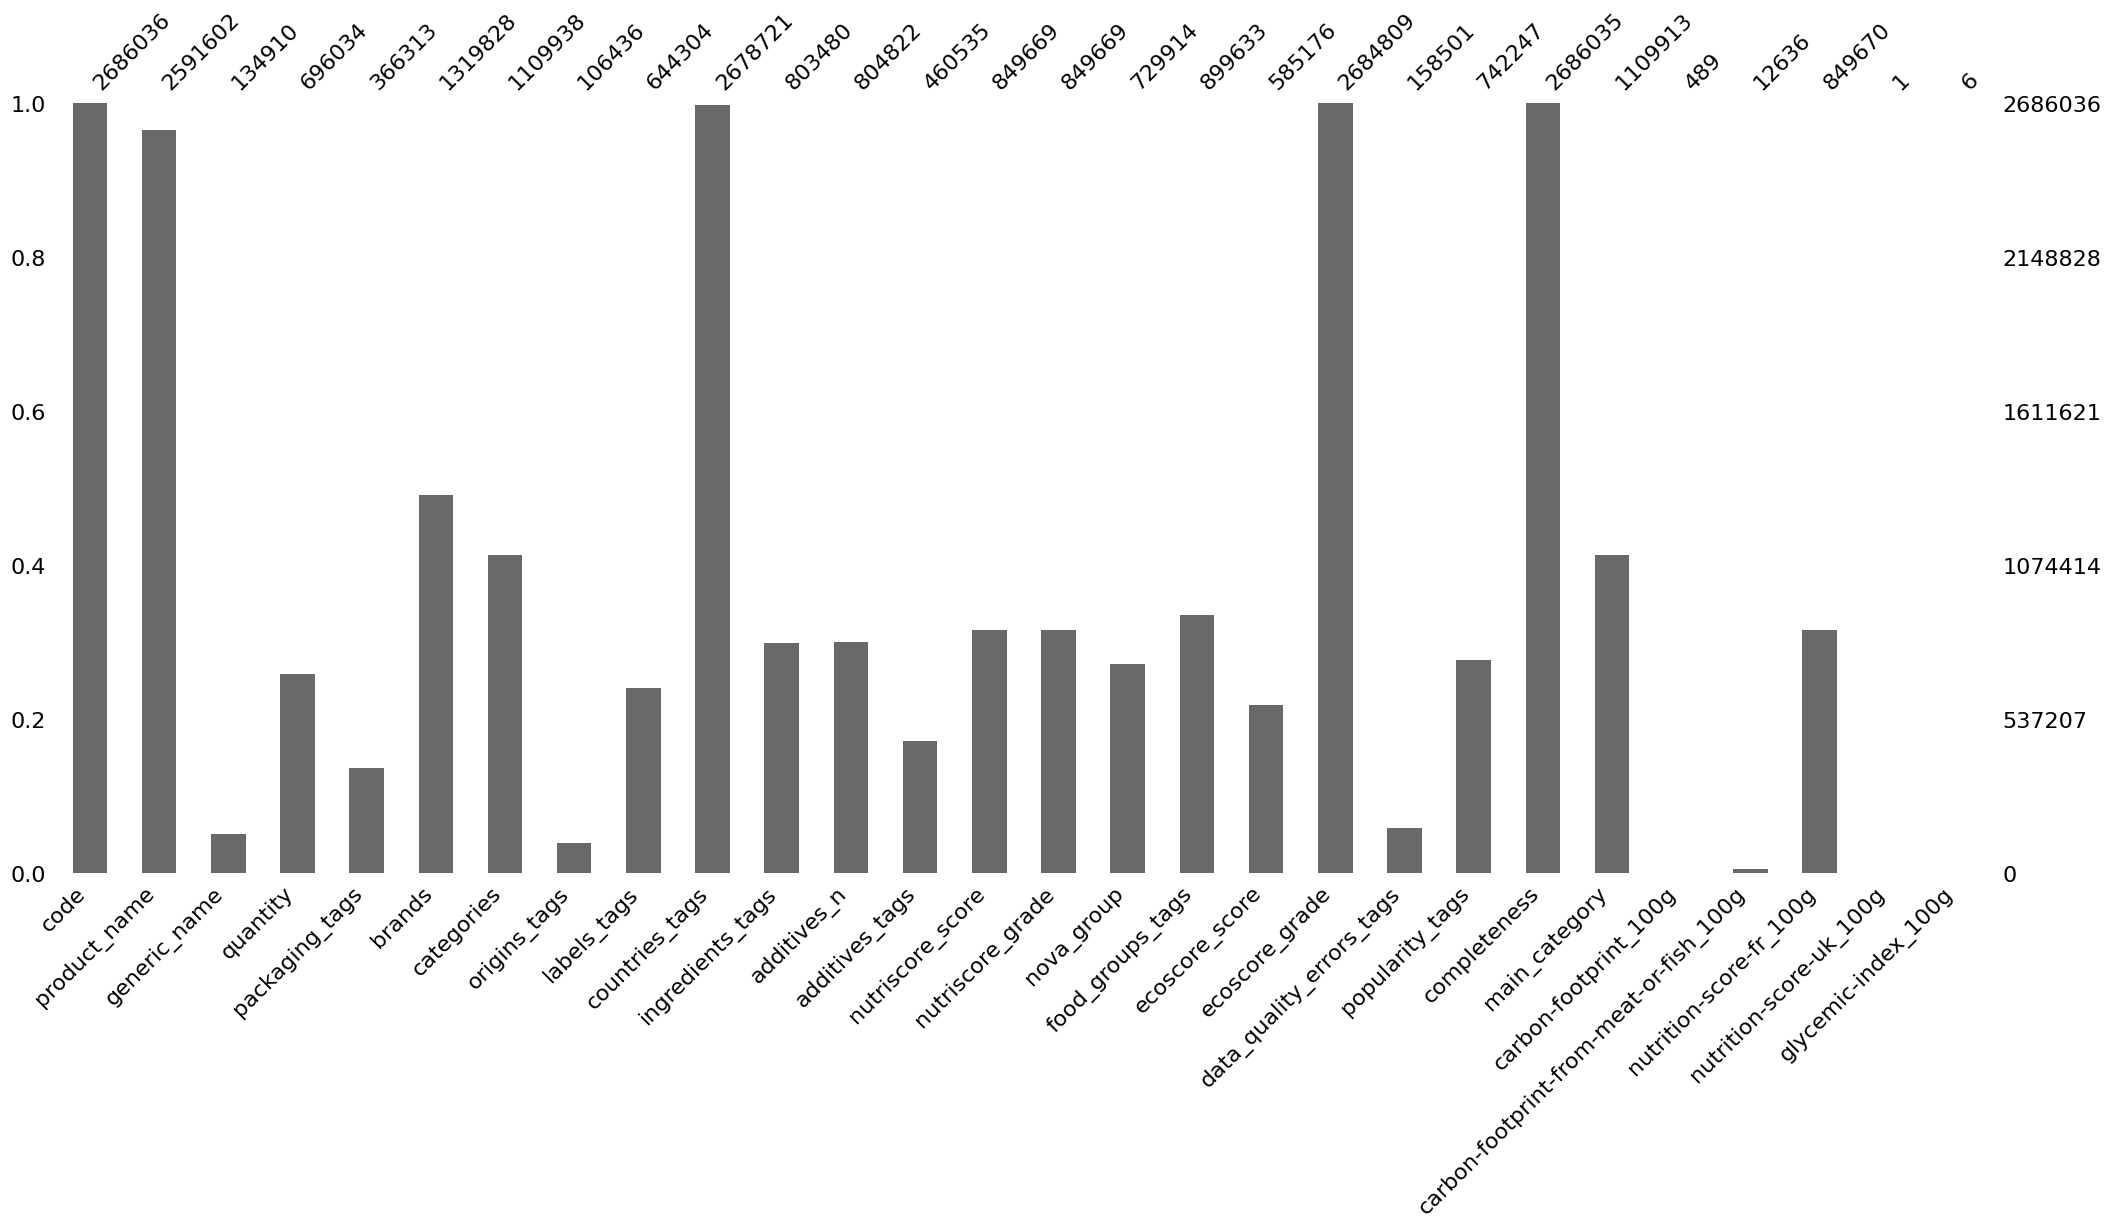

In [26]:
msno.bar(data)

In [27]:
# Are nutriscores any different? 
(data.nutriscore_score == data['nutrition-score-fr_100g']).sum()

849669

In [28]:
data.nutriscore_score.notnull().sum()

849669

In [9]:
# There is no difference between both features, so the last 5 columns
# can be dropped, as other hold almost no information.
features = data.columns[:-5].values
print(features)
data = data.loc[:,features]

['code' 'product_name' 'generic_name' 'quantity' 'packaging_tags' 'brands'
 'categories' 'origins_tags' 'labels_tags' 'countries_tags'
 'ingredients_tags' 'additives_n' 'additives_tags' 'nutriscore_score'
 'nutriscore_grade' 'nova_group' 'food_groups_tags' 'ecoscore_score'
 'ecoscore_grade' 'data_quality_errors_tags' 'popularity_tags'
 'completeness' 'main_category']


In [38]:
def top_values(data,
               col: str,
               print_n: int=10) -> pd.Series:
    ''' Return the first 10 (default)
        values of a series'''
    return (data.loc[:, col]
            .value_counts()
            .sort_values(ascending=False)
            .iloc[:print_n])

------------------------------
CODE :
percentage of data : 100.0 %
30383354190402    2
0071923722898     2
29994696          2
31843340000818    2
3564700673683     2
8760304600357     2
3760331890198     2
2700963001059     2
3700320230572     2
6703501220017     2
Name: code, dtype: int64


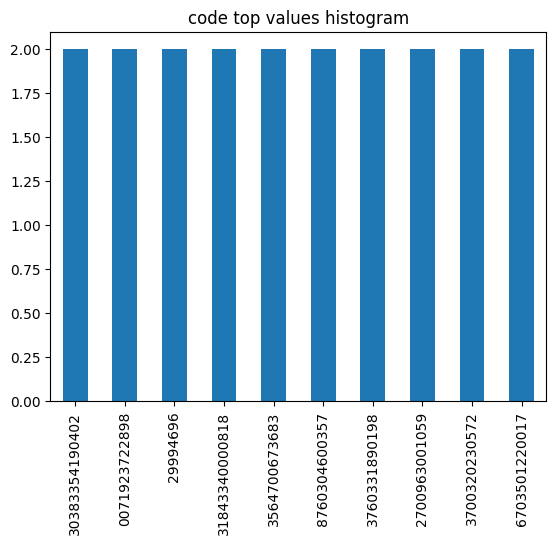


------------------------------
PRODUCT_NAME :
percentage of data : 96.48426156611453 %
Aceite de oliva virgen extra    1557
Miel                            1519
Filet de poulet                 1235
Spaghetti                       1062
Comté                           1058
Mozzarella                      1032
Chocolat                         997
Mayonnaise                       906
Poulet                           881
Ketchup                          879
Name: product_name, dtype: int64


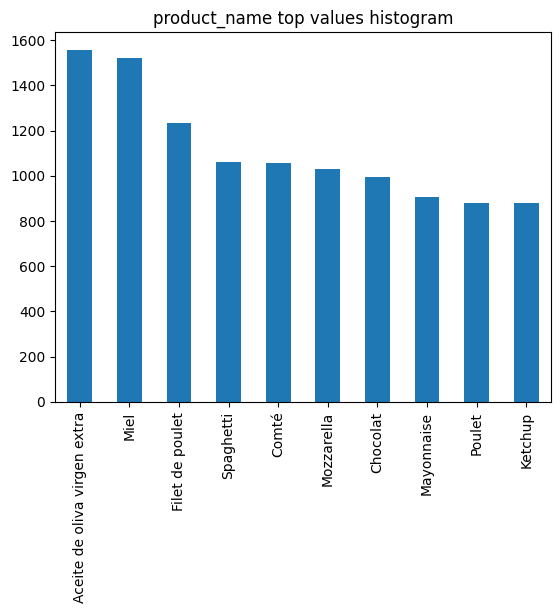


------------------------------
GENERIC_NAME :
percentage of data : 5.022643032334638 %
Pâtes alimentaires de qualité supérieure               323
Ice cream                                              180
Bière                                                  123
Pâtes alimentaires au blé dur de qualité supérieure    122
Beignets fourrés à la purée de framboise               122
Beignets fourrés à la purée de pomme                   113
Jambon cuit supérieur                                  104
Bière blonde                                           101
Fromage au lait pasteurisé                              91
Jus d'orange                                            88
Name: generic_name, dtype: int64


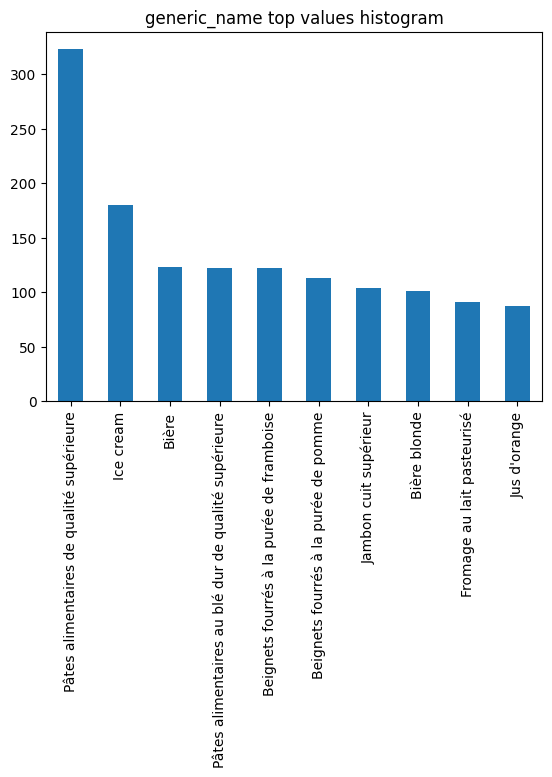


------------------------------
QUANTITY :
percentage of data : 25.913055521221608 %
500 g    26749
250 g    23448
200 g    23351
100 g    17777
1pcs     15781
400 g    15734
300 g    14174
150 g    13920
1 kg     10847
100g     10812
Name: quantity, dtype: int64


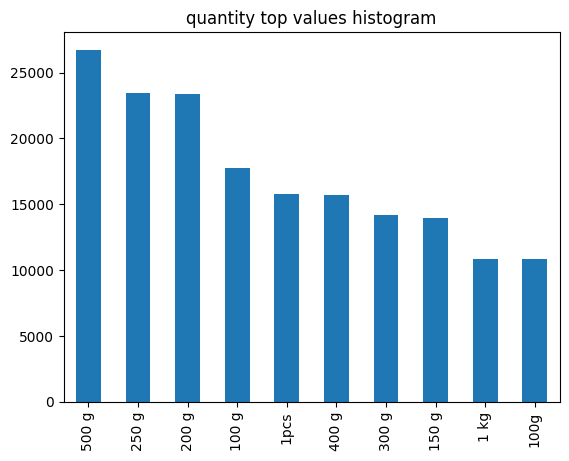


------------------------------
PACKAGING_TAGS :
percentage of data : 13.637680209796146 %
en:plastic                 43732
en:glass                   12066
en:plastic,en:bag          11996
en:bottle                   8826
en:bag                      8761
en:cardboard                6271
en:glass,en:bottle          5735
en:canned                   5084
en:paper                    4938
en:plastic,en:cardboard     4205
Name: packaging_tags, dtype: int64


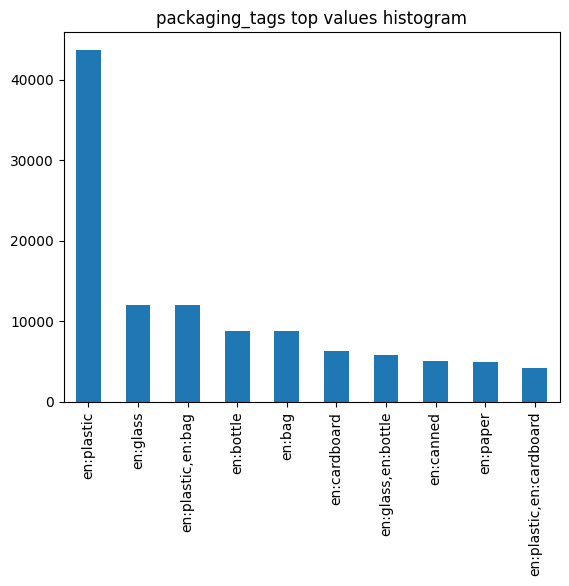


------------------------------
BRANDS :
percentage of data : 49.1366459719825 %
Carrefour    18903
Auchan       14016
Bonarea      10496
Delhaize      7102
Hacendado     7014
U             6798
Coop          6778
Lidl          6347
Nestlé        5863
Tesco         5480
Name: brands, dtype: int64


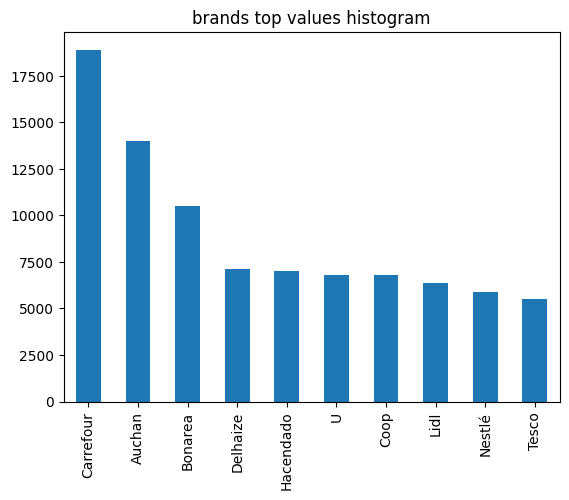


------------------------------
CATEGORIES :
percentage of data : 41.32252881197422 %
Snacks                                                                                                  33831
Snacks, Sweet snacks, Confectioneries                                                                   14683
Groceries, Sauces                                                                                       13465
Dairies, Fermented foods, Fermented milk products, Cheeses                                              11504
Snacks, Sweet snacks, Biscuits and cakes, Biscuits                                                      10667
Desserts, Frozen foods, Frozen desserts                                                                  9084
Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Breads                         7220
Frozen foods                                                                                             6930
Plant-based foods and beverages, P

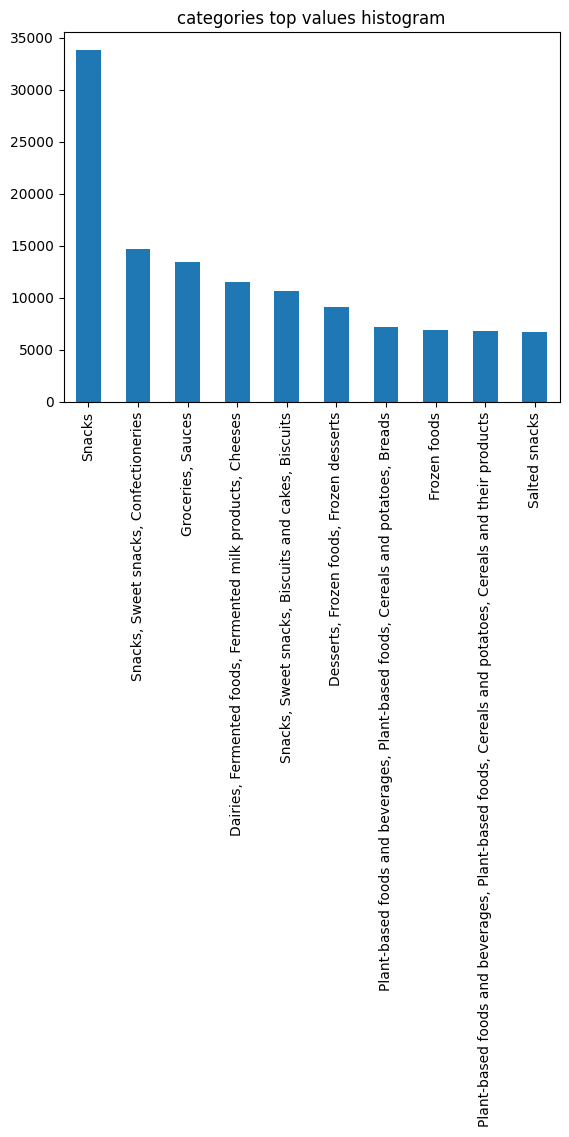


------------------------------
ORIGINS_TAGS :
percentage of data : 3.962567888144463 %
en:france            26485
en:italy              5673
en:european-union     4569
en:spain              4400
en:germany            3113
en:mexico             3034
en:united-states      1887
en:argentina          1375
en:switzerland        1264
en:poland             1233
Name: origins_tags, dtype: int64


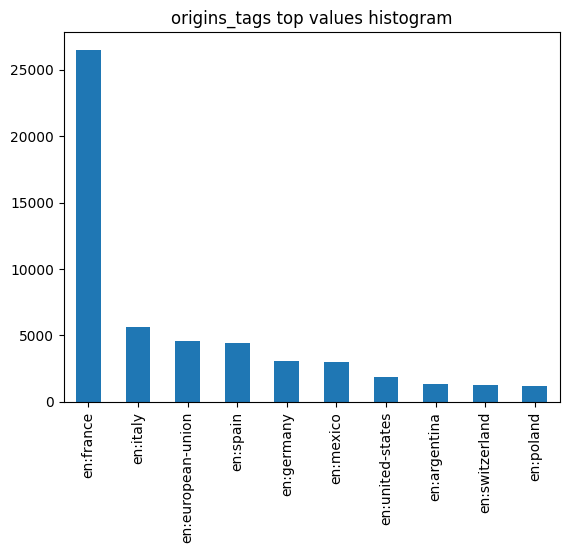


------------------------------
LABELS_TAGS :
percentage of data : 23.987169196540925 %
en:no-gluten                                             49732
en:organic                                               39956
en:vegetarian,en:vegan                                   32568
en:green-dot                                             19742
en:no-preservatives                                      19311
en:organic,en:eu-organic,fr:ab-agriculture-biologique    17619
en:made-in-france                                        13613
en:organic,en:eu-organic                                 10962
en:no-added-sugar                                        10457
en:no-colorings                                           9583
Name: labels_tags, dtype: int64


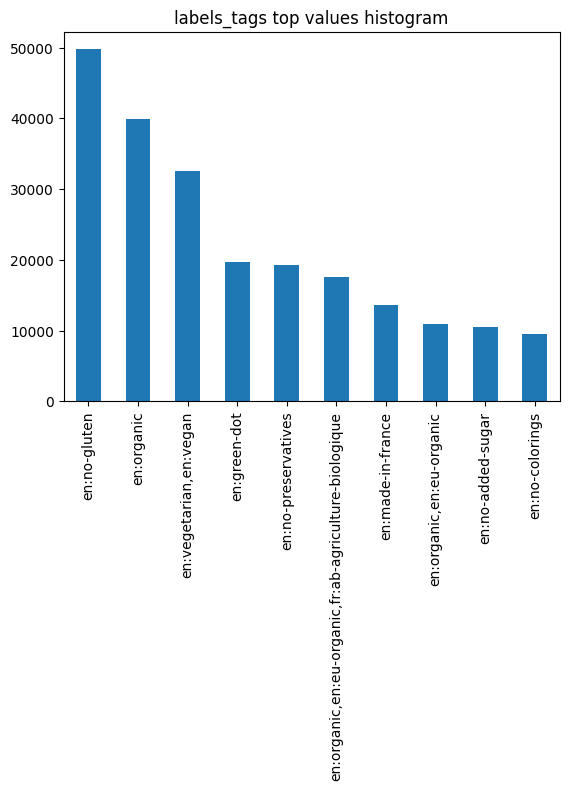


------------------------------
COUNTRIES_TAGS :
percentage of data : 99.72766560090781 %
en:france            864106
en:united-states     551675
en:spain             278102
en:italy             196610
en:germany           137515
en:united-kingdom     82282
en:canada             72052
en:switzerland        65641
en:belgium            65140
en:australia          29977
Name: countries_tags, dtype: int64


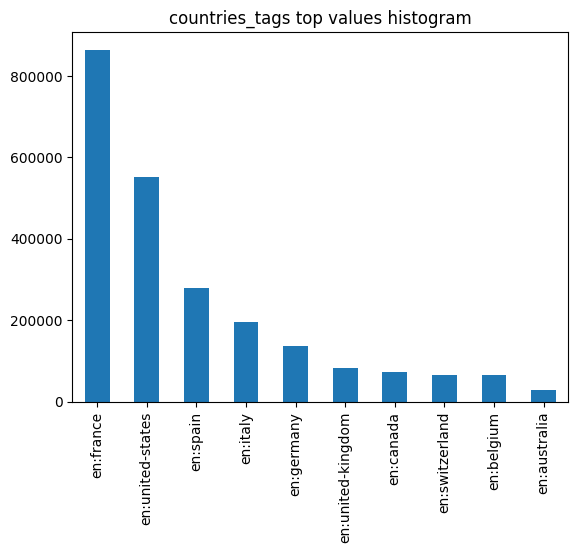


------------------------------
INGREDIENTS_TAGS :
percentage of data : 29.913225288119744 %
en:honey,en:added-sugar                                                                                                1491
en:extra-virgin-olive-oil,en:oil-and-fat,en:vegetable-oil-and-fat,en:vegetable-oil,en:olive-oil,en:virgin-olive-oil    1479
en:durum-wheat-semolina,en:cereal,en:wheat,en:durum-wheat,en:semolina                                                  1336
en:almond,en:nut,en:tree-nut                                                                                            951
en:carbonated-water,en:water,en:natural-flavouring,en:flavouring                                                        904
en:superior-quality-durum-wheat-semolina,en:cereal,en:wheat,en:durum-wheat,en:semolina,en:durum-wheat-semolina          849
en:egg                                                                                                                  761
en:orange-juice,en:fruit,en:citrus-frui

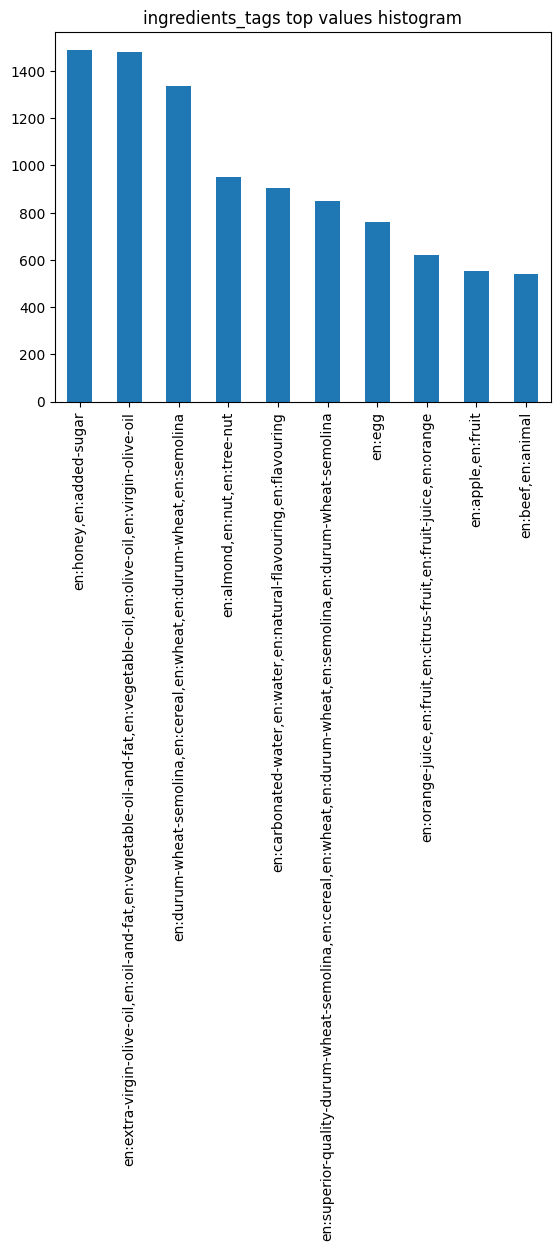


------------------------------
ADDITIVES_N :
percentage of data : 29.96318738840433 %
0.0    344287
1.0    138397
2.0     90093
3.0     63699
4.0     48117
5.0     34558
6.0     24140
7.0     17722
8.0     13248
9.0      8851
Name: additives_n, dtype: int64


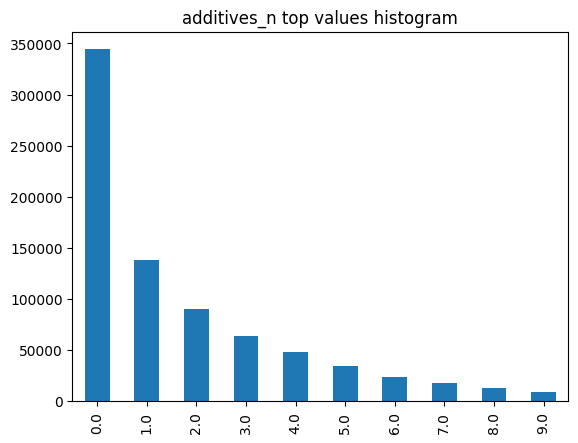


------------------------------
ADDITIVES_TAGS :
percentage of data : 17.145525972101638 %
en:e330              27447
en:e322,en:e322i     19335
en:e440               6964
en:e415               5314
en:e300               5071
en:e14xx              4244
en:e330,en:e440       3500
en:e500,en:e500ii     3360
en:e160b              3183
en:e322               2923
Name: additives_tags, dtype: int64


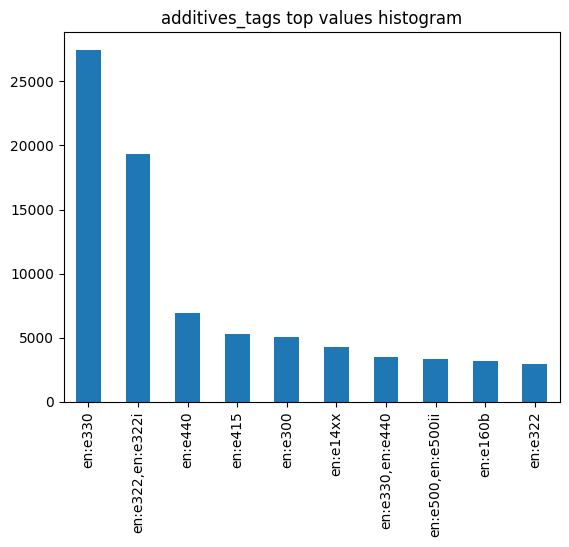


------------------------------
NUTRISCORE_SCORE :
percentage of data : 31.632822493816164 %
 0.0     47085
 14.0    44219
 2.0     39269
 13.0    39222
 11.0    38957
 1.0     38805
 15.0    35348
 12.0    35288
 3.0     34822
-1.0     34080
Name: nutriscore_score, dtype: int64


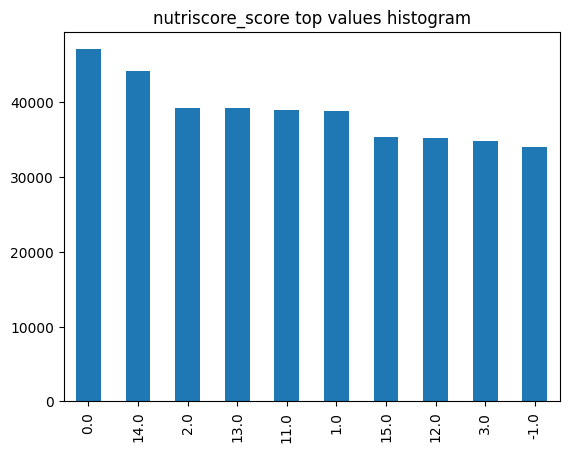


------------------------------
NUTRISCORE_GRADE :
percentage of data : 31.632822493816164 %
d    265340
c    183783
e    158279
a    123294
b    118973
Name: nutriscore_grade, dtype: int64


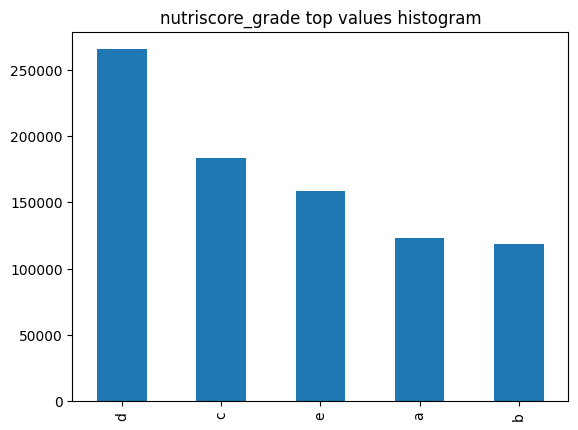


------------------------------
NOVA_GROUP :
percentage of data : 27.17439379070124 %
4.0    467180
3.0    141782
1.0     79484
2.0     41468
Name: nova_group, dtype: int64


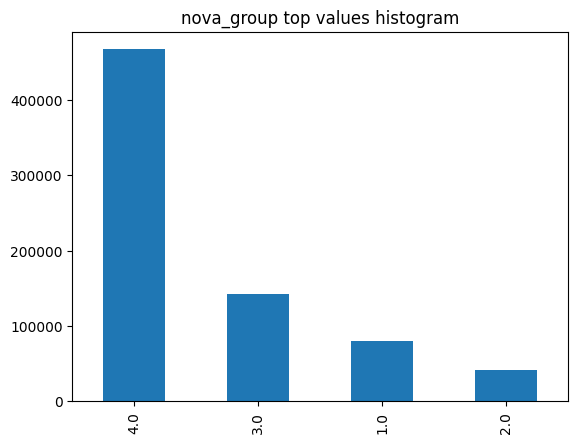


------------------------------
FOOD_GROUPS_TAGS :
percentage of data : 33.49296137505231 %
en:sugary-snacks,en:sweets                       85679
en:sugary-snacks,en:biscuits-and-cakes           72681
en:fats-and-sauces,en:dressings-and-sauces       61633
en:milk-and-dairy-products,en:cheese             54506
en:cereals-and-potatoes,en:cereals               50449
en:composite-foods,en:one-dish-meals             47432
en:fish-meat-eggs,en:processed-meat              45031
en:fruits-and-vegetables,en:vegetables           38622
en:milk-and-dairy-products,en:milk-and-yogurt    37385
en:beverages,en:sweetened-beverages              29200
Name: food_groups_tags, dtype: int64


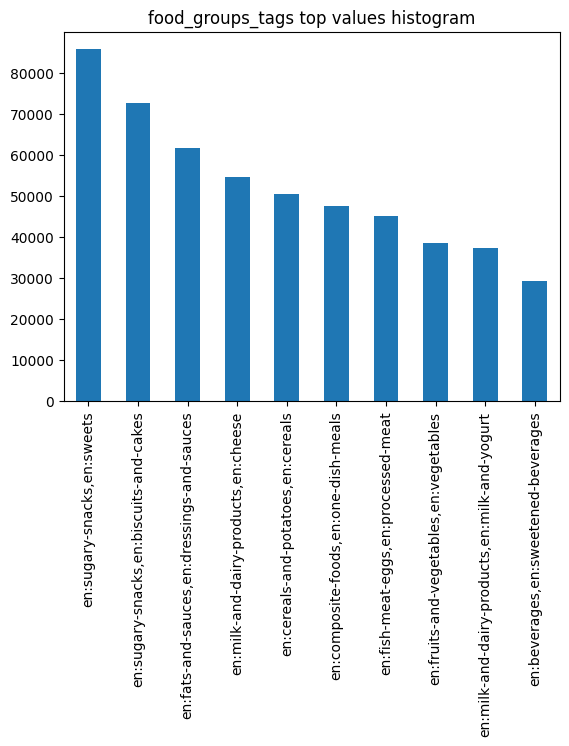


------------------------------
ECOSCORE_SCORE :
percentage of data : 21.78585841738532 %
79.0    41343
34.0    31010
72.0    22474
67.0    17752
49.0    17572
39.0    15747
27.0    15457
21.0    12168
77.0    11577
75.0    11247
Name: ecoscore_score, dtype: int64


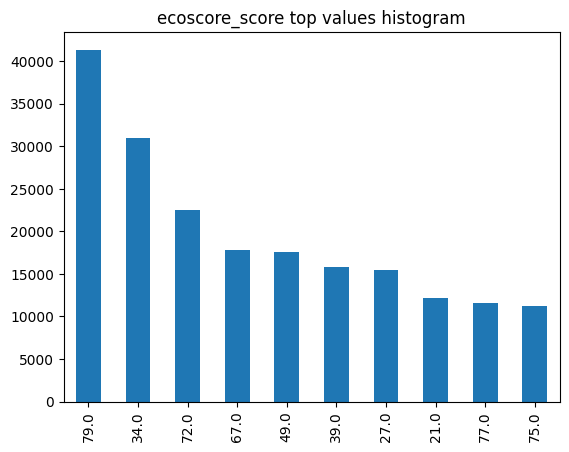


------------------------------
ECOSCORE_GRADE :
percentage of data : 99.95431930175172 %
unknown           2071972
b                  190121
d                  160612
c                  115610
e                   89980
a                   28853
not-applicable      27661
Name: ecoscore_grade, dtype: int64


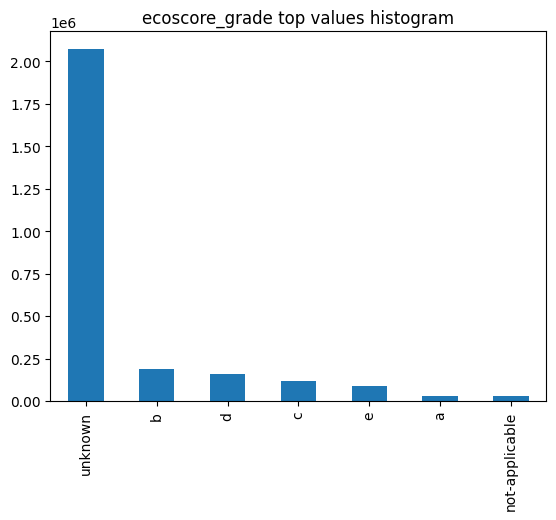


------------------------------
DATA_QUALITY_ERRORS_TAGS :
percentage of data : 5.900926123104828 %
en:energy-value-in-kcal-does-not-match-value-computed-from-other-nutrients                                                                             124433
en:nutrition-value-over-3800-energy,en:energy-value-in-kcal-does-not-match-value-computed-from-other-nutrients                                           4550
en:nutrition-value-total-over-105                                                                                                                        3956
en:nutrition-sugars-plus-starch-greater-than-carbohydrates                                                                                               3331
en:nutrition-saturated-fat-greater-than-fat                                                                                                              3247
en:energy-value-in-kj-does-not-match-value-computed-from-other-nutrients                                      

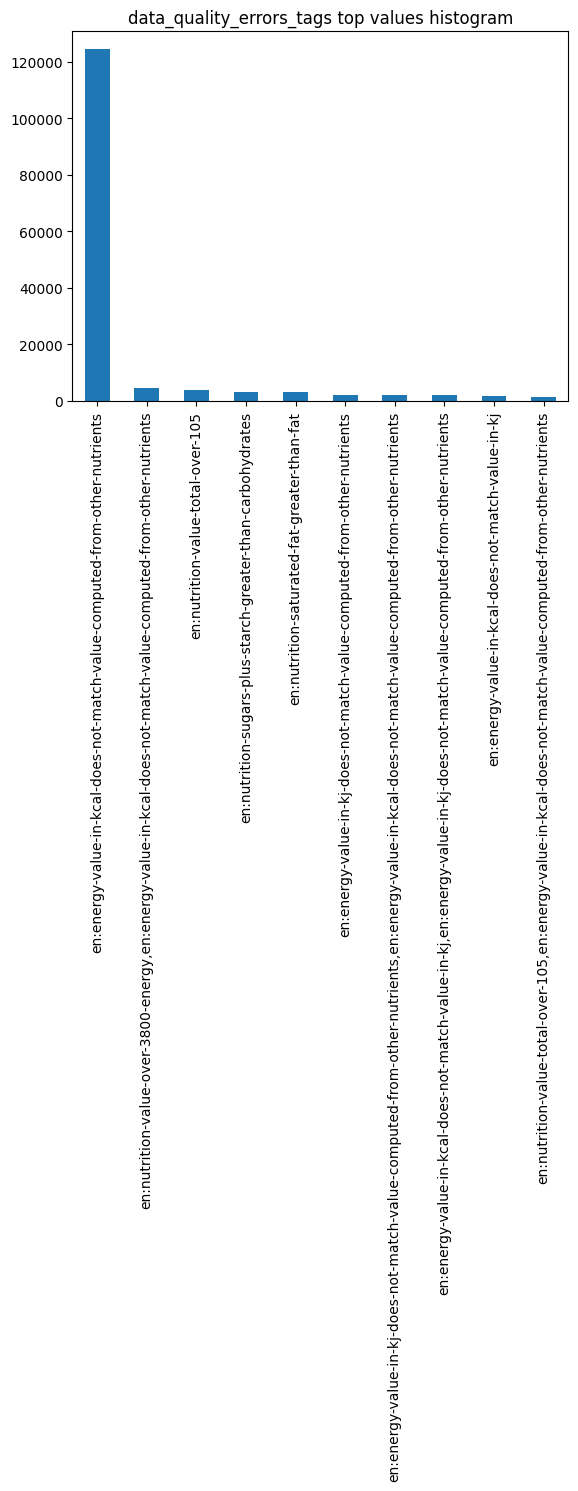


------------------------------
POPULARITY_TAGS :
percentage of data : 27.63354623690822 %
bottom-25-percent-scans-2020,bottom-20-percent-scans-2020,top-85-percent-scans-2020,top-90-percent-scans-2020,top-country-fr-scans-2020                                                                                                                                            25407
bottom-25-percent-scans-2019,bottom-20-percent-scans-2019,top-85-percent-scans-2019,top-90-percent-scans-2019,top-country-fr-scans-2019                                                                                                                                            23471
bottom-25-percent-scans-2021,bottom-20-percent-scans-2021,top-85-percent-scans-2021,top-90-percent-scans-2021,top-country-fr-scans-2021                                                                                                                                            20487
bottom-25-percent-scans-2019,bottom-20-percent-scans-2019,bottom-1

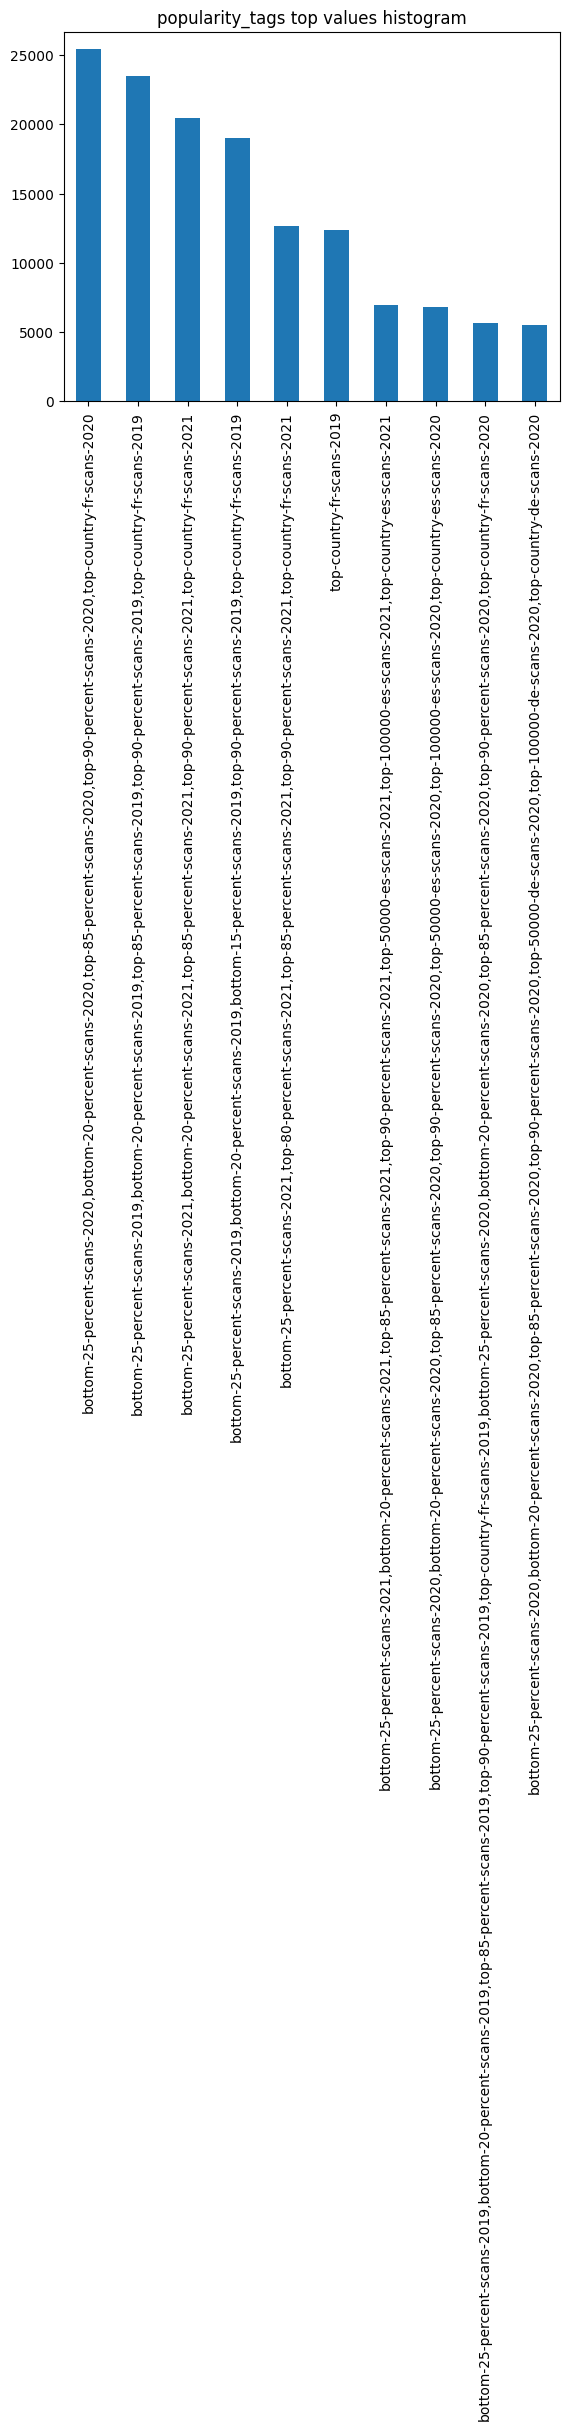


------------------------------
COMPLETENESS :
percentage of data : 99.99996277041707 %
0.2750    580720
0.3750    380473
0.4750    191398
0.4000    143834
0.5000    135708
0.1625    120080
0.2625    101503
0.5750     86276
0.3625     81632
0.7875     78812
Name: completeness, dtype: int64


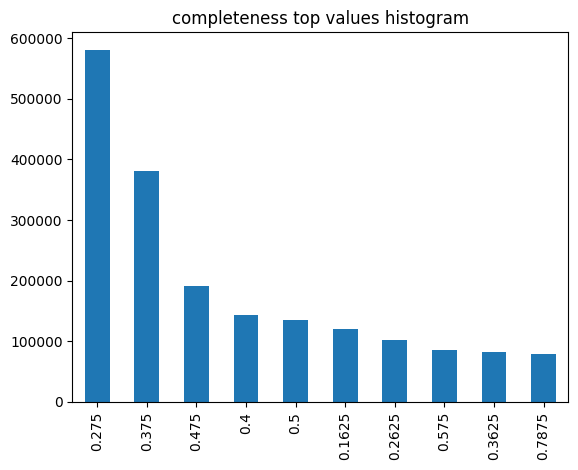


------------------------------
MAIN_CATEGORY :
percentage of data : 41.321598072401116 %
en:groceries                     68698
en:snacks                        34698
en:biscuits                      17298
en:cheeses                       16883
en:confectioneries               16583
en:beverages                     13726
en:breads                        10870
en:frozen-desserts                9638
en:yogurts                        8679
en:cereals-and-their-products     8672
Name: main_category, dtype: int64


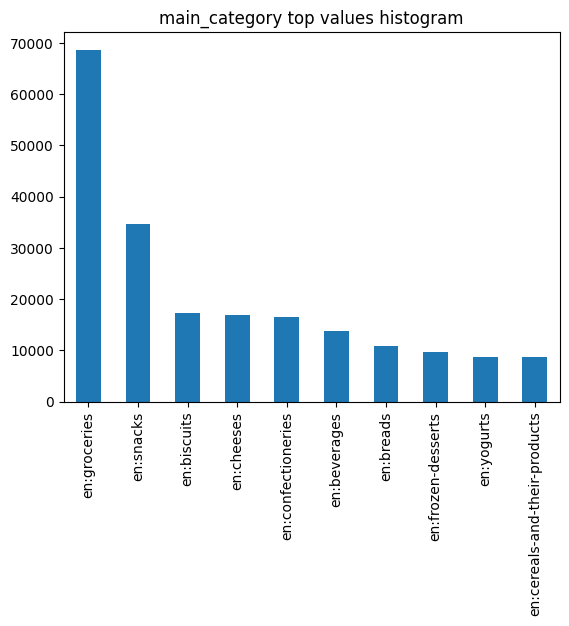

In [37]:
for feat in features:
    print('-'*30)
    print(feat.upper() +' :')
    print(f"percentage of data : {data[feat].notnull().mean()*100} %")
    top = top_values(data, feat)
    print(top)
    top.plot(kind='bar')
    plt.title(f"{feat} top values histogram")
    plt.show()    
    print('')

In [10]:
#data.to_csv('./csv_files/first_data_analyzed.csv')
data = pd.read_csv('./csv_files/first_data_analyzed.csv')

### Some comments

- code : possible duplicates !

- generic_name : 5%... can be discarded

- One interesting feature is data_quality_errors_tags. 
It is probably a feature generated by processing the information entered by the open food facts app user and controlling if there is consistency in what was provided.

- popularity_tags could be use to anticipate client satisfaction rate. Indeed, we need to be able to provide a high rate of decent results on top scanned products.

- completeness might calculate the ratio of the row not null content?

- nutriscore_score and nutriscore_grade well represented.

- ecoscore_grade : not in interesting in the world (the vast majority is 'unknown')

- ecoscore : Can be interesting.

- are food groups, categories and main_category quite similar?

- some nice label_tags (no-gluten, organic, vegan/vegetarian, made in France, no-added-sugar) for an app?

- brands : appearance of Carrefour, Auchan, U, Lidl. (Could be the start of major brands quality comparison (but are there enough product to be compared?)).

- Nova score (almost same percentage as nutriscore, is it for the same elements?)


Now, I want to filter on french products because the application I want to design is for "Santé Publique France" and there are a lot of product indexed.

In [48]:
# Filtering on french products
data = data.loc[data.countries_tags
                .str.contains('france', case=False, na=False),:]
print(data.shape)
display(data.head())

(946118, 23)


code                  product_name generic_name quantity  \
0      00000000000000225                jeunes pousses          NaN      NaN   
3   00000000000026772226                          Skyr          NaN    480 g   
4          0000000000017              Vitória crackers          NaN      NaN   
5          0000000000031                         Cacao          NaN    130 g   
10         0000000000100   moutarde au moût de raisin           NaN     100g   

   packaging_tags         brands  \
0             NaN        endives   
3             NaN         Danone   
4             NaN            NaN   
5             NaN            NaN   
10            NaN  courte paille   

                                           categories origins_tags  \
0                                                 NaN          NaN   
3   Produits laitiers, Desserts, Produits fermenté...          NaN   
4                                                 NaN          NaN   
5                                                 NaN          NaN   
10        en:groceries, Condiments, Sauces, Moutardes          NaN   

         labels_tags countries_tags  ... nutriscore_score  nutriscore_grade  \
0                NaN      en:france  ...              NaN               NaN   
3                NaN      en:france  ...             -5.0                 a   
4                NaN      en:france  ...              NaN               NaN   
5                NaN      en:france  ...              NaN               NaN   
10  fr:delois-france      en:france  ...             18.0                 d   

   nova_group                              food_groups_tags ecoscore_score  \
0         NaN                                           NaN            NaN   
3         NaN  en:milk-and-dairy-products,en:dairy-desserts           34.0   
4         NaN                                           NaN            NaN   
5         NaN                                           NaN            NaN   
10        NaN    en:fats-and-sauces,en:dressings-and-sauces           54.0   

    ecoscore_grade data_quality_errors_tags  popularity_tags completeness  \
0          unknown                      NaN              NaN       0.2000   
3                d                      NaN              NaN       0.5750   
4          unknown                      NaN              NaN       0.2750   
5          unknown                      NaN              NaN       0.2625   
10               c                      NaN              NaN       0.7625   

       main_category  
0                NaN  
3   en:cream-cheeses  
4                NaN  
5                NaN  
10      en:groceries  

[5 rows x 23 columns]

<AxesSubplot: >

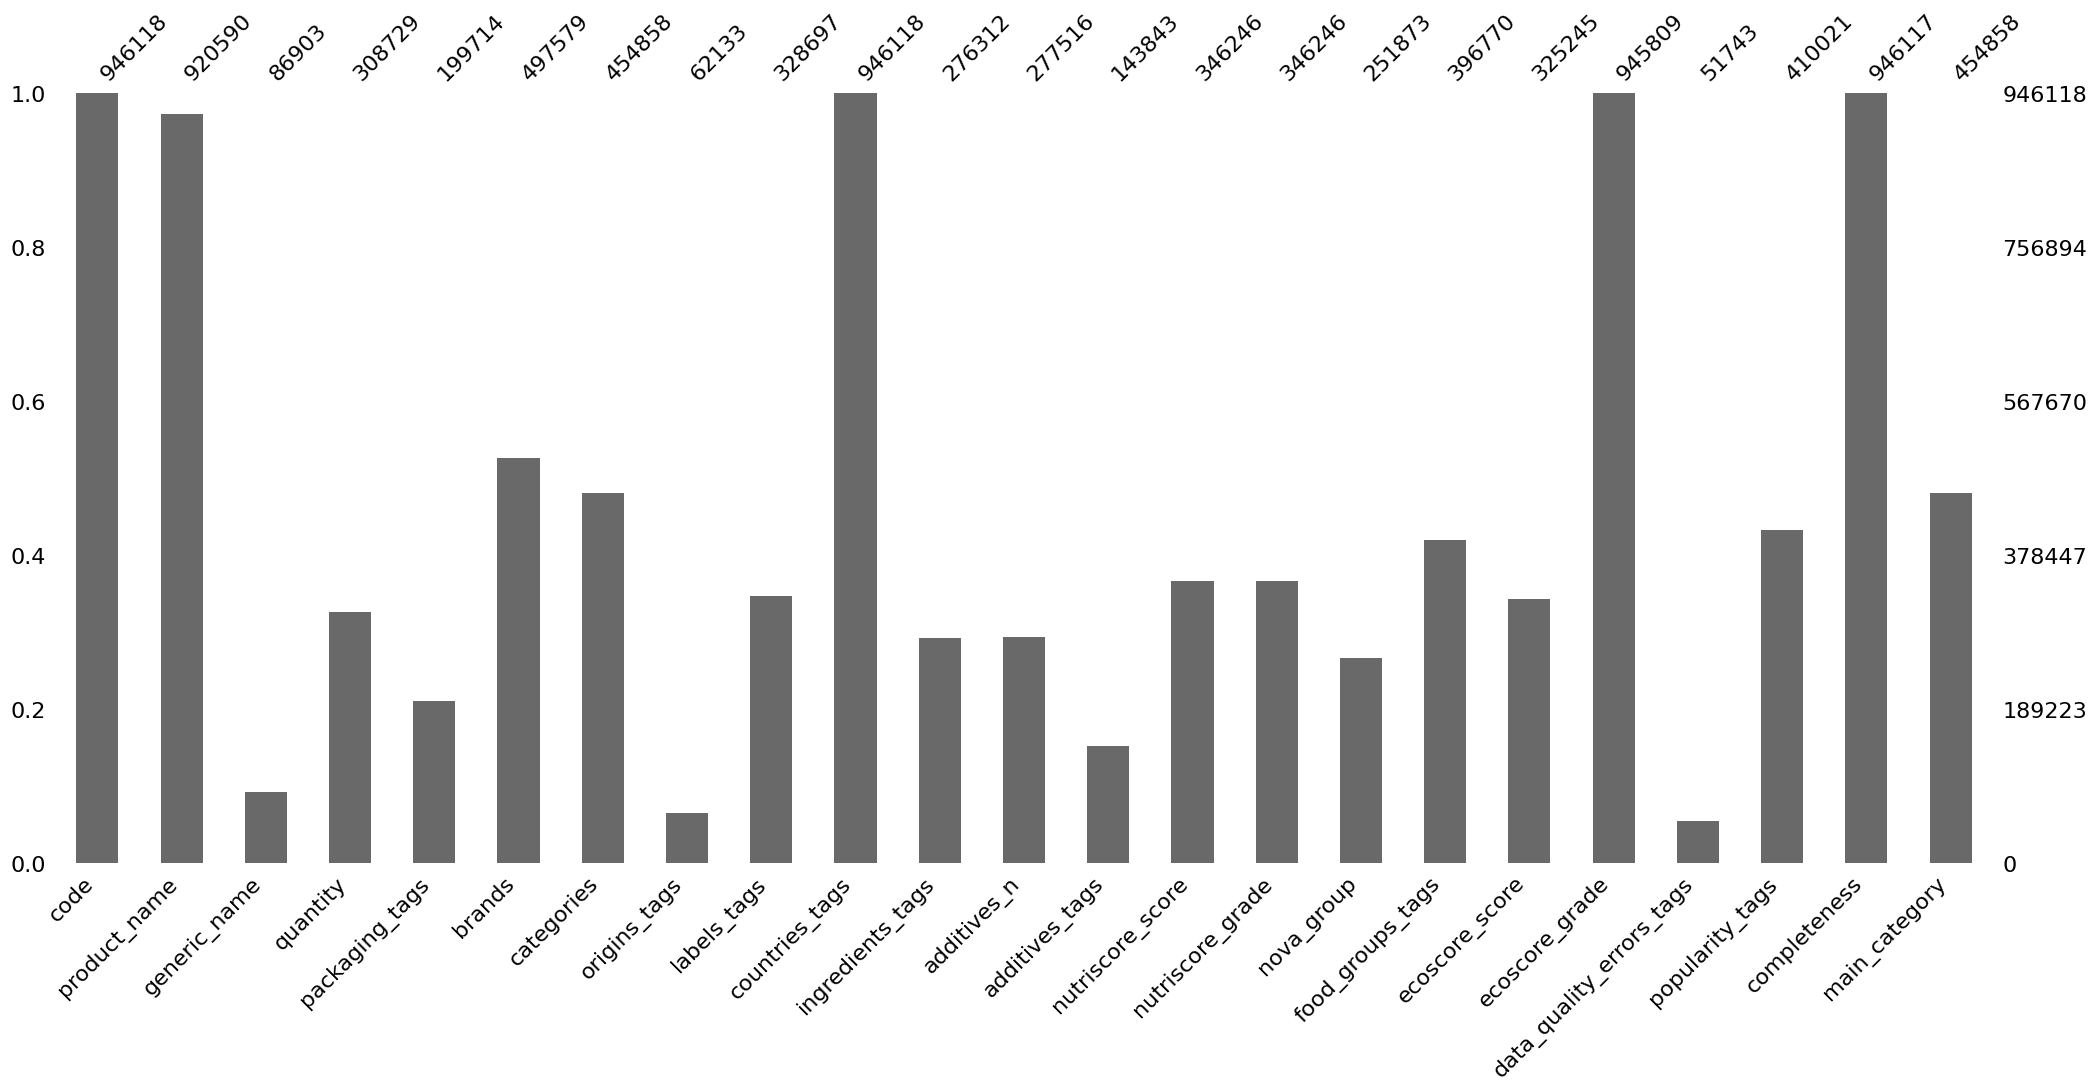

In [43]:
msno.bar(data)

In [28]:
data.describe()

additives_n  nutriscore_score     nova_group  ecoscore_score  \
count  804822.000000     849669.000000  729914.000000   585176.000000   
mean        1.996676          9.256612       3.365446       47.254302   
std         2.862469          8.669236       0.999445       25.687991   
min         0.000000        -15.000000       1.000000      -30.000000   
25%         0.000000          2.000000       3.000000       28.000000   
50%         1.000000         10.000000       4.000000       45.000000   
75%         3.000000         16.000000       4.000000       71.000000   
max        50.000000         40.000000       4.000000      125.000000   

       completeness  
count  2.686035e+06  
mean   4.220682e-01  
std    2.042649e-01  
min    5.000000e-02  
25%    2.750000e-01  
50%    3.750000e-01  
75%    5.000000e-01  
max    1.100000e+00

/tmp/ipykernel_10200/2810548857.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(data.corr()), annot=data.corr(), fmt=".2f", linewidth=.5,


<AxesSubplot: >

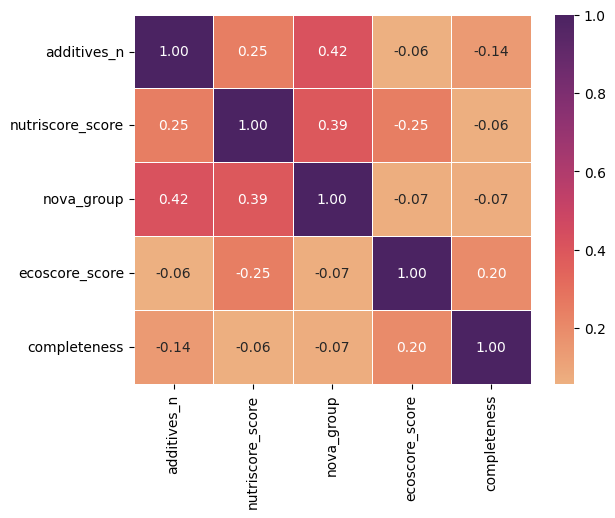

In [19]:
# cmap in abs() but displayed value are signed.
sns.heatmap(abs(data.corr()), annot=data.corr(), fmt=".2f", linewidth=.5,
            cmap='flare', vmax=1)

- nutriscore_score goes from -15 to 40 and
the grade do not have the same amplitude!
Algorithm for computation and process to convert to grades are available
[here](https://nutrition.coeur-herault.fr/sites/default/files/files/fichiers/qr_scientifique_technique_nutriscore-120320.pdf).

     <img src="./images/nutriscore->grade.png"
          width="500"/>

- [ecoscore_score](https://docs.score-environnemental.com/methodologie/fonctionnement-general) ranges from -40 to 135 (with malus bonus) but has it's core between 0 and 100. Beware that ecoscore are estimations based on the mean environmental impact of a *class of product* except if the detailed manufacture process is given by the producer. All chocolates bars for example, have the same ecoscore. It is not computed on each product contrary to nutriscore which depends on the product nutrients.

     <img src="./images/ecoscore->grade.png"
          width="500">

- Nova score : 

     <img src="./images/nova.png"
          width="300">

Hence, this explains in part :
- why nova and nutriscore are a bit correlated.
- why there is a small anti-correlation between the nutriscore and ecoscore. A negative nutriscore is the best, and and high ecoscore is the best. However, the small value of R is not to be ignored and we are from any generalization. Proof being with next plots.


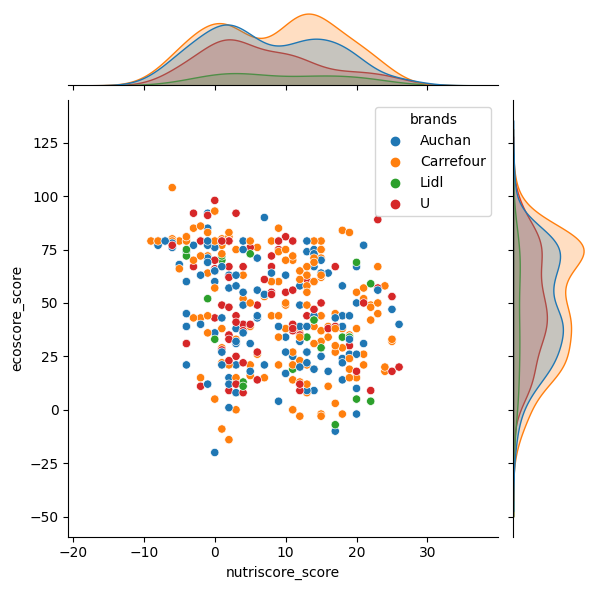

In [22]:
# selecting data with only 4 brands to search
# for any major difference.
data_br4 = data.loc[(data.brands == 'Carrefour')
                    |(data.brands == 'Auchan')
                    |(data.brands == 'U')
                    |(data.brands == 'Lidl'), :]

sns.jointplot(data=data_br4.sample(1000),
              x='nutriscore_score',
              y='ecoscore_score',
              hue='brands')

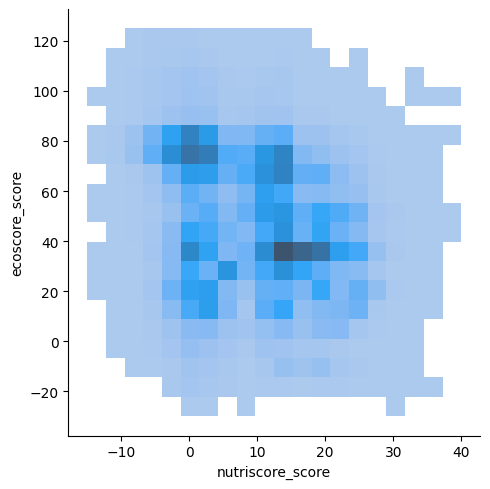

In [21]:
# observing connection between nutri and ecoscore.
sns.displot(data=data,
            x='nutriscore_score',
            y='ecoscore_score',
            bins=20)

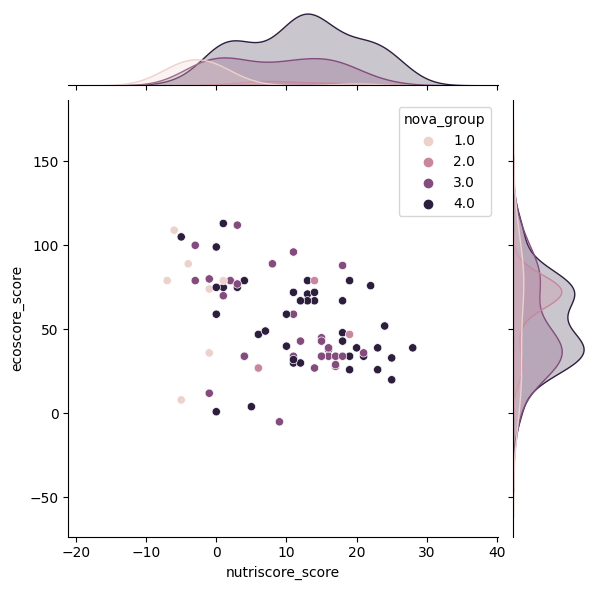

In [27]:
# observing connection between nutri and ecoscore.
sns.jointplot(data=data.sample(1000),
              x='nutriscore_score',
              y='ecoscore_score',
              hue='nova_group')

<AxesSubplot: xlabel='nova_group', ylabel='nutriscore_score'>

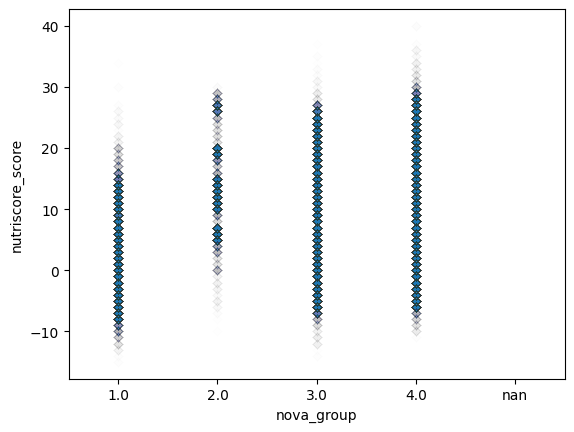

In [72]:
# Plotting eventual connection between nova and nutri
sns.stripplot(data=data,
                y='nutriscore_score',
                x='nova_group',
                jitter=False, s=5, marker="D",
                linewidth=1, alpha=.005)

<AxesSubplot: xlabel='nova_group', ylabel='nutriscore_score'>

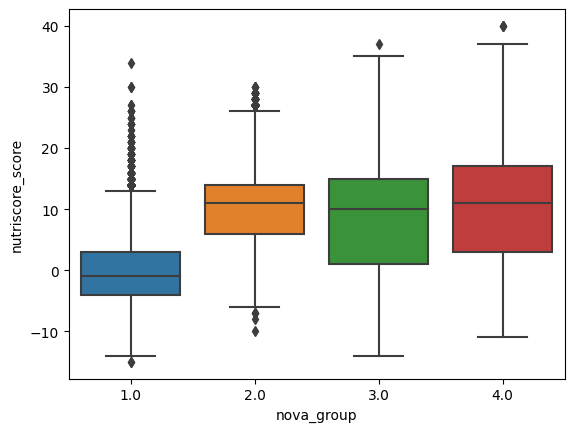

In [71]:
sns.boxplot(data=data, y='nutriscore_score',
            x='nova_group')

TODO ;
- se pencher sur la feature de la qualité des données et regarder ce qui cloche et si ça peut être utiliser pour filtrer les produits. (mettre un message d'avertissement sur les données envoyées à l'utilisateur de l'appli)
- imaginer l'appli!
- regarder si trucs interessant dans ce que je n'ai aps encore regardé (nutrients fat, sugar etc...)
- caster en int les colonnes ad hoc.
- peut-être pour le scatter qui ne montre rien, discrétiser avec qcut()

### Completing indicators exploration.

At that time, I have a better idea of the application I want to build.

See 'application_idea.md'

For that, I need :
- to find the best indicator to classify products.
- nutrient information, especially around sugars.
- a visual for the app for product suggestion, so products images.

So I selected a new set of features to explore in features2.txt and I am going to limit my exploration on products available in France.

remark : 
for later, I will have to think of a process to extend my french database rapidly from the database updates. I will explore datatime to confirm that the database is extended with time, and elements add at the bottom. If so, it would be great, to recall the last line number until which the database was processed, and compute processing only on the added products. And then concatenate new part of the dataframe with the one already processed.


In [17]:
countries = pd.read_csv('./csv_files/data.csv',
                        sep='\t',
                        usecols=['countries_tags'])

# Searching for products sold in France.
fr = countries.loc[countries.countries_tags
                   .str.contains('france', case=False, na=False), :]

print(f"There are {len(fr)} products sold in France in the database.")

# Rows containing irrelevant information for french customers.
rows_to_skip =  [n 
                 for n in range(countries.shape[0])
                 if n not in fr.index]

# An other features selection (discussed above).
with open('./features2.txt', 'r') as fin:
    features = [feat.strip('\n') for feat in fin]
print(features)

KeyboardInterrupt: 

Exception ignored in: '_pydevd_frame_eval.pydevd_frame_evaluator.get_bytecode_while_frame_eval_39'
Traceback (most recent call last):
  File "_pydevd_frame_eval/pydevd_frame_evaluator.pyx", line 262, in _pydevd_frame_eval.pydevd_frame_evaluator.get_func_code_info
  File "/home/louberehc/miniconda3/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1050, in get_cache_file_type
    def get_cache_file_type(self, _cache=_CACHE_FILE_TYPE):  # i.e.: Make it local.
KeyboardInterrupt: 


SystemError: <function BufferedIncrementalDecoder.__init__ at 0x7ff9b918c430> returned NULL without setting an error

In [19]:
print(features)

['code', 'url', 'image_url', 'categories', 'food_groups_tags', 'main_category', 'pnns_groups_1', 'pnns_groups_2', 'food_groups_tags', 'nutrient_levels_tags', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']


In [10]:
data = pd.read_csv('./csv_files/data.csv',
                   sep='\t',
                   skiprows=rows_to_skip,
                   usecols=features,
                   dtype={'code': 'object'})

KeyboardInterrupt: 

In [12]:
# data.to_csv('./csv_files/second_exploration.csv',
#             index=False )

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946118 entries, 0 to 946117
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   code                  946118 non-null  object 
 1   url                   946118 non-null  object 
 2   categories            439000 non-null  object 
 3   pnns_groups_1         945936 non-null  object 
 4   pnns_groups_2         945937 non-null  object 
 5   food_groups_tags      380365 non-null  object 
 6   nutrient_levels_tags  355513 non-null  object 
 7   main_category         438997 non-null  object 
 8   image_url             844603 non-null  object 
 9   energy-kcal_100g      696647 non-null  float64
 10  fat_100g              715722 non-null  float64
 11  saturated-fat_100g    716654 non-null  float64
 12  trans-fat_100g        7486 non-null    float64
 13  cholesterol_100g      7744 non-null    float64
 14  carbohydrates_100g    715307 non-null  float64
 15  

<AxesSubplot: >

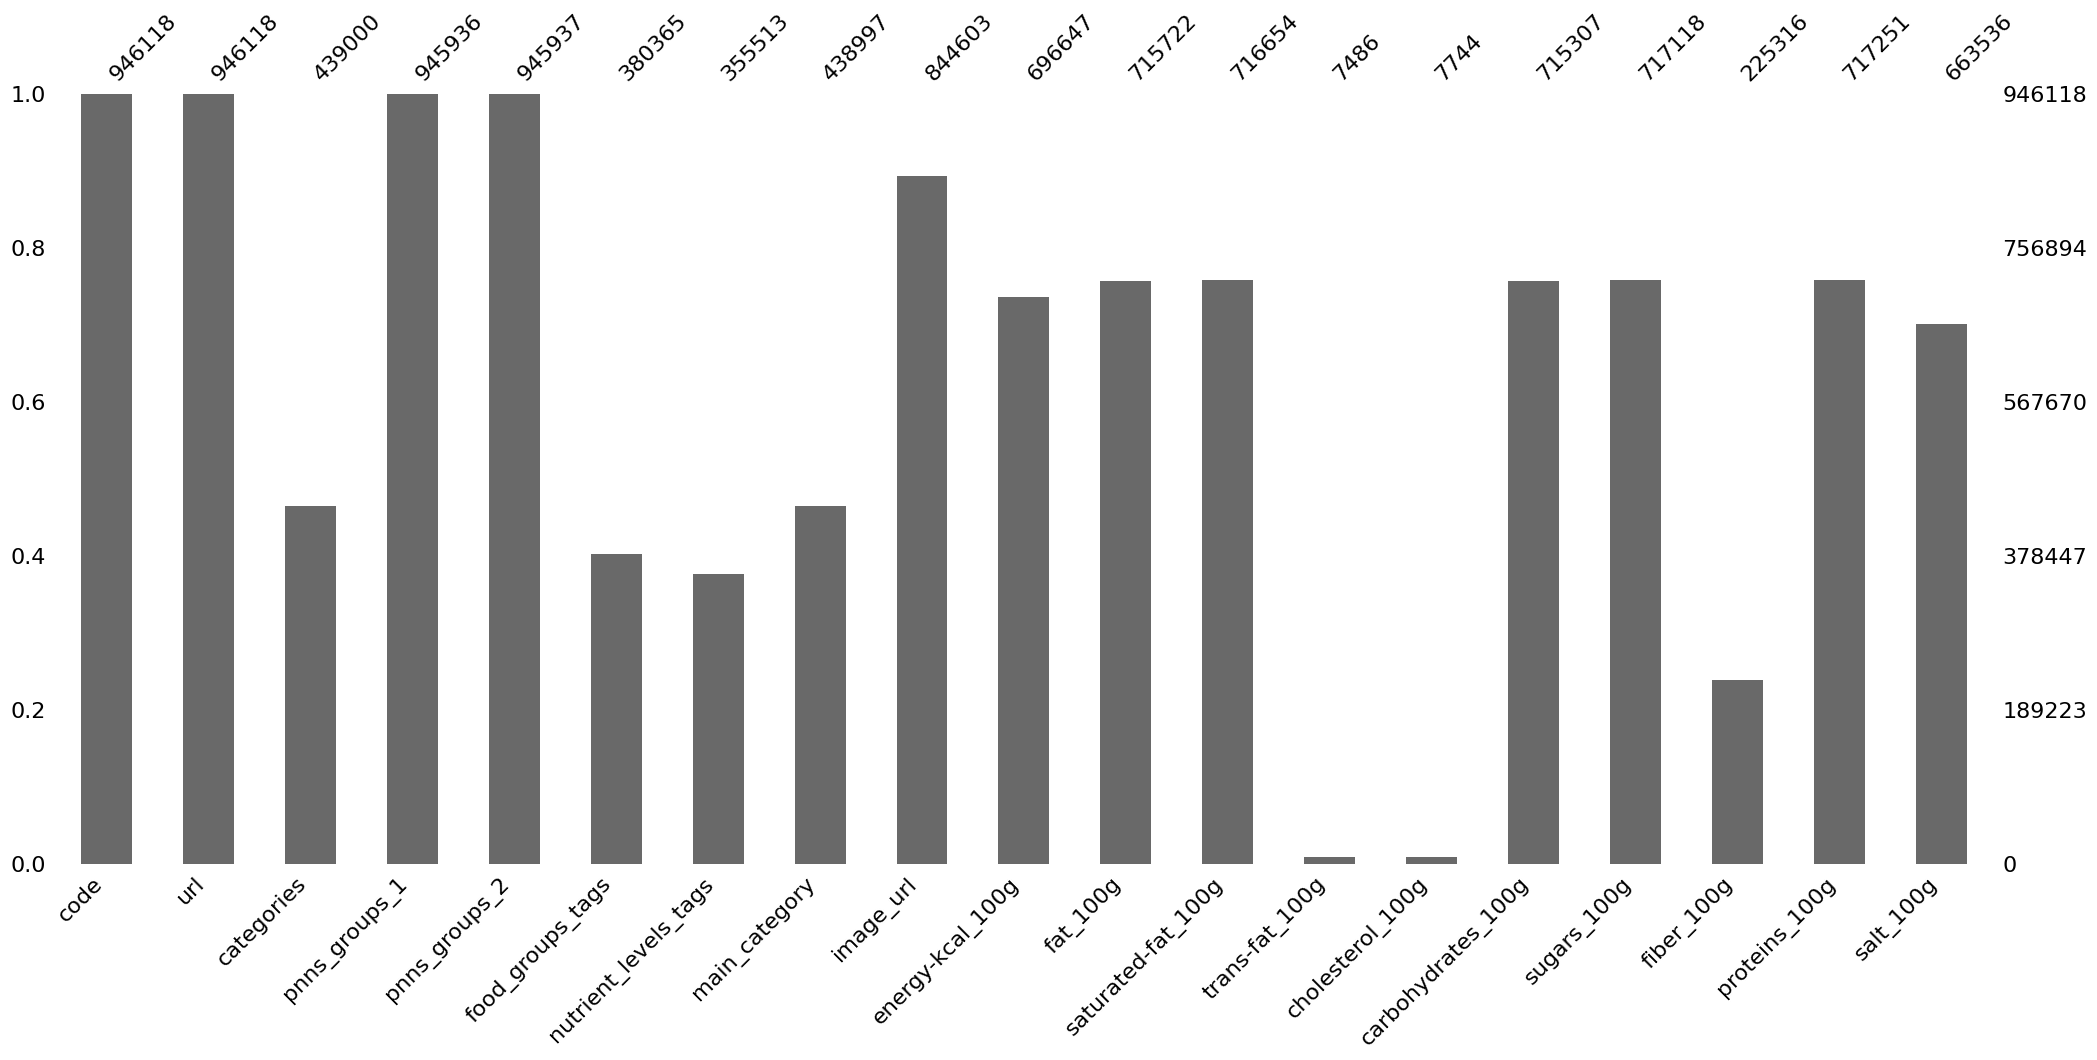

In [15]:
msno.bar(data)

In [130]:
groups_f = ['categories',
          'pnns_groups_1',
          'pnns_groups_2',
          'food_groups_tags',
          'main_category']

nutrients_f = ['nutrient_levels_tags',
             'energy-kcal_100g',
             'fat_100g',
             'saturated-fat_100g',
             'trans-fat_100g',
             'cholesterol_100g', 
             'carbohydrates_100g',
             'sugars_100g',
             'fiber_100g',
             'proteins_100g',
             'salt_100g']

urls_f = ['url', 'image_url']

### food groups features exploration

------------------------------
CATEGORIES :
percentage of data : 46.400131907436496 %
Viandes, Volailles, Poulets, Filets de poulet                                                                                                                                                                              3780
Boissons                                                                                                                                                                                                                   3026
Viandes, Charcuteries, Jambons, Jambons blancs                                                                                                                                                                             2848
Aliments et boissons à base de végétaux, Aliments d'origine végétale, Matières grasses, Matières grasses végétales, Produits de l'olivier, Huiles, Huiles d'olive, Huiles d'olive vierges, Huiles d'olive vierges extra    1923
Snacks, Snacks suc

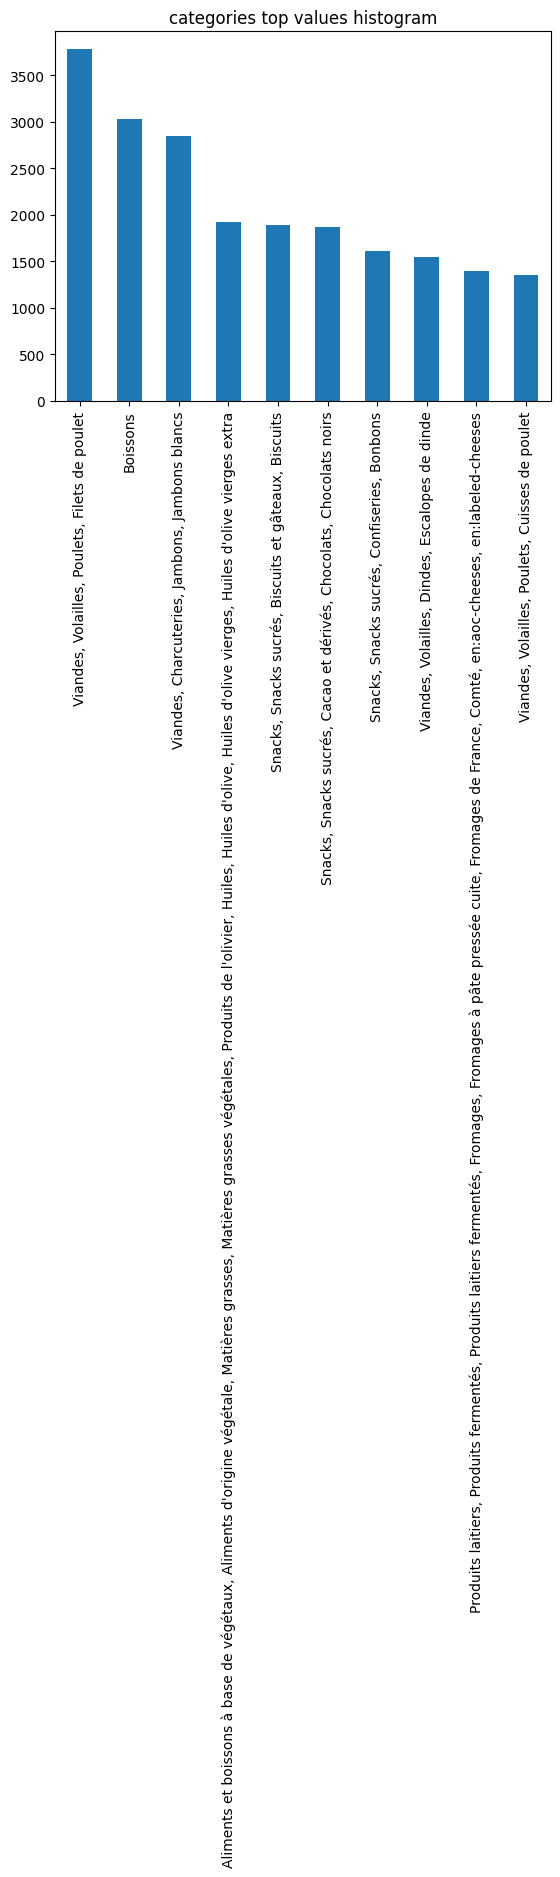


------------------------------
PNNS_GROUPS_1 :
percentage of data : 99.98076349884475 %
unknown                    567278
Sugary snacks               78644
Fish Meat Eggs              65596
Milk and dairy products     44196
Cereals and potatoes        35680
Composite foods             31404
Fruits and vegetables       30458
Beverages                   29211
Fat and sauces              27923
Salty snacks                22863
Name: pnns_groups_1, dtype: int64


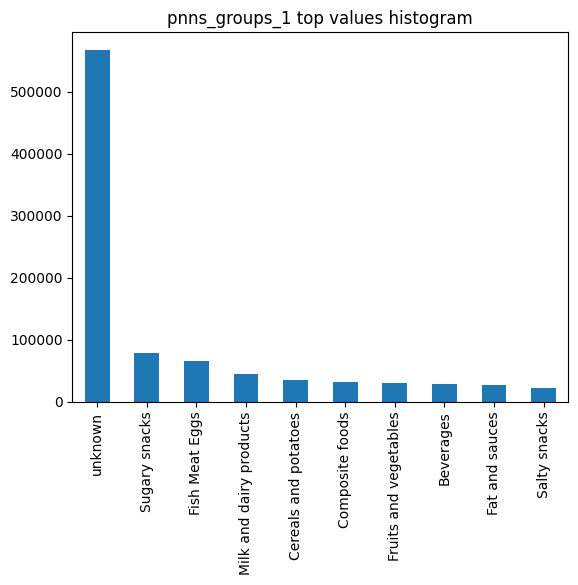


------------------------------
PNNS_GROUPS_2 :
percentage of data : 99.98086919390605 %
unknown                 567278
Sweets                   35463
Biscuits and cakes       28685
Processed meat           24679
One-dish meals           24297
Meat                     23005
Cheese                   22311
Dressings and sauces     18709
Cereals                  16609
Fish and seafood         14563
Name: pnns_groups_2, dtype: int64


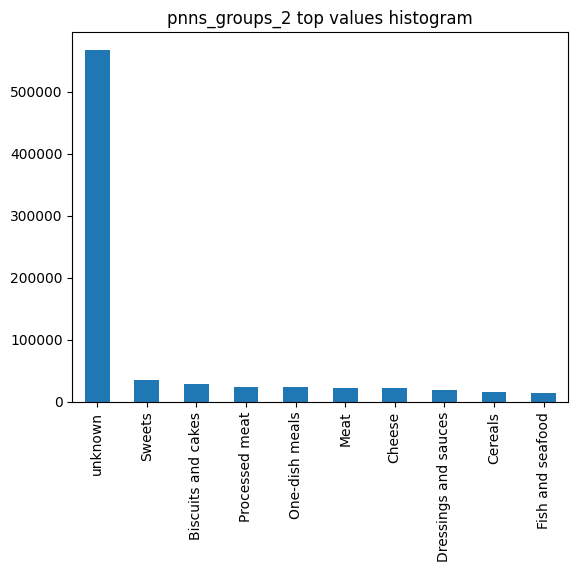


------------------------------
FOOD_GROUPS_TAGS :
percentage of data : 40.202701988546885 %
en:sugary-snacks,en:sweets                    35456
en:sugary-snacks,en:biscuits-and-cakes        28678
en:fish-meat-eggs,en:processed-meat           24302
en:composite-foods,en:one-dish-meals          23246
en:milk-and-dairy-products,en:cheese          22305
en:fats-and-sauces,en:dressings-and-sauces    18690
en:cereals-and-potatoes,en:cereals            16605
en:fish-meat-eggs,en:meat,en:poultry          15227
en:fruits-and-vegetables,en:vegetables        14347
en:alcoholic-beverages                        12627
Name: food_groups_tags, dtype: int64


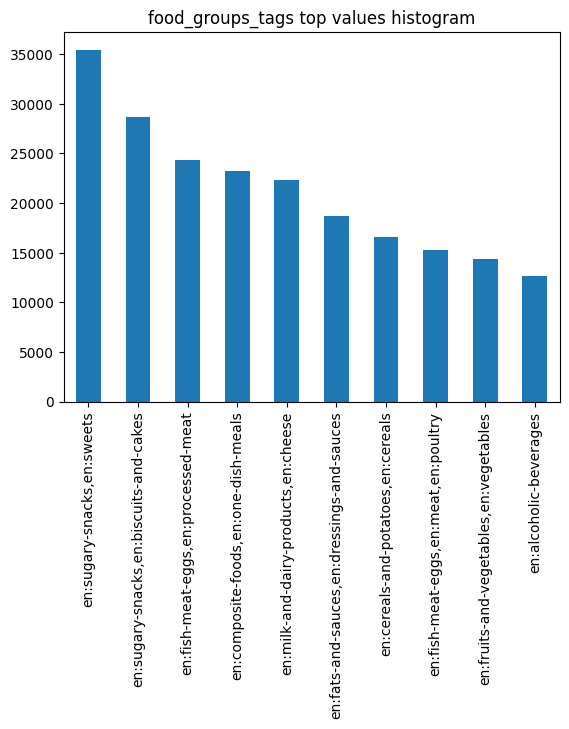


------------------------------
MAIN_CATEGORY :
percentage of data : 46.399814822252615 %
en:groceries                  20987
en:sweetened-beverages         4741
en:beverages                   4130
en:chicken-breasts             4067
en:biscuits                    3399
en:white-hams                  3048
en:extra-virgin-olive-oils     2624
en:candies                     2503
en:dark-chocolates             2417
en:unsweetened-beverages       2317
Name: main_category, dtype: int64


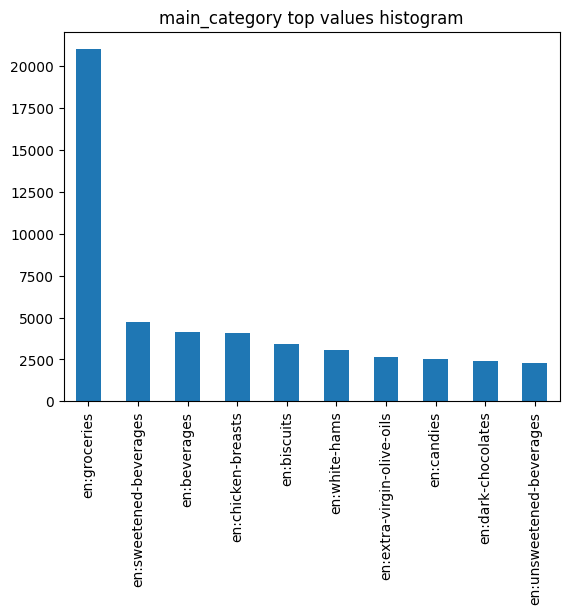

In [23]:
for feat in groups_f:
    print('-'*30)
    print(feat.upper() +' :')
    print(f"percentage of data : {data[feat].notnull().mean()*100} %")
    top = top_values(data, feat)
    print(top)
    top.plot(kind='bar')
    plt.title(f"{feat} top values histogram")
    plt.show()    
    print('')

In [64]:
groups = data.loc[:, groups_f]
urls = data.loc[:, urls_f]
nutrients = data.loc[:, nutrients_f]

<AxesSubplot: >

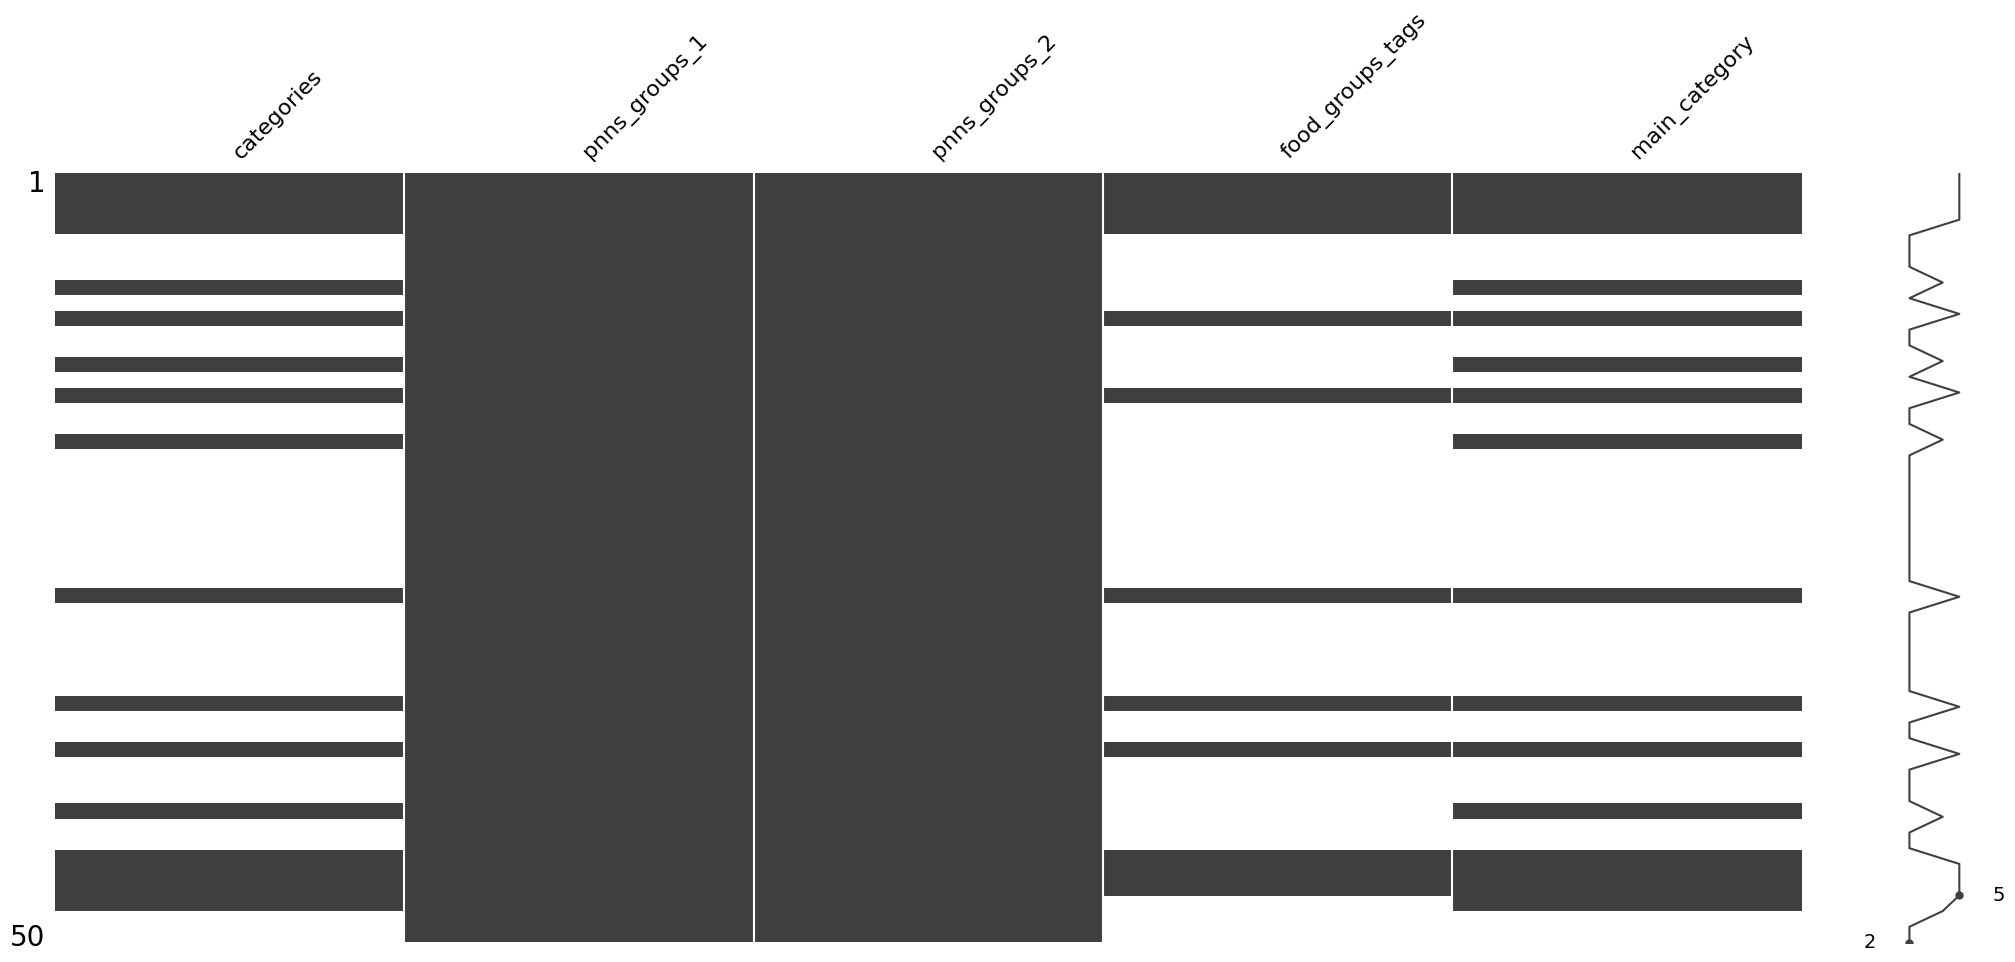

In [65]:
msno.matrix(groups.sample(50))

<AxesSubplot: >

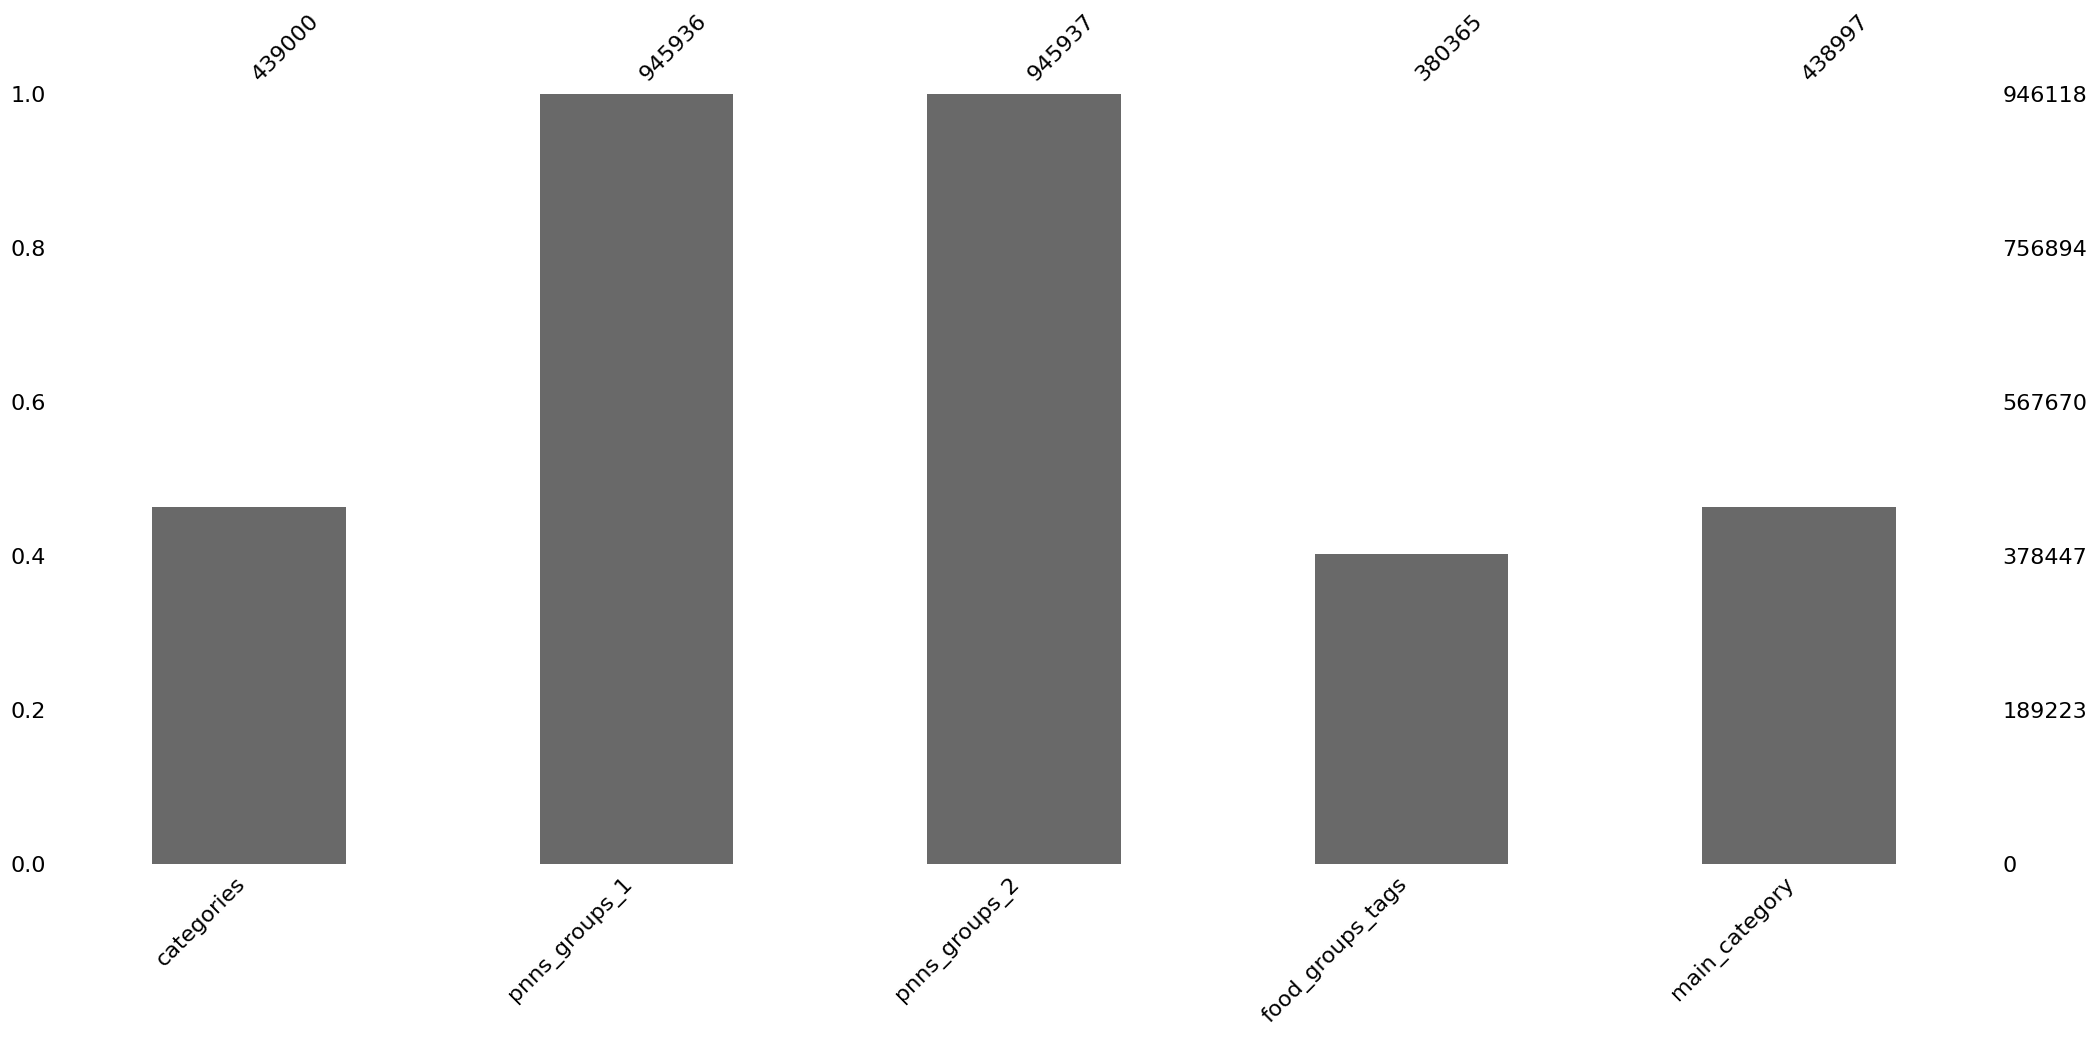

In [30]:
msno.bar(groups)

From what we can see above, categories and main_category are almost
filled identically. And food_groups is also very similar. But with a
bit more of missing values.

In [ ]:
# Observing categories and main_category differences
groups.loc[groups.categories.notnull() & groups.main_category.isnull()]

categories pnns_groups_1 pnns_groups_2 food_groups_tags main_category
790933          ?       unknown       unknown              NaN           NaN
932843          .       unknown       unknown              NaN           NaN
935212          ?       unknown       unknown              NaN           NaN

In [ ]:
# Observing categories and main_category differences
groups.loc[groups.categories.notnull() & groups.main_category.isnull()]

categories pnns_groups_1 pnns_groups_2 food_groups_tags main_category
790933          ?       unknown       unknown              NaN           NaN
932843          .       unknown       unknown              NaN           NaN
935212          ?       unknown       unknown              NaN           NaN

In [32]:
# Observing categories and main_category differences
groups.loc[groups.categories.notnull() & groups.main_category.isnull()]

categories pnns_groups_1 pnns_groups_2 food_groups_tags main_category
790933          ?       unknown       unknown              NaN           NaN
932843          .       unknown       unknown              NaN           NaN
935212          ?       unknown       unknown              NaN           NaN

In [67]:
groups.sample(20)

categories  \
913640                                                NaN   
331267                                  en:dairy-desserts   
347743                                                NaN   
280647               Boissons, Boissons avec sucre ajouté   
637581                                                NaN   
653255  Produits laitiers, Produits fermentés, Produit...   
447806  Boissons, Produits laitiers, Produits fermenté...   
806289                                                NaN   
753935  Aliments et boissons à base de végétaux, Alime...   
540371        Snacks, Snacks sucrés, Confiseries, Bonbons   
922076  Compléments alimentaires, Compléments pour le ...   
39456   Aliments et boissons à base de végétaux, Alime...   
564056                                                NaN   
492966                                                NaN   
452317  Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...   
106476                                                NaN   
454513                                                NaN   
1890                                                  NaN   
711465                                                NaN   
436029                                                NaN   

                  pnns_groups_1        pnns_groups_2  \
913640                  unknown              unknown   
331267  Milk and dairy products       Dairy desserts   
347743                  unknown              unknown   
280647                Beverages  Sweetened beverages   
637581                  unknown              unknown   
653255  Milk and dairy products               Cheese   
447806  Milk and dairy products      Milk and yogurt   
806289                  unknown              unknown   
753935     Cereals and potatoes              Cereals   
540371            Sugary snacks               Sweets   
922076                  unknown              unknown   
39456     Fruits and vegetables               Fruits   
564056                  unknown              unknown   
492966                  unknown              unknown   
452317            Sugary snacks   Biscuits and cakes   
106476                  unknown              unknown   
454513                  unknown              unknown   
1890                    unknown              unknown   
711465                  unknown              unknown   
436029                  unknown              unknown   

                                     food_groups_tags           main_category  
913640                                            NaN                     NaN  
331267   en:milk-and-dairy-products,en:dairy-desserts       en:dairy-desserts  
347743                                            NaN                     NaN  
280647            en:beverages,en:sweetened-beverages  en:sweetened-beverages  
637581                                            NaN                     NaN  
653255           en:milk-and-dairy-products,en:cheese      en:artisan-cheeses  
447806  en:milk-and-dairy-products,en:milk-and-yogurt    en:drinkable-yogurts  
806289                                            NaN                     NaN  
753935             en:cereals-and-potatoes,en:cereals                en:rices  
540371                     en:sugary-snacks,en:sweets              en:candies  
922076                                            NaN         en:protein-bars  
39456              en:fruits-and-vegetables,en:fruits              en:bananas  
564056                                            NaN                     NaN  
492966                                            NaN                     NaN  
452317         en:sugary-snacks,en:biscuits-and-cakes               fr:palets  
106476                                            NaN                     NaN  
454513                                            NaN                     NaN  
1890                                              NaN                     NaN  
711465                                            NaN               

Here I observe that pnns groups are less specific than main_category
and probably than the last item of categories.
I also notice that pnns1 and pnns2 are contained in food_groups_tags



In [69]:
# Creating a new column with the last item of categories for
# easier readability and comparison with main_category.
def get_last_item(categories: str) -> str:
    """ Return the last item of a string filled
        with comma separators.
        
        Example : 'tutu,bar,foo' -> 'foo' 
        
        If a np.nan is provided (type float),
        return np.nan. 
    """
    if type(categories) is str:
        if ',' not in categories:
            return categories
        else: 
            inv_cat = categories[::-1]
            return inv_cat[:inv_cat.find(',')][::-1]
    # For NaN's, which are of type float.
    else:
        return categories

groups['tinniest_category'] = groups.categories.apply(get_last_item)

In [70]:
groups.loc[:,['main_category','tinniest_category']].sample(20)

main_category         tinniest_category
839234         en:canned-tunas         Thons en conserve
652283                     NaN                       NaN
820226                     NaN                       NaN
5587                 en:snacks                    Snacks
589436                     NaN                       NaN
328934       en:cheese-spreads       Fromages à tartiner
365225          en:ratatouille              Ratatouilles
423163  en:dietary-supplements  Compléments alimentaires
809212            en:smoothies                 Smoothies
13574                      NaN                       NaN
398277            en:galantine                 Galantine
712259     en:dehydrated-soups          Dehydrated soups
81515   en:greek-style-yogurts       Greek-style yogurts
290227                     NaN                       NaN
202563     en:young-mimolettes         Mimolettes jeunes
463909       en:sweet-fritters           Beignets sucrés
555084                     NaN                       NaN
873553                     NaN                       NaN
583765     en:country-terrines      Terrines de campagne
669804                     NaN                       NaN

So it appears to mainly be a translation.
Consequently, I could keep pnns_groups 1 and 2 + main_category to create homogeneous groups on which I could compute some indicators.

main_category seem to be already a bit processed, and so
probably easier to work with, although it has the drawback
to be mainly translated to english, which might be a problem
when printing messages in the application.

### Nutrients features exploration

<AxesSubplot: >

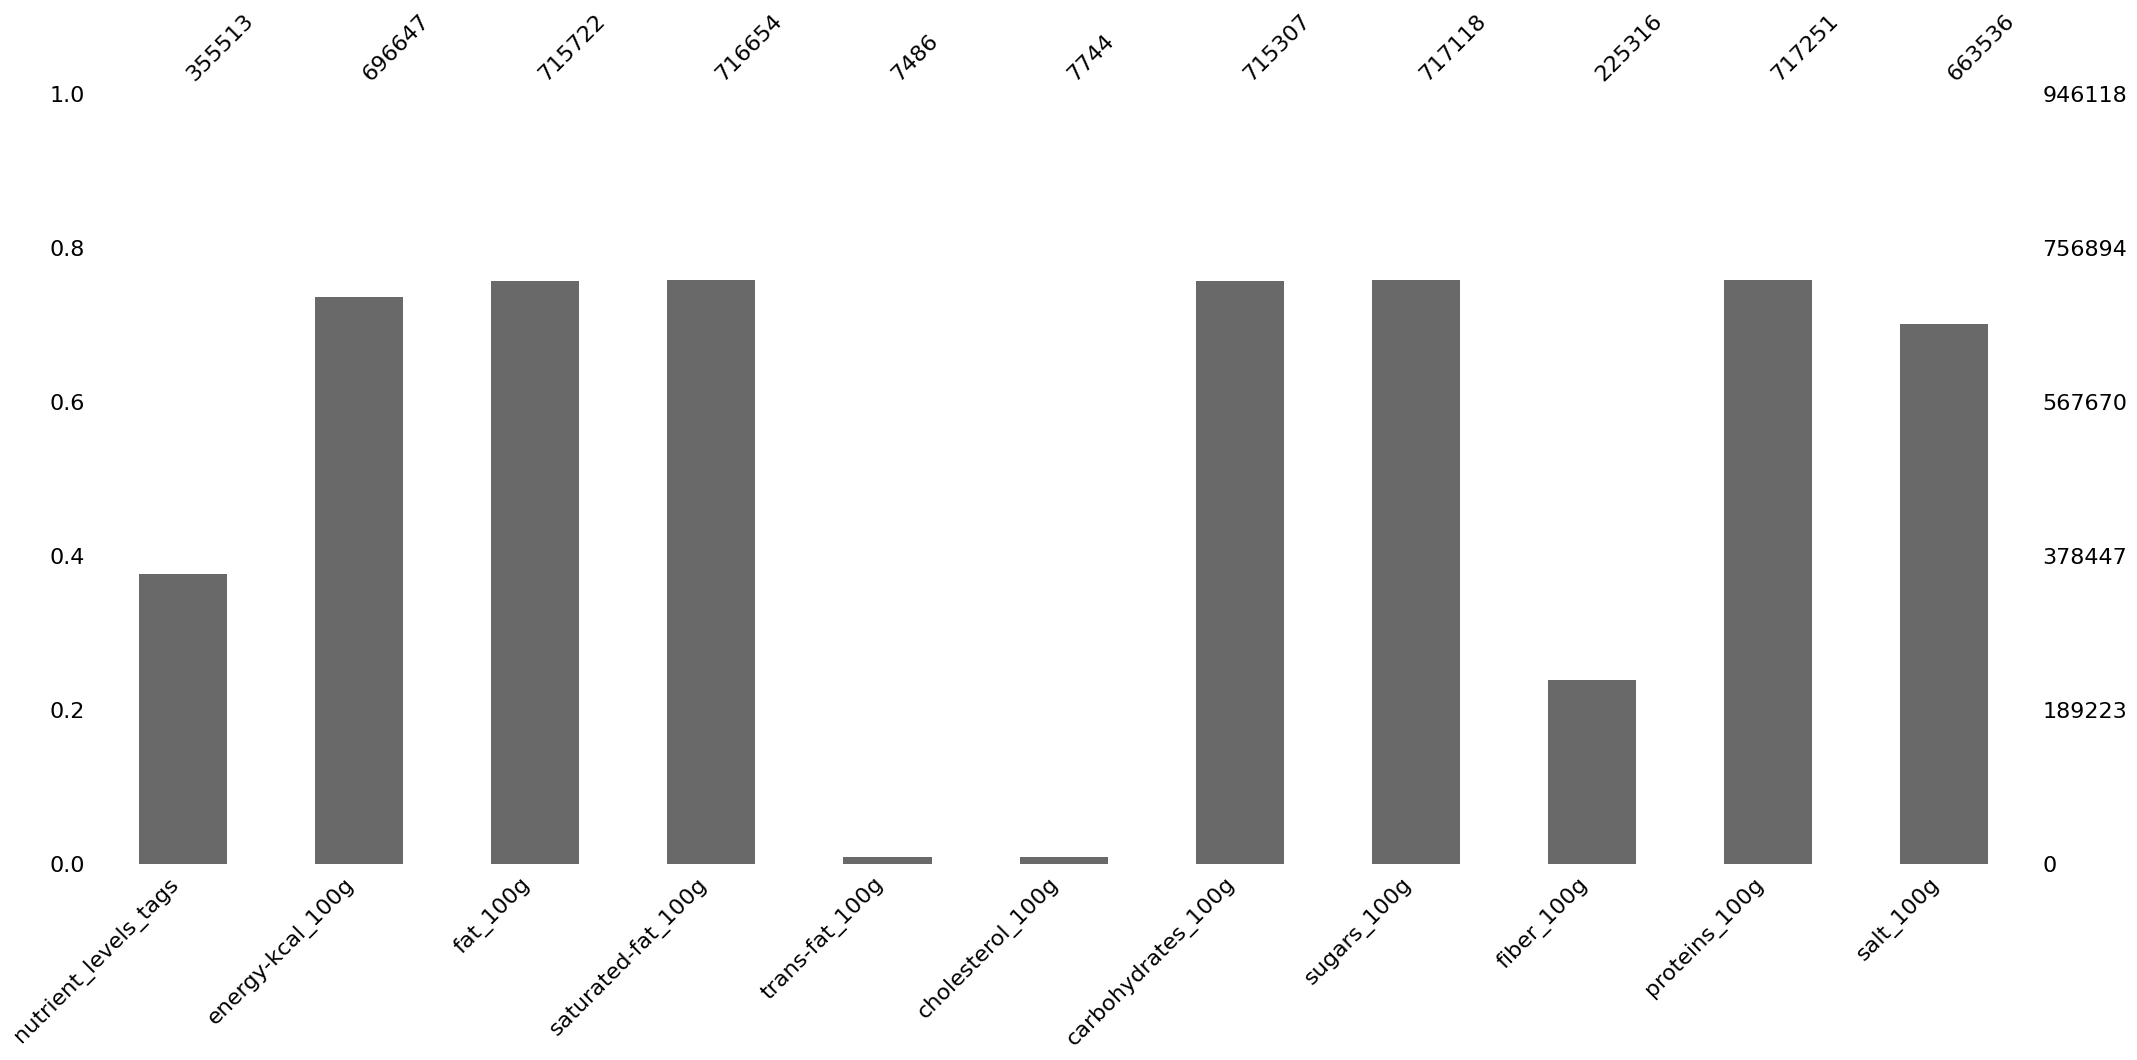

In [71]:
msno.bar(nutrients)

transfat and cholesterol will not be of use because we have almost no information, and it was not useful for the app goal.

In [102]:
nutrients_f = ['nutrient_levels_tags',
             'energy-kcal_100g',
             'fat_100g',
             'saturated-fat_100g',
             'carbohydrates_100g',
             'sugars_100g',
             'fiber_100g',
             'proteins_100g',
             'salt_100g']

nutrients = data.loc[:, nutrients_f]

In [103]:
nutrients.dtypes

nutrient_levels_tags     object
energy-kcal_100g        float64
fat_100g                float64
saturated-fat_100g      float64
carbohydrates_100g      float64
sugars_100g             float64
fiber_100g              float64
proteins_100g           float64
salt_100g               float64
dtype: object

In [74]:
# all numeric except the first one, what's inside?
top_values(nutrients, 'nutrient_levels_tags')

en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-high-quantity,en:salt-in-low-quantity                  36340
en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-low-quantity                   25695
en:fat-in-moderate-quantity,en:saturated-fat-in-moderate-quantity,en:sugars-in-low-quantity,en:salt-in-moderate-quantity    22428
en:fat-in-high-quantity,en:saturated-fat-in-high-quantity,en:sugars-in-low-quantity,en:salt-in-high-quantity                19809
en:fat-in-high-quantity,en:saturated-fat-in-high-quantity,en:sugars-in-low-quantity,en:salt-in-moderate-quantity            19710
en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-moderate-quantity              18994
en:fat-in-high-quantity,en:saturated-fat-in-high-quantity,en:sugars-in-high-quantity,en:salt-in-low-quantity                15033
en:fat-in-moderate-quantity,en:saturated-fat-in-moderate-quantity,en:sugars-in-low-quantit

So we could find sugars-in-low|high-quantity tags here.

In [104]:
nutrients.describe()

energy-kcal_100g      fat_100g  saturated-fat_100g  carbohydrates_100g  \
count      6.966470e+05  7.157220e+05       716654.000000       715307.000000   
mean       1.435450e+08  1.536910e+08            5.434885           26.968285   
std        1.198102e+11  1.300231e+11           14.240110           43.315795   
min       -5.300000e+01  0.000000e+00            0.000000            0.000000   
25%        1.120000e+02  1.050000e+00            0.200000            2.500000   
50%        2.610000e+02  8.000000e+00            2.000000           13.800000   
75%        3.990000e+02  2.200000e+01            7.900000           51.200000   
max        1.000000e+14  1.100000e+14         8569.000000        16908.000000   

        sugars_100g    fiber_100g  proteins_100g     salt_100g  
count  7.171180e+05  2.253160e+05   7.172510e+05  6.635360e+05  
mean   1.394471e+08  4.355339e+41   1.538861e+01  1.832777e+01  
std    1.180877e+11  2.067369e+44   5.247679e+03  1.362867e+04  
min   -1.000000e-01  0.000000e+00  -2.000000e+00  0.000000e+00  
25%    6.000000e-01  1.000000e-01   1.600000e+00  7.700000e-02  
50%    3.300000e+00  1.600000e+00   6.300000e+00  5.700000e-01  
75%    1.860000e+01  3.800000e+00   1.300000e+01  1.375000e+00  
max    1.000000e+14  9.813275e+46   4.444222e+06  1.110144e+07

There are definitely some problems here. Max should be of 100 in each column. And min can not be negative...

In [105]:
# Keeping only the numerical part of nutrients.
nutrients = nutrients.loc[:, 'energy-kcal_100g':]

In [106]:
# find negative values.
nutrients.loc[(nutrients < 0).any(axis='columns')]

energy-kcal_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
248972               NaN      30.0                21.0                 0.8   
666000             840.0     100.0                 9.0                 0.0   
683910             -53.0       NaN                 NaN                 NaN   
794794               NaN       NaN                 NaN                 NaN   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  
248972         -0.1         NaN           15.3        1.4  
666000          0.0        40.0           -2.0        0.0  
683910          NaN         NaN            NaN        NaN  
794794          NaN         NaN           -1.0        NaN

In [107]:
# find values exceeding 100g
nutrients_100g = nutrients.loc[:, 'fat_100g':]
nutrients_100g.loc[(nutrients_100g > 100).any(axis='columns')]

fat_100g  saturated-fat_100g  carbohydrates_100g   sugars_100g  \
1579    2.500000e+03         1100.000000         5300.000000  3.200000e+03   
1612    1.000000e+02                 NaN         1400.000000           NaN   
2160    5.555556e+00            0.505051           24.242424  3.030303e+00   
2819    1.000000e+02           44.300000          257.000000  1.860000e+02   
3281    2.870000e+02           25.300000           60.700000  4.130000e+01   
...              ...                 ...                 ...           ...   
943808  2.480000e+01           11.300000           68.700000  5.100000e+00   
944730  1.100000e+14                 NaN                 NaN  1.000000e+14   
944765  1.100000e+02           10.000000          110.000000  1.760000e+02   
945079  8.900000e+01           23.000000            6.000000  5.600000e+01   
945312  9.000000e+00            2.500000            0.000000  0.000000e+00   

        fiber_100g  proteins_100g   salt_100g  
1579         100.0     800.000000         NaN  
1612         600.0     700.000000         NaN  
2160           NaN       4.040404  505.050505  
2819          51.4      10.700000    0.000000  
3281           NaN      17.300000    8.000000  
...            ...            ...         ...  
943808         1.0       0.800000  820.000000  
944730         NaN            NaN         NaN  
944765      1710.0     176.000000         NaN  
945079         9.0     325.000000         NaN  
945312         0.0      17.000000  200.000000  

[395 rows x 7 columns]

In [110]:
# find values exceeding 100g
print(nutrients_100g.shape[0])
nutrients_100g = nutrients.loc[:, 'fat_100g':]
nutrients_100g.loc[(nutrients_100g > 105).any(1)]



946118


/tmp/ipykernel_46772/2635859436.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nutrients_100g.loc[(nutrients_100g > 105).any(1)]


fat_100g  saturated-fat_100g  carbohydrates_100g   sugars_100g  \
1579    2.500000e+03         1100.000000         5300.000000  3.200000e+03   
1612    1.000000e+02                 NaN         1400.000000           NaN   
2160    5.555556e+00            0.505051           24.242424  3.030303e+00   
2819    1.000000e+02           44.300000          257.000000  1.860000e+02   
3281    2.870000e+02           25.300000           60.700000  4.130000e+01   
...              ...                 ...                 ...           ...   
943808  2.480000e+01           11.300000           68.700000  5.100000e+00   
944730  1.100000e+14                 NaN                 NaN  1.000000e+14   
944765  1.100000e+02           10.000000          110.000000  1.760000e+02   
945079  8.900000e+01           23.000000            6.000000  5.600000e+01   
945312  9.000000e+00            2.500000            0.000000  0.000000e+00   

        fiber_100g  proteins_100g   salt_100g  
1579         100.0     800.000000         NaN  
1612         600.0     700.000000         NaN  
2160           NaN       4.040404  505.050505  
2819          51.4      10.700000    0.000000  
3281           NaN      17.300000    8.000000  
...            ...            ...         ...  
943808         1.0       0.800000  820.000000  
944730         NaN            NaN         NaN  
944765      1710.0     176.000000         NaN  
945079         9.0     325.000000         NaN  
945312         0.0      17.000000  200.000000  

[378 rows x 7 columns]

Not to many apparent problems considering the ratio 178/946_118.

I will clean this in a latter dataframe.

### urls exploration.

<AxesSubplot: >

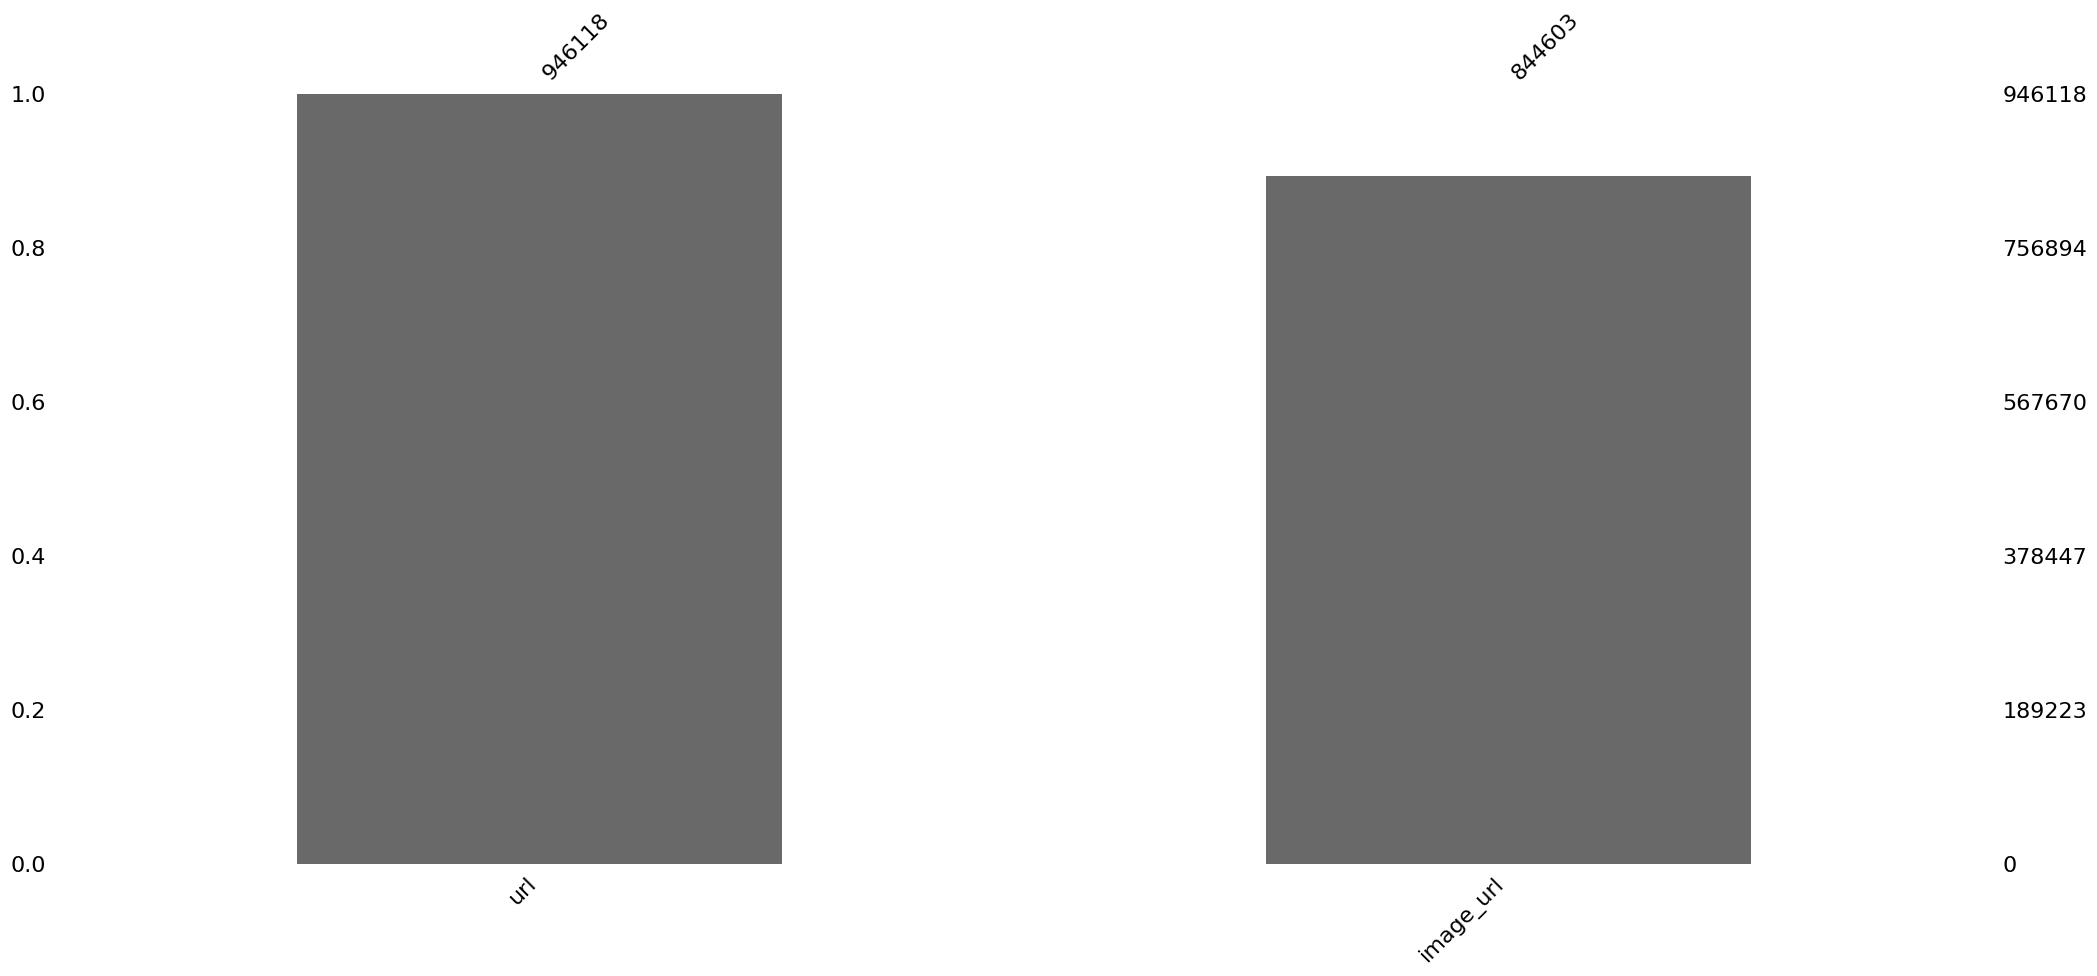

In [111]:
msno.bar(urls)

In [115]:
urls_sample = urls.sample(3)
for i, row in urls_sample.iterrows():
    print(row.values)

['http://world-en.openfoodfacts.org/product/0208928028278/pain-blanc-ble-t65'
 'https://images.openfoodfacts.org/images/products/020/892/802/8278/front_fr.4.400.jpg']
['http://world-en.openfoodfacts.org/product/3770013524172/risotto-curry-et-lait-de-coco-2-pers'
 'https://images.openfoodfacts.org/images/products/377/001/352/4172/front_fr.3.400.jpg']
['http://world-en.openfoodfacts.org/product/8009280002577/saltelli-grissini-integrali'
 'https://images.openfoodfacts.org/images/products/800/928/000/2577/front_it.3.400.jpg']


On those 3 examples, I checked if photos were the same on both urls. And It was. Nevertheless there are more missing image_url. Let's watch what happens in that case.

In [117]:
no_image = urls.loc[urls.image_url.isnull()]
for i, row in no_image.sample(5).iterrows():
    print(row.values)

['http://world-en.openfoodfacts.org/product/0567527009218/creme-fraiche-epaisse-marque-repere-bio-village'
 nan]
['http://world-en.openfoodfacts.org/product/5900857011080/smaragd-26' nan]
['http://world-en.openfoodfacts.org/product/13251212512000261886/kiwi-jaune-cal-33-cat-2-france-bio-x1'
 nan]
['http://world-en.openfoodfacts.org/product/3546691779780/dark-chocolate-nuts-sea-salt-kind-thins'
 nan]
['http://world-en.openfoodfacts.org/product/4901335006087/koikeya-original-premium-japanese-potato-chips-teriyaki'
 nan]


In [119]:
urls.image_url.notnull().mean()

0.8927036585288516

We can conclude that it is likely to find pictures for almost 90 % of the products. I will keep only the image_url for the app designer.

## A last exploration



In [4]:
countries = pd.read_csv('./csv_files/data.csv',
                        sep='\t',
                        usecols=['countries_tags'])

# Searching for products sold in France.
fr = countries.loc[countries.countries_tags
                   .str.contains('france', case=False, na=False), :]

print(f"There are {len(fr)} products sold in France in the database.")

# Rows containing irrelevant information for french customers.
rows_to_skip =  [n 
                 for n in range(countries.shape[0])
                 if n not in fr.index]

with open('./features3.txt', 'r') as fin:
    features = [feat.strip('- \n') for feat in fin]
print(features)

There are 946118 products sold in France in the database.
['creator', 'created_t', 'last_modified_t', 'cities_tags', 'purchase_places', 'stores', 'states_tags']


In [5]:
data = pd.read_csv('./csv_files/data.csv',
                   sep='\t',
                   usecols=features,
                   skiprows=rows_to_skip)

/tmp/ipykernel_4585/1373838388.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./csv_files/data.csv',


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946118 entries, 0 to 946117
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   creator          946116 non-null  object
 1   created_t        946118 non-null  int64 
 2   last_modified_t  946118 non-null  int64 
 3   cities_tags      79676 non-null   object
 4   purchase_places  100980 non-null  object
 5   stores           176043 non-null  object
 6   states_tags      946118 non-null  object
dtypes: int64(2), object(5)
memory usage: 50.5+ MB


<AxesSubplot: >

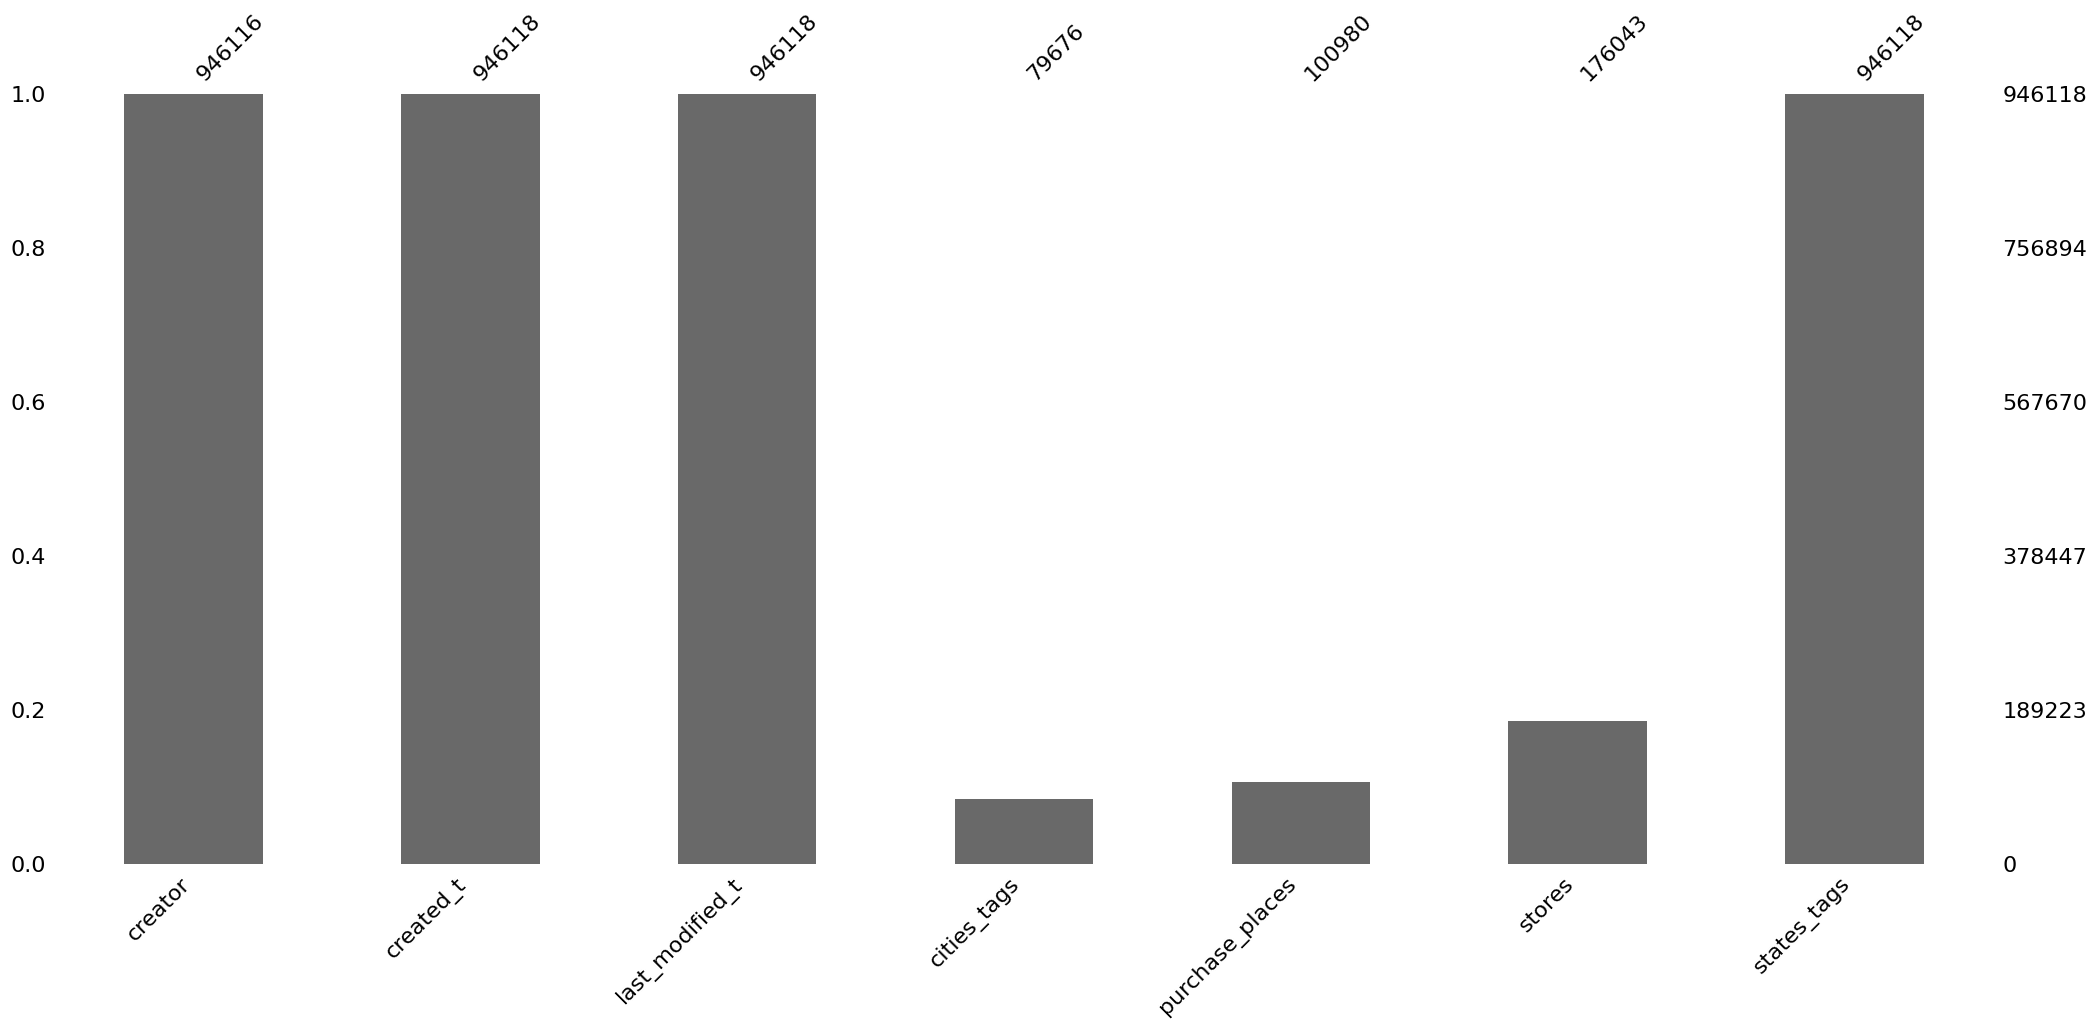

In [124]:
msno.bar(data)

------------------------------
CREATOR :
percentage of data : 99.99978860987741 %
kiliweb                       683819
openfoodfacts-contributors     86798
foodvisor                      20047
date-limite-app                13399
nutrinet-sante                  9676
tacite                          7471
sebleouf                        7442
prepperapp                      6508
elcoco                          5579
usda-ndb-import                 4586
Name: creator, dtype: int64


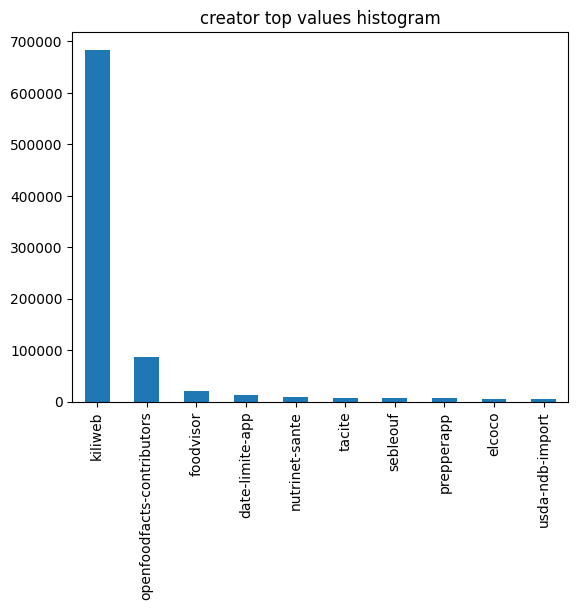


------------------------------
CREATED_T :
percentage of data : 100.0 %
1621521960    18
1621521959    18
1621521958    18
1552319300    18
1621521961    18
1621521956    17
1621521963    17
1621521957    16
1621521962    15
1621412998    14
Name: created_t, dtype: int64


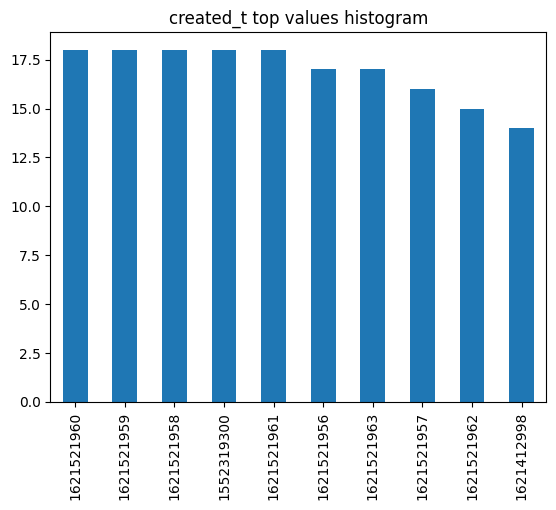


------------------------------
LAST_MODIFIED_T :
percentage of data : 100.0 %
1626000238    112
1671619856    107
1619867762    103
1616577587    102
1626000239    101
1619868555     97
1630147781     97
1616577586     96
1619867761     96
1619874712     95
Name: last_modified_t, dtype: int64


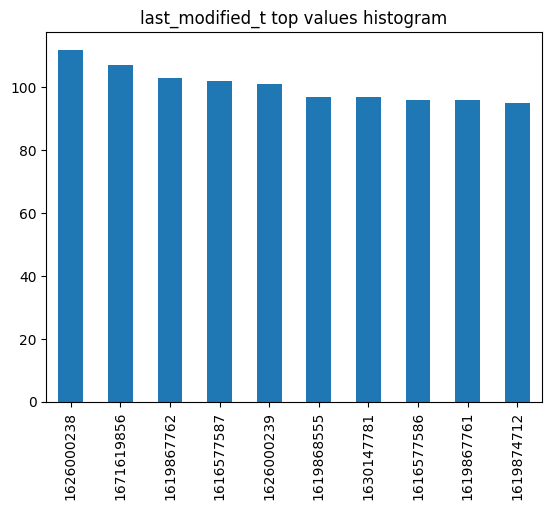


------------------------------
CITIES_TAGS :
percentage of data : 8.421359703546493 %
sable-sur-sarthe-sarthe-france           999
theix-morbihan-france                    531
corbas-rhone-france                      464
saint-evarzec-finistere-france           455
nueil-les-aubiers-deux-sevres-france     428
kervignac-morbihan-france                421
chateaubourg-ille-et-vilaine-france      398
villers-bocage-calvados-france           392
boulogne-sur-mer-pas-de-calais-france    375
douarnenez-finistere-france              372
Name: cities_tags, dtype: int64


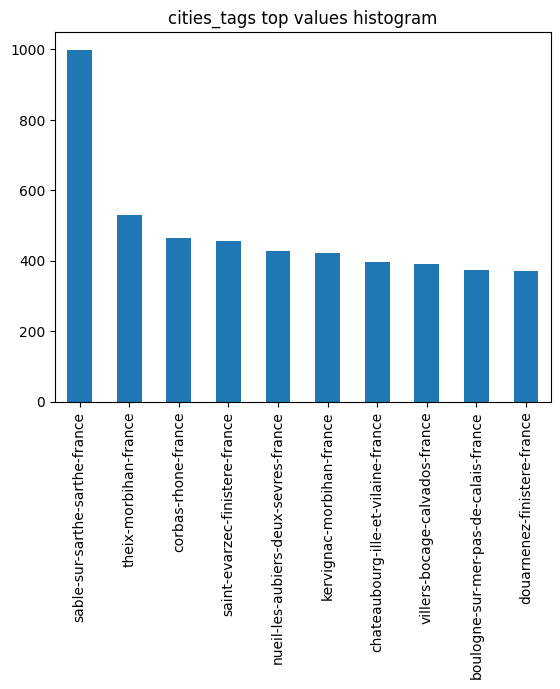


------------------------------
PURCHASE_PLACES :
percentage of data : 10.673087289323318 %
France               40375
Lyon,France           3088
Courrières,France     2222
France,Nantes         2206
Deutschland           2173
Paris,France          1945
Rennes,France         1015
España                1001
France,Trignac         936
Belgique               877
Name: purchase_places, dtype: int64


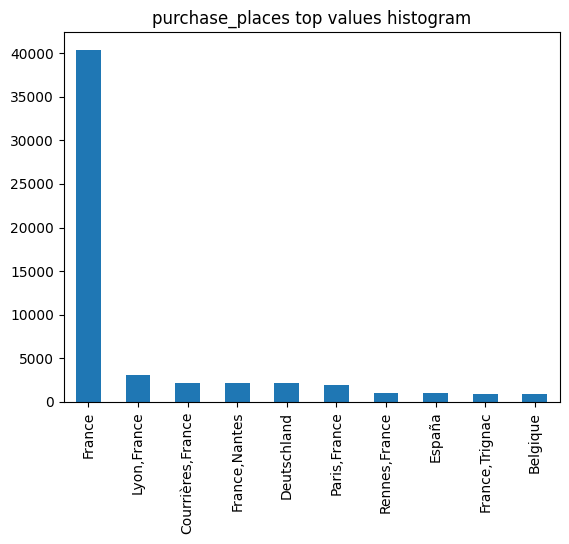


------------------------------
STORES :
percentage of data : 18.606875675127206 %
Auchan          15961
Carrefour       14121
Leclerc         10563
Magasins U       9704
carrefour.fr     7215
Casino           6660
Lidl             6276
Intermarché      5692
Monoprix         5311
Leader Price     4297
Name: stores, dtype: int64


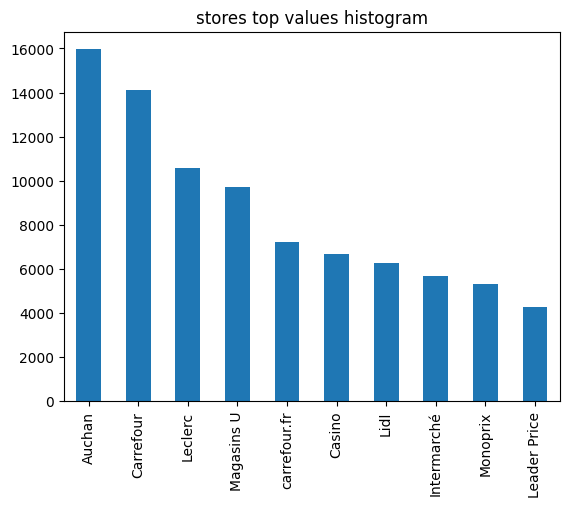


------------------------------
STATES_TAGS :
percentage of data : 100.0 %
en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:origins-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:packaging-photo-to-be-selected,en:nutrition-photo-selected,en:ingredients-photo-to-be-selected,en:front-photo-selected,en:photos-uploaded                119412
en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:origins-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:pac

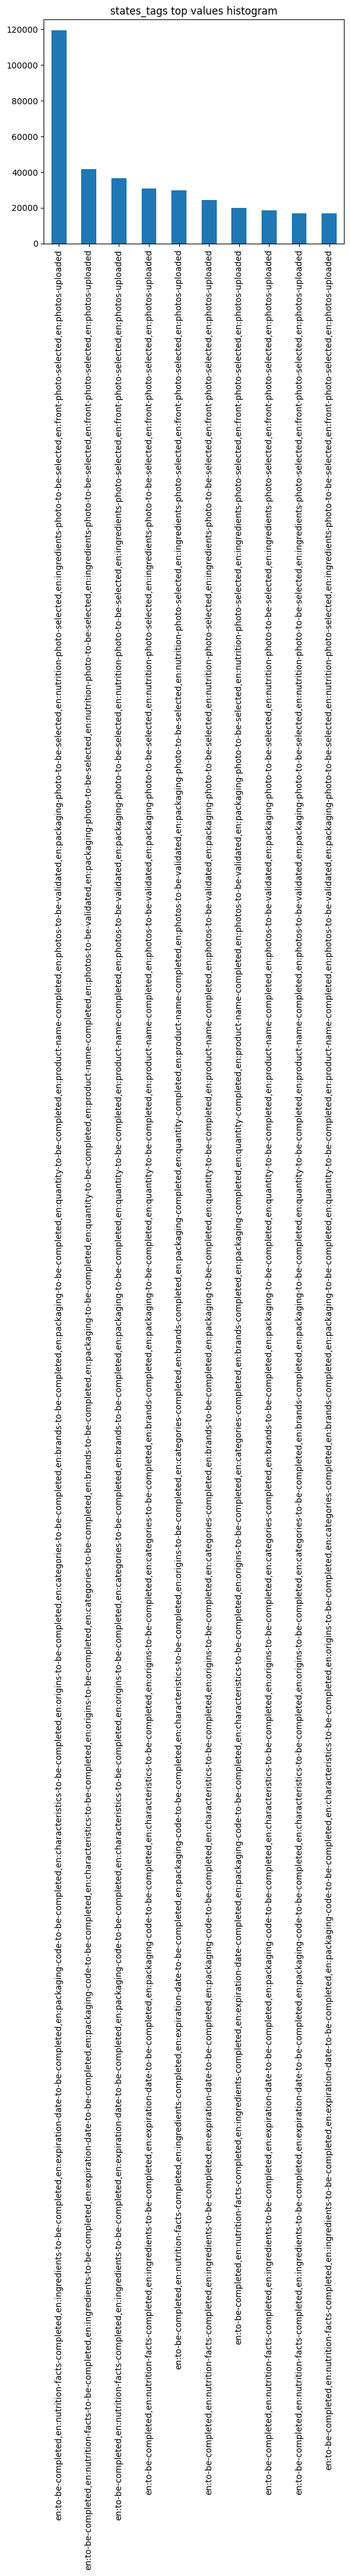

In [123]:
for feat in features:
    print('-'*30)
    print(feat.upper() +' :')
    print(f"percentage of data : {data[feat].notnull().mean()*100} %")
    top = top_values(data, feat)
    print(top)
    top.plot(kind='bar')
    plt.title(f"{feat} top values histogram")
    plt.show()    
    print('')

Stores can be interesting regarding the application (quite a lot of products are known from each important retailers.)

states_tags can be interesting : it tells what is to be done or if a product is fully filled.



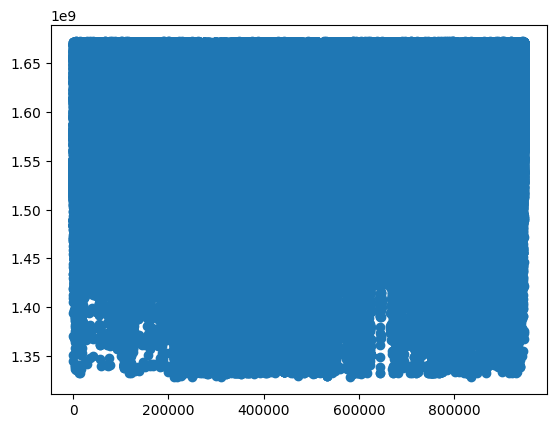

In [10]:
x = range(len(data))
y = data.created_t.values
plt.scatter(x,y)

In [14]:
data.created_t.tail(10)

946108    1621104909
946109    1644074322
946110    1587209487
946111    1659690408
946112    1648705473
946113    1577002381
946114    1572513866
946115    1666599417
946116    1613129728
946117    1587222660
Name: created_t, dtype: int64

In [15]:
data.last_modified_t.tail(10)

946108    1621104926
946109    1644074323
946110    1591133605
946111    1659690413
946112    1650818279
946113    1644568867
946114    1572513866
946115    1666599418
946116    1660330421
946117    1605558295
Name: last_modified_t, dtype: int64

So, the products are not ordered by creation time, neither by last modification time. No smart way to process only the last added elements when the database is updated. At least, via this prism.

## Building the ultimate dataframe to begin the cleaning process.

In [119]:
with open('./features4.txt', 'r') as fin:
    features = [feat.strip('\n') for feat in fin]
print(features)

['code', 'product_name', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'nutriscore_score', 'nutriscore_grade', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'image_url', 'stores', 'quantity', 'serving_size', 'serving_quantity', 'labels_tags', 'nutrient_levels_tags', 'creator', 'data_quality_errors_tags']


In [120]:
len(features)

24

In [121]:
data = pd.read_csv('./csv_files/data.csv.gz',
                   compression='gzip',
                   sep='\t',
                   usecols=features,
                   skiprows=rows_to_skip,
                   dtype={'code': 'object'})

In [122]:
data.head(2)

code  creator product_name quantity labels_tags stores  \
0  00000000000003429145  kiliweb      L.casei      NaN         NaN    NaN   
1  00000000000026772226  kiliweb         Skyr    480 g         NaN    NaN   

  serving_size  serving_quantity  nutriscore_score nutriscore_grade  ...  \
0          NaN               NaN               NaN              NaN  ...   
1          NaN               NaN              -5.0                a  ...   

      main_category                                          image_url  \
0               NaN  https://images.openfoodfacts.org/images/produc...   
1  en:cream-cheeses  https://images.openfoodfacts.org/images/produc...   

  energy-kcal_100g fat_100g saturated-fat_100g carbohydrates_100g  \
0              NaN      1.4                0.9                9.8   
1             57.0      0.2                0.1                3.9   

   sugars_100g  fiber_100g  proteins_100g  salt_100g  
0          9.8         NaN            2.7       0.10  
1          3.9         NaN           10.0       0.09  

[2 rows x 24 columns]

In [123]:
data.to_csv('./csv_files/fr_data.csv.gz',
            index=False,
            sep='\t',
            compression='gzip')

In [84]:
data = pd.read_csv('./csv_files/fr_data.csv.gz',
                   compression='gzip',
                   sep='\t',
                   dtype={'code': 'object'})

In [85]:
data.shape

(946118, 24)

### Duplicates on 'code' which should be a unique identifier.

In [86]:
# Creating a df of duplicated based on 'code' which should be unique.
dup = data.loc[data.duplicated('code',keep=False)].copy()
dup


code                     creator  \
197045   2700963001059                     kiliweb   
197046   2700963001059                     kiliweb   
220907   3033610080541                     kiliweb   
220908   3033610080541                     kiliweb   
222315  30383354190402  openfoodfacts-contributors   
222316  30383354190402  openfoodfacts-contributors   
240630   3108004000006  openfoodfacts-contributors   
240631   3108004000006  openfoodfacts-contributors   
261958  31843340000818  openfoodfacts-contributors   
261959  31843340000818  openfoodfacts-contributors   
454031   3477610001135  openfoodfacts-contributors   
454032   3477610001135  openfoodfacts-contributors   
483637   3560070278831  openfoodfacts-contributors   
483638   3560070278831  openfoodfacts-contributors   
498495   3564700673683                     kiliweb   
498496   3564700673683                     kiliweb   
552933   3700320230572                     kiliweb   
552934   3700320230572                     kiliweb   
555803   3700439700348  openfoodfacts-contributors   
555804   3700439700348  openfoodfacts-contributors   
641469   3760331890198                     kiliweb   
641470   3760331890198                     kiliweb   
653173   3770008983205                         r-x   
653174   3770008983205                         r-x   
793963   6703501220017                     kiliweb   
793964   6703501220017                     kiliweb   
881417   8413808001759                     kiliweb   
881418   8413808001759                     kiliweb   

                                     product_name quantity  \
197045                             Jardin anglais    105 g   
197046                             Jardin anglais    105 g   
220907           Saupon fumé sauvage du pacifique      NaN   
220908           Saumon fumé sauvage du Pacifique     110g   
222315                                    basilic    210 g   
222316                                    basilic    210 g   
240630                                        NaN      NaN   
240631                                        NaN    110 g   
261958                       poudre à lever Pural      21g   
261959                       poudre à lever Pural      21g   
454031                      pâte en croûte  halal  0.500kg   
454032                      pâte en croûte  halal  0.500kg   
483637  Pamplemousse rose, 100 % Pur Fruit Pressé    1 L e   
483638  Pamplemousse rose, 100 % Pur Fruit Pressé      1 l   
498495                            Rosé de Fronton      NaN   
498496                            Rosé de Fronton      NaN   
552933                glace artisanale corse coco      NaN   
552934                glace artisanale corse coco    450 g   
555803                                        NaN      NaN   
555804                                        NaN    270 g   
641469                  Confiture de reine-claude      NaN   
641470                  Confiture de reine-claude      NaN   
653173                      REMYX VODKA Aquatique    70 cl   
653174                      REMYX VODKA Aquatique    70 cl   
793963                                 Farine T45     1 kg   
793964                                 Farine T45     1 kg   
881417                               Sésame blanc      NaN   
881418                               Sésame blanc      NaN   

                                              labels_tags  \
197045                                                NaN   
197046                                                NaN   
220907                                                NaN   
220908                                                NaN   
222315                en:nutriscore,en:nutriscore-grade-a   
222316                en:nutriscore,en:nutriscore-grade-a   
240630                                                NaN   
240631                                                NaN   
261958                                                NaN   
261959                                    

In [87]:
# Counting non-NaN-fields in dup and adding a column with that number
dup.loc[:, 'n'] = dup.count(axis='columns')

# I sort duplicates according to their filling rate.
dup = dup.sort_values(['code','n'])

# Here, globally more info is in last position,
# But it can be possible that one piece of information
# is in the first row and not in the second one.
# So, I groupby 'code' and ffill to propagate that info
# in the last position if the second row is empty and not the first.
# Then I pick up the last value.
dupg = dup.groupby('code').agg(lambda x: x.ffill().iloc[-1])
dupg = dupg.reset_index()

# Dropping those duplicates from the main data
data.drop_duplicates('code', keep=False, inplace=True)

# Adding those retained values to the initial data set.
df = pd.concat([data, dupg], ignore_index=True, axis='rows')
data = df.drop('n', axis=1)

data.tail(20)


code                     creator  \
946084    9999999000041                     kiliweb   
946085    9999999175305                         sil   
946086    9999999910128                     kiliweb   
946087       9999999999                  prepperapp   
946088    9999999999994                     kiliweb   
946089  999999999999999  openfoodfacts-contributors   
946090    2700963001059                     kiliweb   
946091    3033610080541                     kiliweb   
946092   30383354190402  openfoodfacts-contributors   
946093    3108004000006  openfoodfacts-contributors   
946094   31843340000818  openfoodfacts-contributors   
946095    3477610001135  openfoodfacts-contributors   
946096    3560070278831  openfoodfacts-contributors   
946097    3564700673683                     kiliweb   
946098    3700320230572                     kiliweb   
946099    3700439700348  openfoodfacts-contributors   
946100    3760331890198                     kiliweb   
946101    3770008983205                         r-x   
946102    6703501220017                     kiliweb   
946103    8413808001759                     kiliweb   

                                     product_name  quantity  \
946084                       Lenticchie di Ustica       NaN   
946085           Erdbeerkuchen 1019g tiefgefroren  1,019 kg   
946086     Sandwich club Rillette poisson combava       NaN   
946087                            Duschgel - Iris       NaN   
946088                  Light & Free SKYR A BOIRE       NaN   
946089                          Signal Toothpaste       NaN   
946090                             Jardin anglais     105 g   
946091           Saumon fumé sauvage du Pacifique      110g   
946092                                    basilic     210 g   
946093                                        NaN     110 g   
946094                       poudre à lever Pural       21g   
946095                      pâte en croûte  halal   0.500kg   
946096  Pamplemousse rose, 100 % Pur Fruit Pressé       1 l   
946097                            Rosé de Fronton       NaN   
946098                glace artisanale corse coco     450 g   
946099                                        NaN     270 g   
946100                  Confiture de reine-claude       NaN   
946101                      REMYX VODKA Aquatique     70 cl   
946102                                 Farine T45      1 kg   
946103                               Sésame blanc       NaN   

                                              labels_tags  \
946084                           en:organic,en:eu-organic   
946085                                 en:made-in-germany   
946086                                                NaN   
946087                                                NaN   
946088                                                NaN   
946089                                                NaN   
946090                                                NaN   
946091                                                NaN   
946092                en:nutriscore,en:nutriscore-grade-a   
946093                                                NaN   
946094                                                NaN   
946095                                           en:halal   
946096  en:distributor-labels,en:carrefour-quality,en:...   
946097                                                NaN   
946098                                                NaN   
946099                                             en:pdo   
946100              en:organic,en:eu-organic,en:fr-bio-15   
946101                                                NaN   
946102                                                NaN   
946103                                                NaN   

                         stores serving_size  serving_quantity  \
946084                      NaN          NaN               NaN   
946085                      NaN          NaN               NaN   
946086                      NaN          NaN               

In [88]:
# verifying 14 duplicates where dropped.
data.shape

(946104, 24)

In [89]:
data.head(10)

code  creator                  product_name quantity  \
0  00000000000003429145  kiliweb                       L.casei      NaN   
1  00000000000026772226  kiliweb                          Skyr    480 g   
2         0000000000017  kiliweb              Vitória crackers      NaN   
3           00000000001      inf                     hyde icon      NaN   
4         0000000000100    del51   moutarde au moût de raisin      100g   
5         0000000000123  kiliweb         Sauce Sweety chili 0%      NaN   
6         0000000000178  kiliweb                     Mini coco      NaN   
7         0000000000208  kiliweb         Pistou d'ail des ours      NaN   
8         0000000000284  kiliweb                     Pain maïs      NaN   
9         0000000000291  kiliweb                     Mendiants      NaN   

        labels_tags         stores serving_size  serving_quantity  \
0               NaN            NaN          NaN               NaN   
1               NaN            NaN          NaN               NaN   
2               NaN            NaN          NaN               NaN   
3               NaN            NaN          NaN               NaN   
4  fr:delois-france  courte paille          NaN               NaN   
5               NaN            NaN          NaN               NaN   
6               NaN            NaN          NaN               NaN   
7               NaN            NaN          NaN               NaN   
8               NaN            NaN          NaN               NaN   
9               NaN            NaN          NaN               NaN   

   nutriscore_score nutriscore_grade  ...     main_category  \
0               NaN              NaN  ...               NaN   
1              -5.0                a  ...  en:cream-cheeses   
2               NaN              NaN  ...               NaN   
3               NaN              NaN  ...               NaN   
4              18.0                d  ...      en:groceries   
5               NaN              NaN  ...               NaN   
6               NaN              NaN  ...               NaN   
7               NaN              NaN  ...               NaN   
8               NaN              NaN  ...               NaN   
9               NaN              NaN  ...               NaN   

                                           image_url energy-kcal_100g  \
0  https://images.openfoodfacts.org/images/produc...              NaN   
1  https://images.openfoodfacts.org/images/produc...             57.0   
2  https://images.openfoodfacts.org/images/produc...            375.0   
3                                                NaN              NaN   
4  https://images.openfoodfacts.org/images/produc...              NaN   
5  https://images.openfoodfacts.org/images/produc...             21.0   
6  https://images.openfoodfacts.org/images/produc...             60.0   
7  https://images.openfoodfacts.org/images/produc...              NaN   
8  https://images.openfoodfacts.org/images/produc...              NaN   
9  https://images.openfoodfacts.org/images/produc...              NaN   

  fat_100g saturated-fat_100g carbohydrates_100g  sugars_100g  fiber_100g  \
0      1.4               0.90                9.8          9.8         NaN   
1      0.2               0.10                3.9          3.9         NaN   
2      7.0               3.08               70.1         15.0         NaN   
3      NaN                NaN                NaN          NaN         NaN   
4      8.2               2.20               29.0         22.0         0.0   
5      0.0               0.00                4.8          0.4         NaN   
6      3.0               1.00               10.0          3.0         NaN   
7      NaN                NaN                NaN          NaN         NaN   
8      NaN                NaN                NaN          NaN         NaN   
9      NaN                NaN                NaN          NaN         NaN   

   proteins_100g  salt_100g  
0            2.7       0.10  
1           10.0       0.09

<AxesSubplot: >

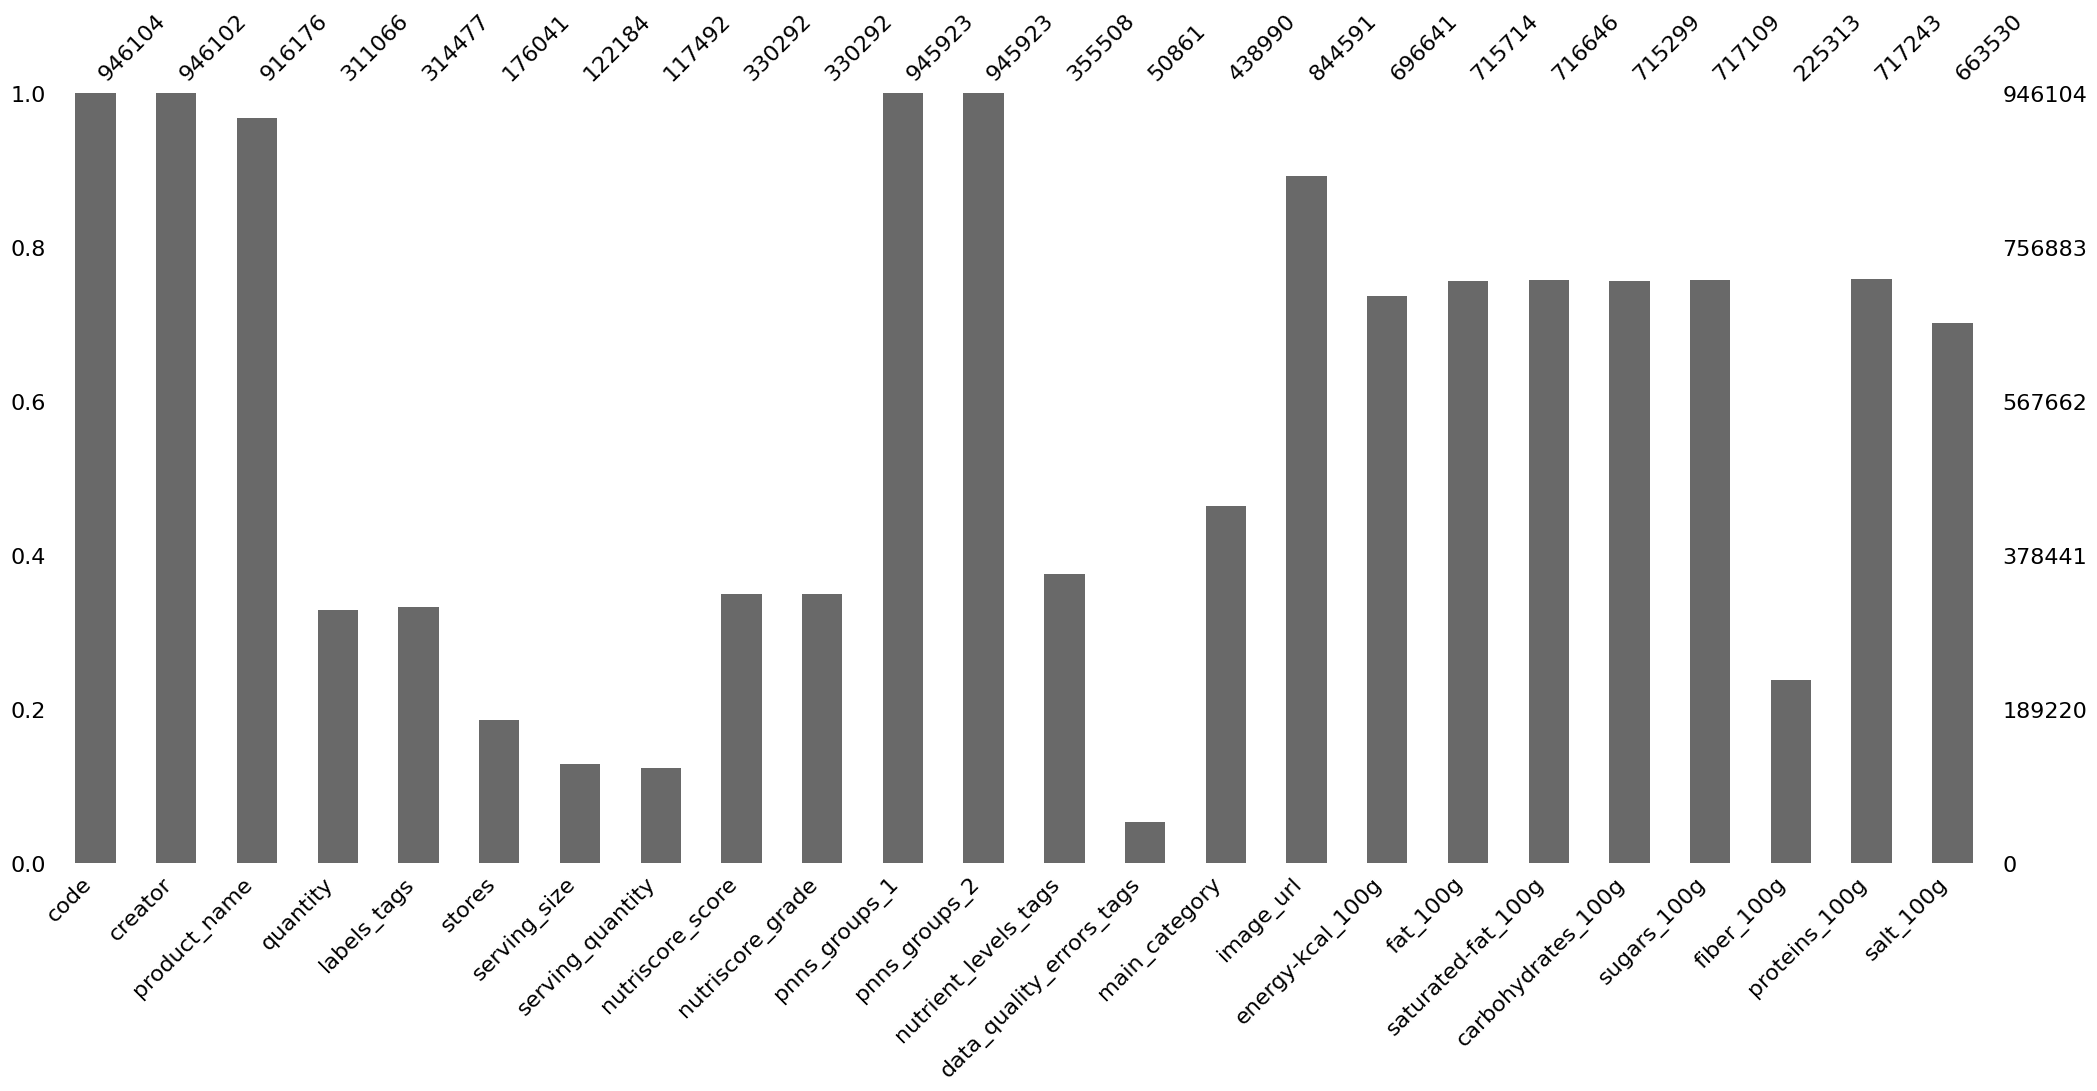

In [90]:
msno.bar(data)

In [91]:
data.dtypes

code                         object
creator                      object
product_name                 object
quantity                     object
labels_tags                  object
stores                       object
serving_size                 object
serving_quantity            float64
nutriscore_score            float64
nutriscore_grade             object
pnns_groups_1                object
pnns_groups_2                object
nutrient_levels_tags         object
data_quality_errors_tags     object
main_category                object
image_url                    object
energy-kcal_100g            float64
fat_100g                    float64
saturated-fat_100g          float64
carbohydrates_100g          float64
sugars_100g                 float64
fiber_100g                  float64
proteins_100g               float64
salt_100g                   float64
dtype: object

To pursue the cleaning process, it has to serve my goals, which is to tell if the sugar quantity is high or not compared to similar products.
I need to work on:
- sugars_100g
- classification (using pnns groups and main_category)

I'm going to work on the 'nutrients' dataframe to try to find inconsistency in values and judge if the product information seem reliable or not. 

What is to be checked :
- any value can not be negative.
- any value can not be greater than 100.
- sugars <= carbohydrates.
- saturated_fat <= fat.
- fat + sugar + fiber + proteins + salt <= 100.


In [92]:
def are_nutrients_inconsistent(vals: pd.Series) -> bool:
    """ Check nutrients consistency :
        - any value can not be strictly negative.
        - any value can not be strictly greater than 100.
        - sugars <= carbohydrates.
        - saturated_fat <= fat.
        - fat + sugar + fiber + proteins + salt <= 100.
        
        Return True if at least one condition is not satisfied,
        False otherwise.  
        
        Due to rounding, we allow the sum to reach 101g.
    """
    return ((vals < 0).any() 
            | (vals > 100).any()
            | (vals.loc['carbohydrates_100g'] < vals.loc['sugars_100g'])
            | (vals.loc['fat_100g'] < vals.loc['saturated-fat_100g'])
            | ((vals.sum() - vals.loc['sugars_100g'] - vals.loc['saturated-fat_100g']) > 101) 
            )

In [93]:
nutrients_f = ['fat_100g',
               'saturated-fat_100g',
               'carbohydrates_100g',
               'sugars_100g',
               'fiber_100g',
               'proteins_100g',
               'salt_100g']

In [94]:
nutrients = data.loc[:, nutrients_f]

In [95]:
nutrients.iloc[0, :]

fat_100g              1.4
saturated-fat_100g    0.9
carbohydrates_100g    9.8
sugars_100g           9.8
fiber_100g            NaN
proteins_100g         2.7
salt_100g             0.1
Name: 0, dtype: float64

In [96]:
are_nutrients_inconsistent(nutrients.iloc[0, :])

False

In [97]:
are_nutrients_inconsistent(nutrients.loc[(nutrients < 0).any(1)].iloc[0, :])

/tmp/ipykernel_3907/1030416818.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  are_nutrients_inconsistent(nutrients.loc[(nutrients < 0).any(1)].iloc[0, :])


True

In [98]:
# Testing on more data
vals = [[5, 5, 5, 5, 5, 5, 5],
        [20, 20, 20, 20, 20, 20, 20],
        [80, 40, 10, 10, 10, 10, 10],
        [10, 15, 0, 0, 0, 0, 0,],
        [10, 10, 15, 20, 0, 0, 0],
        [47.5, 6.5, 13.8, 4.1, 7.7, 26.9, 0.83],
        [4, 4, 4, 4, 124, 4, 4],
        [5, 6, -5, 0, 0, 0, 0]]


test = pd.DataFrame(vals, columns=nutrients_f)
test

fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0       5.0                 5.0                 5.0          5.0         5.0   
1      20.0                20.0                20.0         20.0        20.0   
2      80.0                40.0                10.0         10.0        10.0   
3      10.0                15.0                 0.0          0.0         0.0   
4      10.0                10.0                15.0         20.0         0.0   
5      47.5                 6.5                13.8          4.1         7.7   
6       4.0                 4.0                 4.0          4.0       124.0   
7       5.0                 6.0                -5.0          0.0         0.0   

   proteins_100g  salt_100g  
0            5.0       5.00  
1           20.0      20.00  
2           10.0      10.00  
3            0.0       0.00  
4            0.0       0.00  
5           26.9       0.83  
6            4.0       4.00  
7            0.0       0.00

In [99]:
flag = test.apply(are_nutrients_inconsistent, axis=1)

In [100]:
flag

0    False
1    False
2     True
3     True
4     True
5    False
6     True
7     True
dtype: bool

In [101]:
# # Finding all products in data with nutrients inconsistency
# data.loc[nutrients.apply(are_nutrients_inconsistent, axis=1)]

It tooks 9 min to process all of that. 
I was not expecting that, so I want to try another approach.

In [102]:
nutrients.loc[:, 'fat-sat'] = (nutrients.fat_100g 
                               - nutrients['saturated-fat_100g'])

nutrients.loc[:, 'carbo-sug'] = (nutrients.carbohydrates_100g 
                                 - nutrients.sugars_100g)

nutrients.loc[:, 'sum'] = (nutrients.carbohydrates_100g
                           + nutrients.fat_100g
                           + nutrients.fiber_100g
                           + nutrients.proteins_100g
                           + nutrients.salt_100g)
nutri = nutrients.loc[:, nutrients_f]

mask = ((nutri < 0).any(axis=1)
        |(nutri > 100).any(axis=1)
        |(nutrients['fat-sat'] < 0)
        |(nutrients['carbo-sug'] < 0)
        |(nutrients['sum'] > 101))

In [103]:
feats = ['creator']
feats.extend(nutrients_f)
print(feats)

nutri_prob = data.loc[mask]
nutri_creator = nutri_prob.loc[:, feats]
nutri_prob100 = nutri_prob.loc[:, nutrients_f]
display(nutri_creator.sample(30))

print(nutri_prob.shape[0])

['creator', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']


creator    fat_100g  saturated-fat_100g  \
74467                    foodvisor  500.000000                 NaN   
286081                    sebleouf  100.000000           17.000000   
710196                     kiliweb   46.666667           33.333333   
9071                       kiliweb   16.000000            1.000000   
549179                     kiliweb    0.000000            0.000000   
88544                      kiliweb   37.142857           22.857143   
920334                     kiliweb   25.000000            4.900000   
663634                     kiliweb    0.000000            0.000000   
530304                     kiliweb    1.100000            0.100000   
76889                      kiliweb   20.000000            7.500000   
74912                      kiliweb    0.000000            0.000000   
178554                     kiliweb   60.700000            4.500000   
807019          openfood-ch-import   26.700000           11.700000   
377915                     kiliweb   27.000000            3.100000   
89329                      kiliweb   53.125000            4.687500   
703665                         smn   25.000000           36.000000   
509751                     kiliweb   52.000000            3.900000   
867644                     kiliweb   46.666667           26.666667   
703268                   foodvisor    2.000000            8.000000   
458977                     kiliweb   30.000000           16.666667   
851520                    jpweibel   14.100000            2.300000   
336638  openfoodfacts-contributors   61.000000            5.000000   
6838                       kiliweb   23.076923           17.948718   
345948                     kiliweb   32.000000           28.000000   
735889                     kiliweb    0.000000            0.000000   
940965                     kiliweb    4.222222            0.666667   
509763             date-limite-app   72.000000            6.200000   
761332                     kiliweb   28.100000            0.000000   
718068                     kiliweb    3.800000            0.800000   
855230                     kiliweb   13.000000            1.700000   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
74467          1700.000000   900.000000         NaN     100.000000        NaN  
286081            0.500000     0.500000    0.500000       0.500000   0.010000  
710196           30.000000     6.666667   10.000000      16.666667   0.750000  
9071             72.000000    26.000000    6.000000       8.000000   1.050000  
549179            0.000000     0.200000    0.000000       0.100000   0.000000  
88544            54.285714    40.000000    8.571429       5.714286   0.021429  
920334           57.000000     3.800000   12.000000      18.000000   0.080000  
663634            0.000000     0.300000    0.000000       0.100000   0.000000  
530304           56.000000    51.000000   11.000000       5.100000  40.000000  
76889            65.000000    15.000000    5.000000      10.000000   1.187500  
74912           100.000000    50.000000    0.000000       0.000000   2.812500  
178554           16.700000     4.300000    9.700000      14.900000   0.000000  
807019           96.700000    58.300000   11.300000       8.670000   0.967000  
377915           57.000000    14.000000    1.700000      81.000000   0.000000  
89329            21.875000     6.250000    9.375000      21.875000   0.000000  
703665           74.000000    49.000000         NaN      19.000000  30.000000  
509751           19.000000     4.600000    9.900000      21.000000   0.050000  
867644           46.666667    23.333333   10.000000      10.000000   0.833333  
703268            1.000000     6.000000         NaN            NaN        NaN  
458977           63.333333    56.666667    3.333333       6.666667   0.125000  
851520           74.200000     1.700000    5.000000      11.700000   2.500000  
336638            8.900000     4.000000    7.600000      24.000000   0.010000  
6838            

6751


In [104]:
# This approach was very much faster (around 1 sec).

# I notice that some values are not 'rounded' and does not come
# from image detection. It is probably some indicators calculated.
# Let's try to identify those products.

# Finding rows with not well rounded values (more than 3 digits in the
# decimal part) for all values.
mask = (np.modf(nutri_prob100 * 1000)[0]
        .replace(np.NaN,value=0.0) != 0).all(axis=1)

long_vals = nutri_creator.loc[mask]
long_vals.head(10)

creator   fat_100g  saturated-fat_100g  \
1416                     kiliweb  41.935484           29.032258   
1434                     kiliweb  14.754098            8.196721   
1442                     kiliweb  13.636364           10.227273   
1683                     kiliweb  39.285714           17.857143   
1965                     kiliweb  15.384615            1.923077   
3083             usda-ndb-import  46.428571            5.357143   
3099  openfoodfacts-contributors  46.428571            5.357143   
3837                     kiliweb  48.148148           12.962963   
3894                     kiliweb  12.068966            3.448276   
3927                     kiliweb   4.838710            3.225806   

      carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
1416           19.354839     6.451613    9.677419      32.258065   0.806452  
1434           40.983607     8.196721   19.672131      32.786885   0.553279  
1442           38.636364    11.363636   15.909091      34.090909   1.363636  
1683           53.571429    46.428571    3.571429       7.142857   0.491071  
1965           69.230769    38.461538   15.384615       7.692308   1.201923  
3083           28.571429     7.142857   10.714286      21.428571   0.580357  
3099           28.571429     7.142857   10.714286      21.428571   1.205357  
3837           37.037037    18.518519    7.407407      14.814815   0.648148  
3894           75.862069    27.586207    6.896552       6.896552   0.991379  
3927           48.387097    25.806452   12.903226      35.483871   1.008065

In [105]:
long_vals.creator.value_counts()

kiliweb                       204
openfoodfacts-contributors     18
org-database-usda               7
foodvisor                       6
usda-ndb-import                 4
yskyflyer                       1
tacinte                         1
lpmat                           1
thomasghenry                    1
inf                             1
Name: creator, dtype: int64

In [106]:
a = data.loc[long_vals.index, ['product_name','main_category','pnns_groups_2']]
a

product_name main_category  \
1416                        Proti keto bar salted caramel           NaN   
1434                                Lemonade protein bars           NaN   
1442    Weight Loss Remix Toffee Pretzel Peanut Protei...           NaN   
1683                   Milk chocolate almond toffe crunch           NaN   
1965                           Slimfast original choclate           NaN   
...                                                   ...           ...   
940926                                    Fruit Pastilles           NaN   
941784                                         ToffeePops           NaN   
942790                              Soft and chewy cookie           NaN   
945258                                               deez           NaN   
945829                Organic Raisin Bran Clusters Cereal           NaN   

       pnns_groups_2  
1416         unknown  
1434         unknown  
1442         unknown  
1683         unknown  
1965         unknown  
...              ...  
940926       unknown  
941784       unknown  
942790       unknown  
945258       unknown  
945829       unknown  

[244 rows x 3 columns]

<AxesSubplot: >

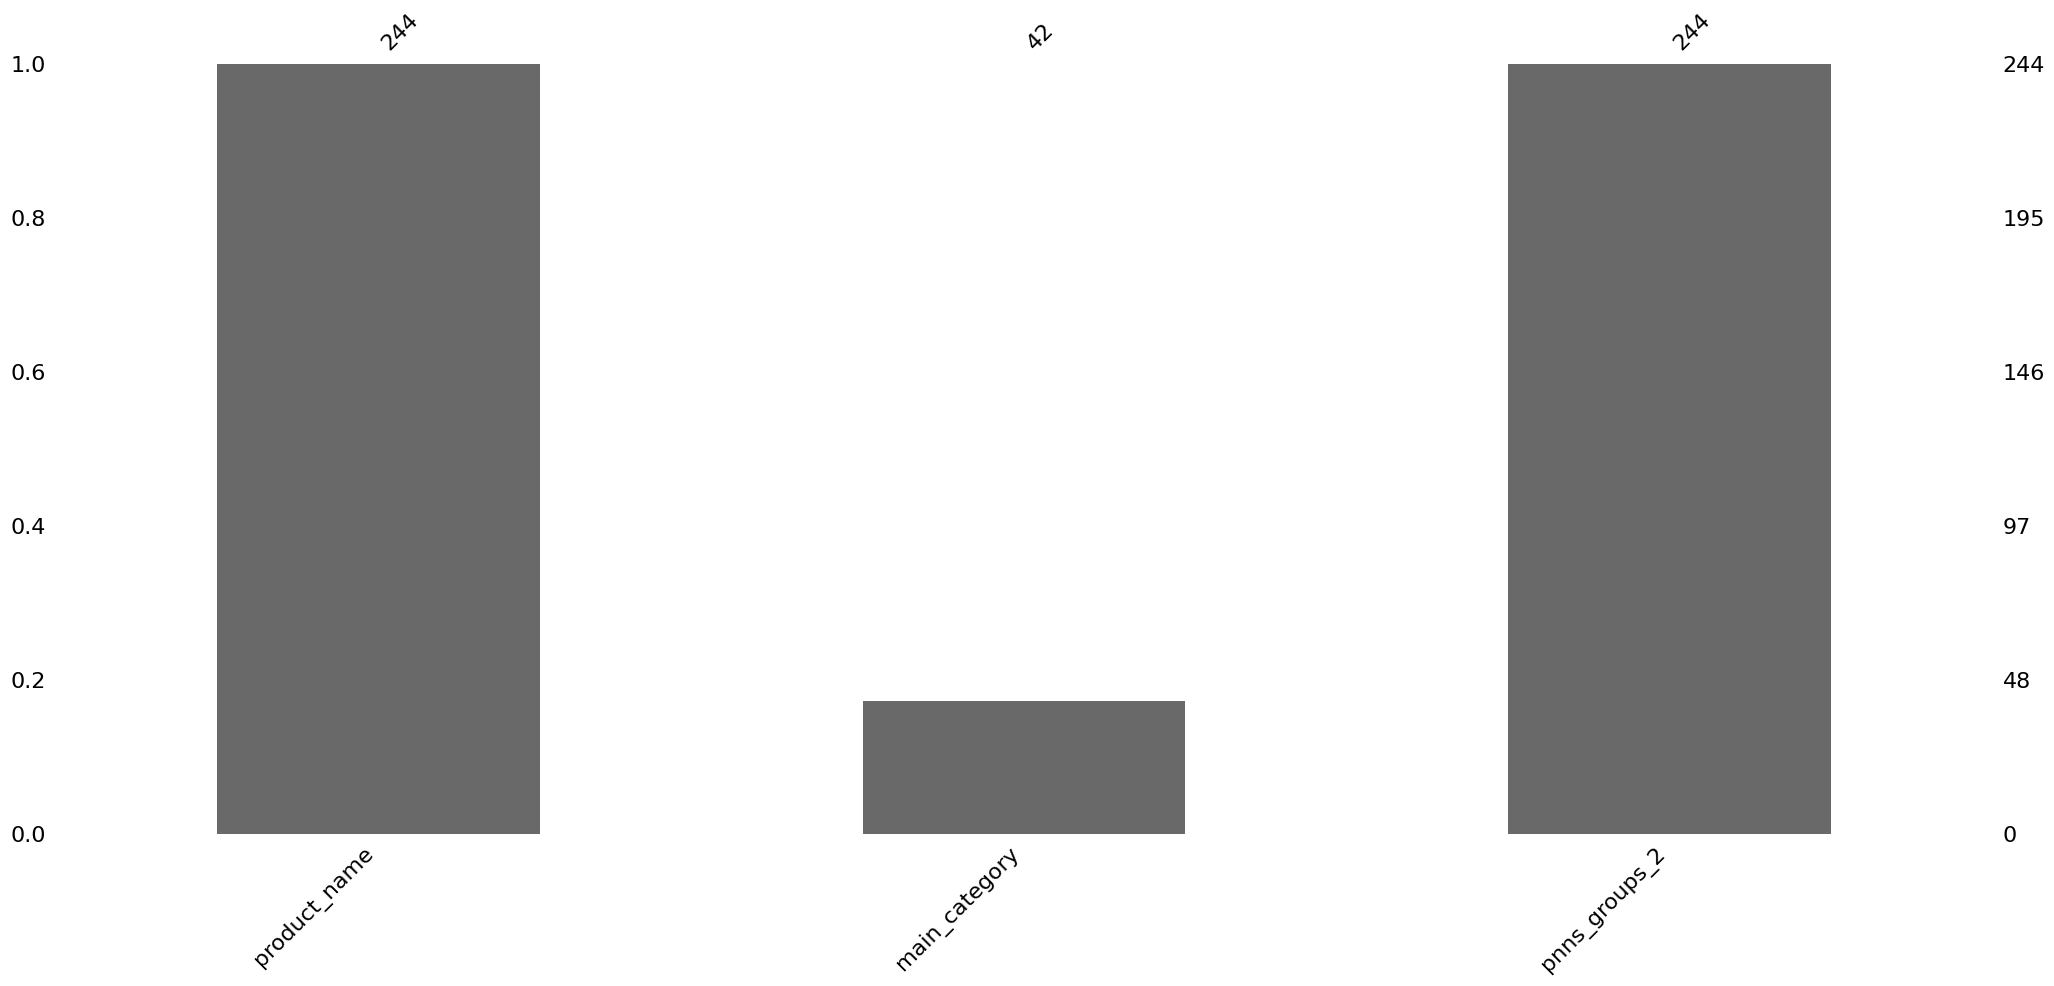

In [107]:
msno.bar(a)

In [108]:
a.pnns_groups_2.value_counts()

unknown                216
Biscuits and cakes       9
Breakfast cereals        5
Cereals                  5
Sweets                   3
Fats                     3
Bread                    1
Legumes                  1
Sweetened beverages      1
Name: pnns_groups_2, dtype: int64

In [109]:
a.main_category.value_counts()

en:snacks                                                                                                                                                                                       6
en:cereals-and-their-products                                                                                                                                                                   5
en:biscuits                                                                                                                                                                                     5
en:breakfast-cereals                                                                                                                                                                            4
en:oatmeal-cookies                                                                                                                                                                              2
en:dehydrated-beverages       

In [110]:
nutri_prob.pnns_groups_2.value_counts().head(15)

unknown                 4480
Biscuits and cakes       341
Cereals                  264
Sweets                   262
Appetizers               147
Fats                     134
Chocolate products       128
Nuts                     127
Breakfast cereals         98
Legumes                   88
Dried fruits              80
Vegetables                68
Dressings and sauces      63
One-dish meals            60
Bread                     59
Name: pnns_groups_2, dtype: int64

In [111]:
nutri_prob.pnns_groups_1.value_counts().head(15)

unknown                    4480
Sugary snacks               739
Cereals and potatoes        512
Salty snacks                291
Fat and sauces              197
Fruits and vegetables       168
Fish Meat Eggs              104
Beverages                   103
Composite foods              73
Milk and dairy products      70
Alcoholic beverages          14
Name: pnns_groups_1, dtype: int64

In [112]:
nutri_prob.main_category.value_counts().head(15)

en:snacks                        262
en:biscuits                      118
en:cereals-and-their-products    106
en:groceries                      97
en:teas                           61
en:breakfast-cereals              58
en:dark-chocolates                53
en:chocolate-candies              45
en:confectioneries                43
en:vegetable-fats                 39
en:crackers                       39
en:peanut-butters                 38
en:beverages                      38
en:biscuits-and-cakes             29
en:extra-virgin-olive-oils        22
Name: main_category, dtype: int64

<AxesSubplot: >

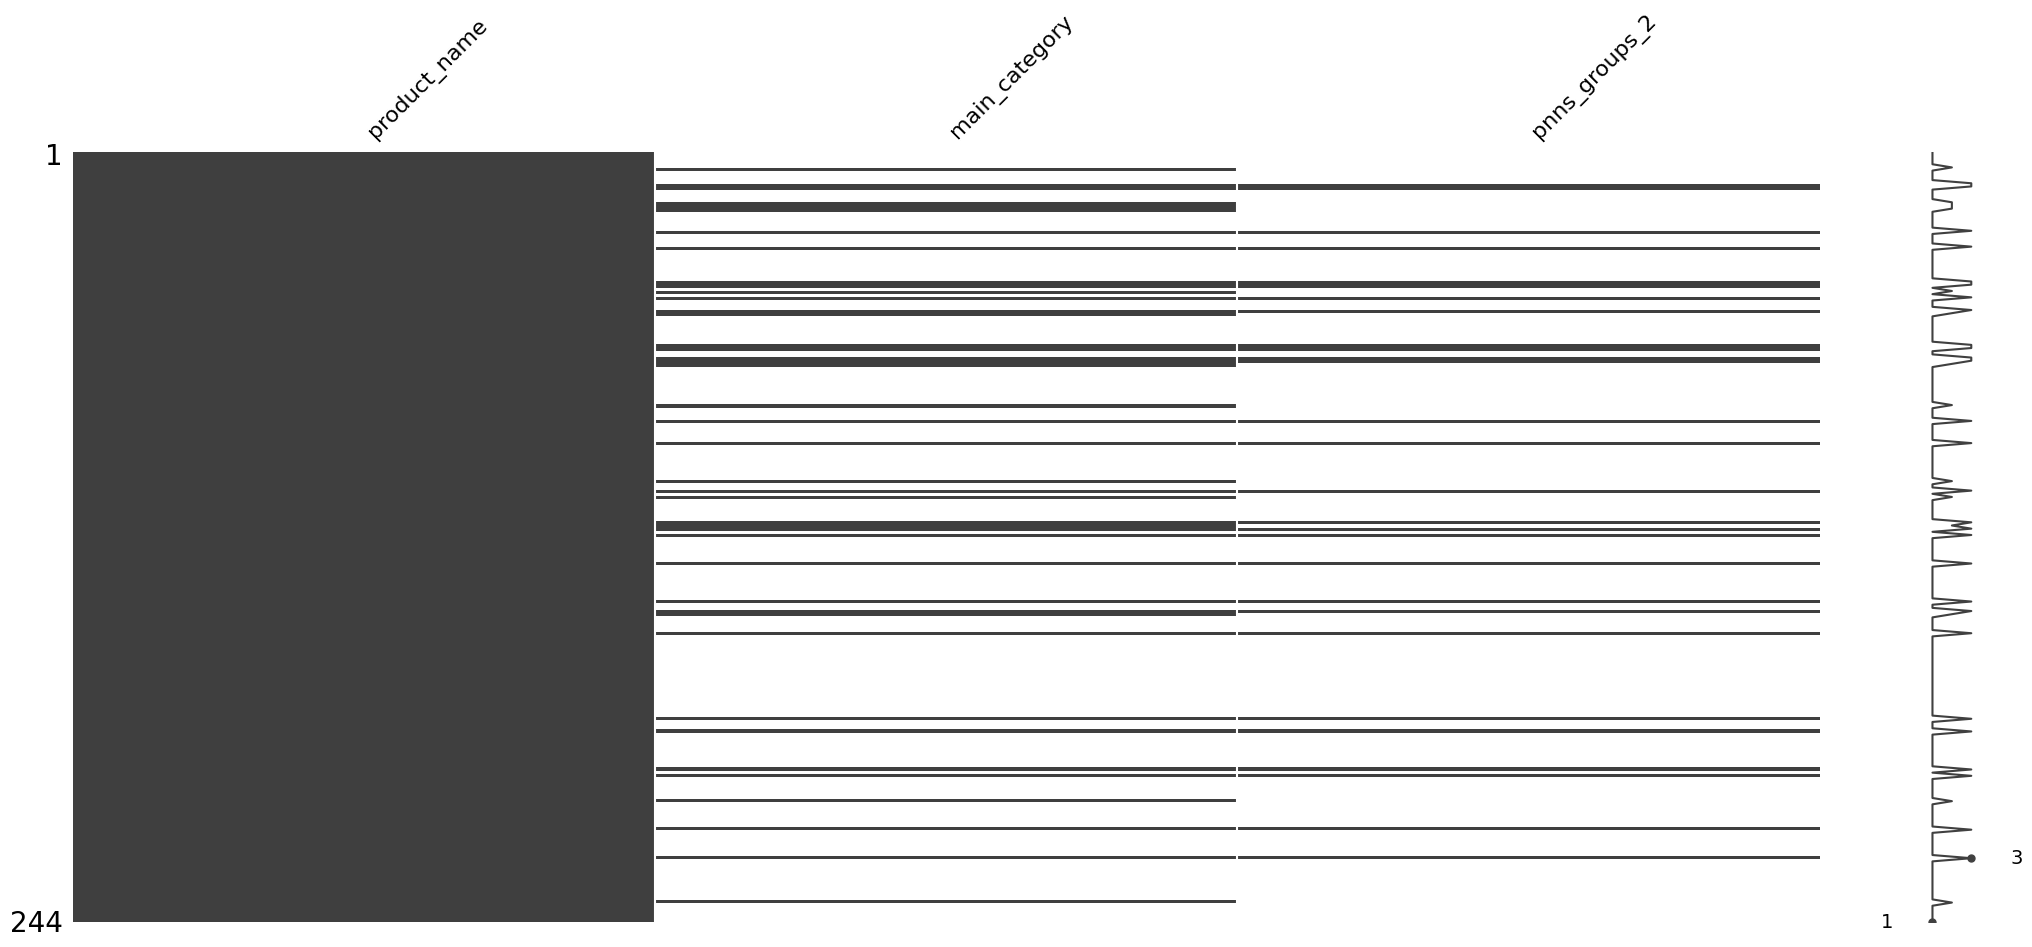

In [113]:
a.pnns_groups_2.replace('unknown', value=np.nan, inplace=True)
msno.matrix(a)

<AxesSubplot: >

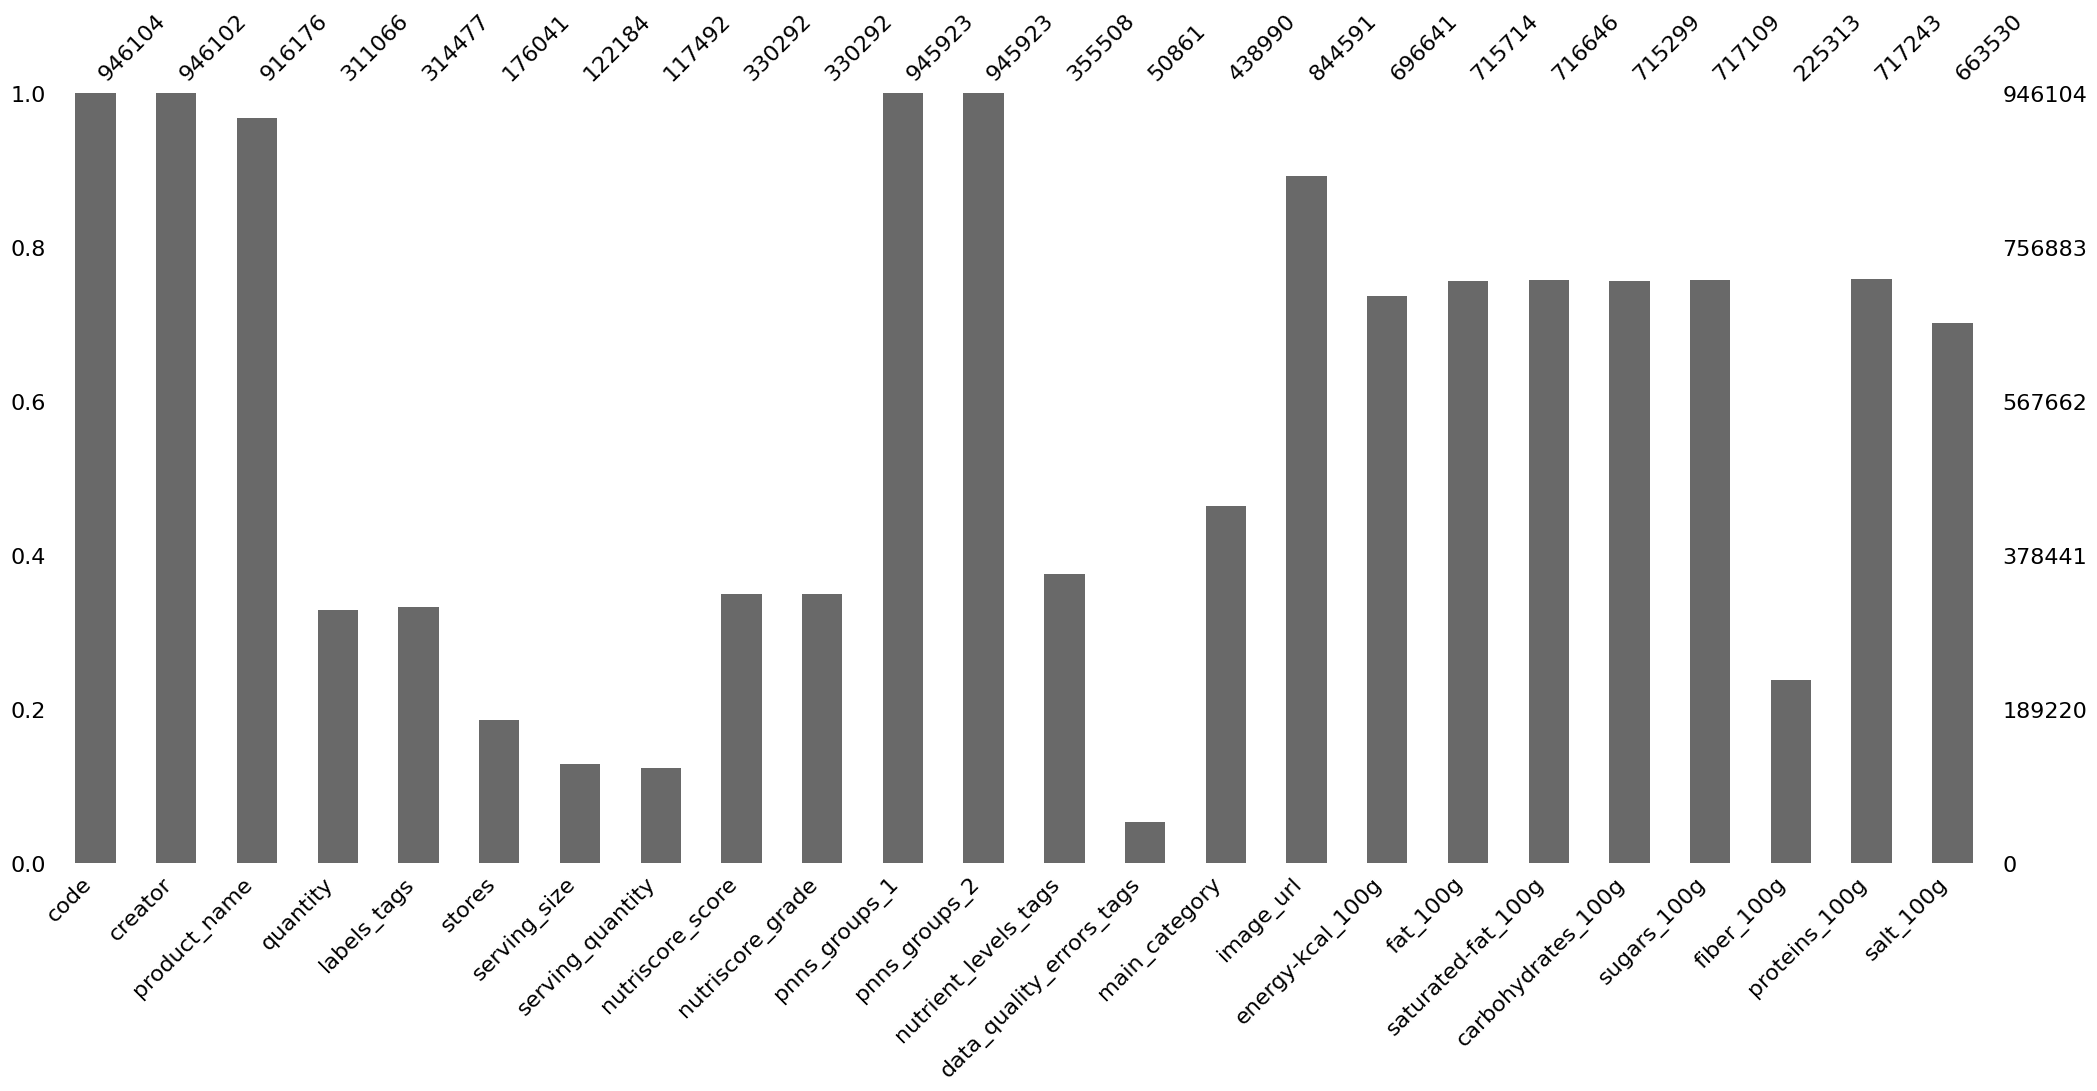

In [114]:
# Apparently, there is a tiny bit more info in main_category when there
# is the problem of not rounded values in nutrients.

# Working on pnns_groups
msno.bar(data)

In [115]:
pnns_f = ['pnns_groups_1', 'pnns_groups_2']

pnns_groups_1         pnns_groups_2
0                  unknown               unknown
1  Milk and dairy products        Dairy desserts
2                  unknown               unknown
3                  unknown               unknown
4           Fat and sauces  Dressings and sauces

pnns_groups_1         pnns_groups_2
0                     <NA>                  <NA>
1  Milk and dairy products        Dairy desserts
2                     <NA>                  <NA>
3                     <NA>                  <NA>
4           Fat and sauces  Dressings and sauces

<AxesSubplot: >

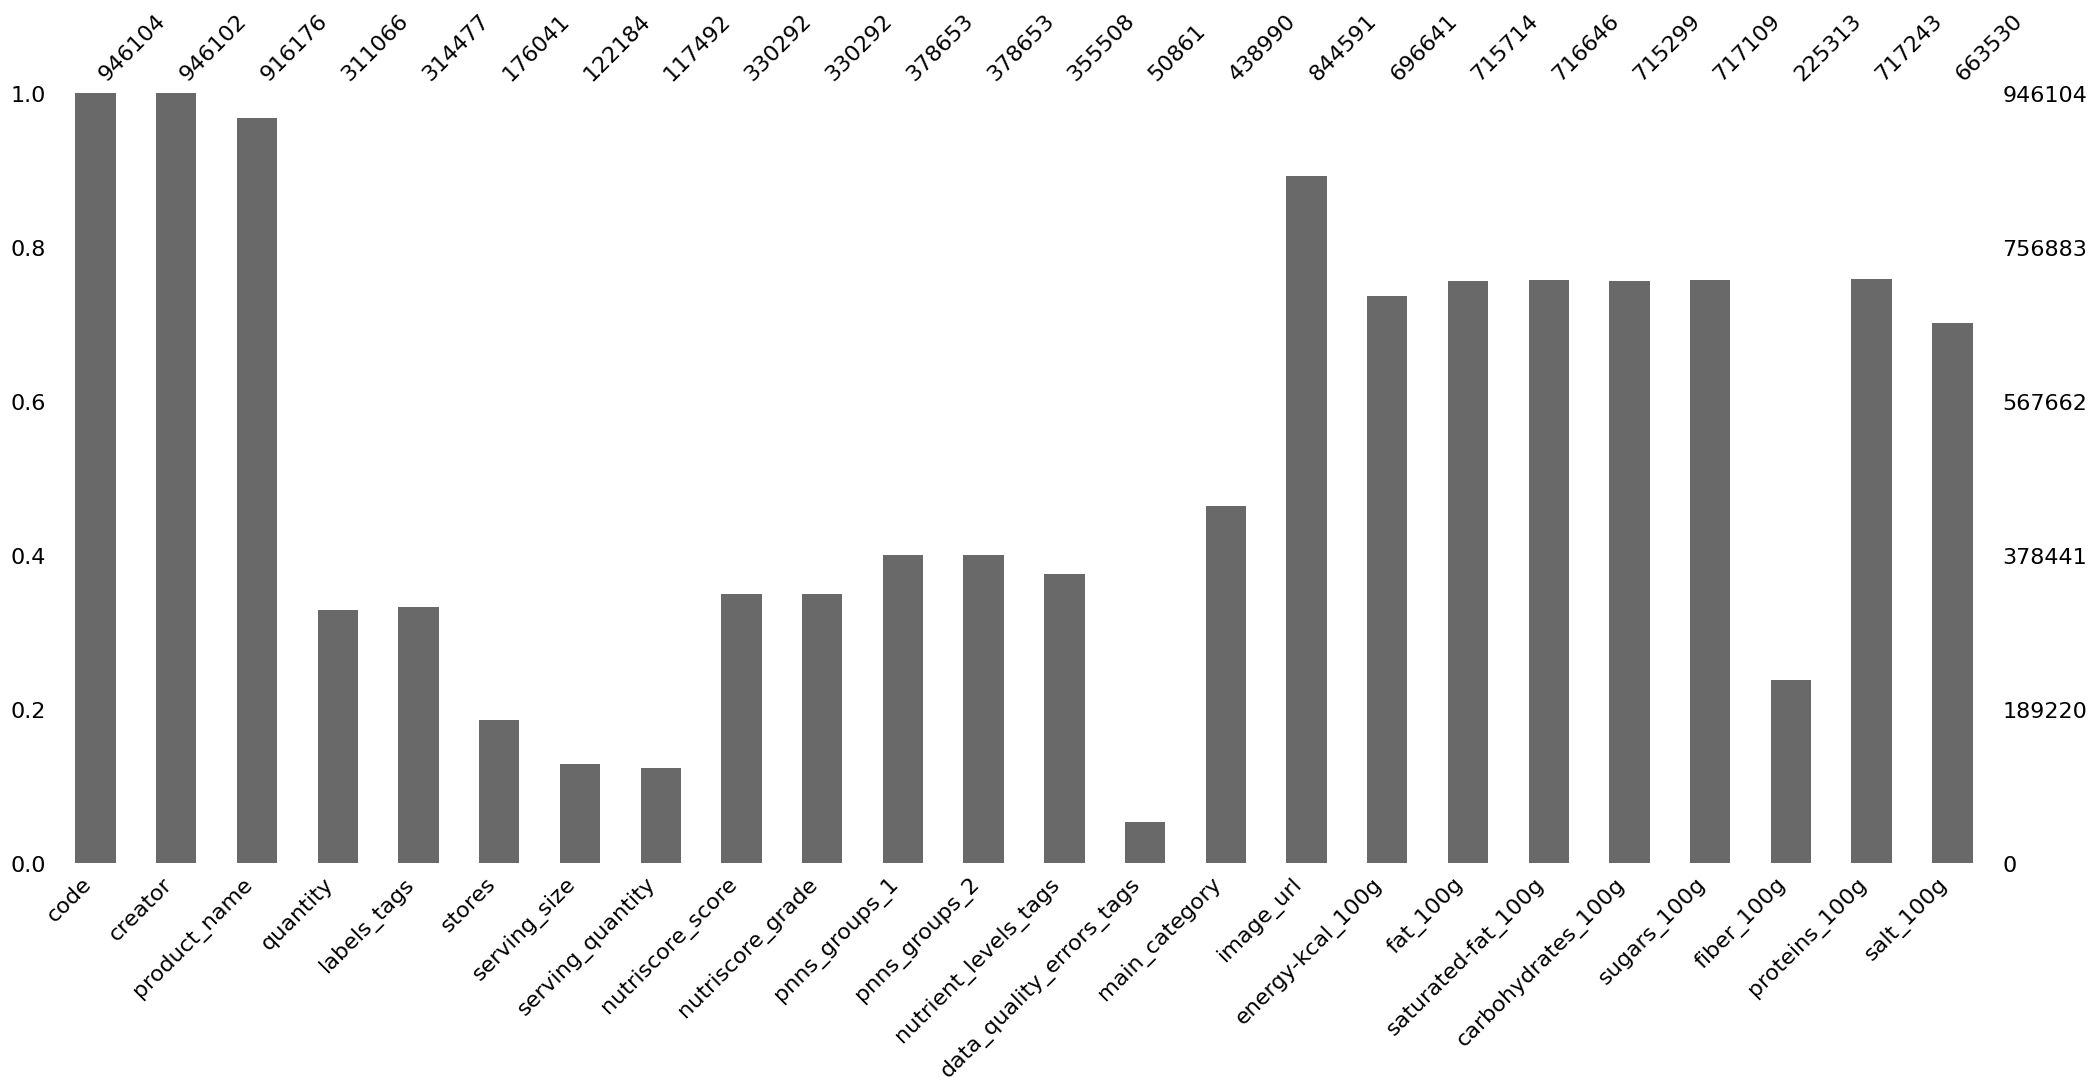

In [116]:
pnns = data.loc[:, pnns_f]
display(pnns.head())
pnns.replace('unknown', value=pd.NA, inplace=True)
display(pnns.head())
data.loc[:, pnns_f] = pnns
msno.bar(data)

At that point, I can not try to rectify the nutrients of a product if I have no clue of the group it belongs to.

I am seeing that pnns_groups are finally provided for ~ 40 % of products. And main_category not much more.

I want to tag products with at least one classification feature, so to say, pnns groups or main_category.

I want to tag products with sugars_100g info.

And then, I will try to address the nutrients problems on those products having both tags.

In [117]:
classification_f = pnns_f
classification_f.append('main_category')
print(classification_f)

classification = data.loc[:, classification_f]
for feat in classification_f:
    print(classification[feat].notnull().mean())
    display(classification[feat].value_counts().head(30))

['pnns_groups_1', 'pnns_groups_2', 'main_category']
0.4002234426659226


Sugary snacks              78643
Fish Meat Eggs             65595
Milk and dairy products    44196
Cereals and potatoes       35679
Composite foods            31404
Fruits and vegetables      30458
Beverages                  29210
Fat and sauces             27922
Salty snacks               22863
Alcoholic beverages        12682
sugary-snacks                  1
Name: pnns_groups_1, dtype: int64

0.4002234426659226


Sweets                              35462
Biscuits and cakes                  28685
Processed meat                      24678
One-dish meals                      24297
Meat                                23005
Cheese                              22311
Dressings and sauces                18708
Cereals                             16608
Fish and seafood                    14563
Vegetables                          14431
Alcoholic beverages                 12682
Milk and yogurt                     11221
Salty and fatty products            11093
Sweetened beverages                  9674
Chocolate products                   9463
Fruits                               9450
Fats                                 9214
Bread                                8161
Appetizers                           7259
Fruit juices                         6506
Dairy desserts                       5988
Breakfast cereals                    5118
Unsweetened beverages                5063
Pastries                          

0.4639976154841328


en:groceries                  20987
en:sweetened-beverages         4741
en:beverages                   4130
en:chicken-breasts             4067
en:biscuits                    3399
en:white-hams                  3048
en:extra-virgin-olive-oils     2624
en:candies                     2503
en:dark-chocolates             2417
en:unsweetened-beverages       2317
en:salads                      2032
en:labeled-cheeses             1956
en:teas                        1882
en:honeys                      1846
en:cheeses                     1777
en:turkey-cutlets              1634
en:confectioneries             1497
en:chicken-thighs              1425
en:breads                      1369
en:smoked-salmons              1327
en:protein-powders             1293
en:strawberry-jams             1255
fr:saucissons-secs             1238
en:milk-chocolates             1225
en:crackers                    1198
en:raw-cured-ham               1173
en:yogurts                     1146
en:snacks                   

In [118]:
# Creating the tag for classifier.
data.loc[:, 'classifier_available'] = (classification
                                       .notnull()
                                       .any(axis=1))

# Creating the tag for sugars_100 info.
data.loc[:, 'sugars_available'] = data.sugars_100g.notnull()

# I discard products without at least one of this information.
mask = data.classifier_available | data.sugars_available
data = data.loc[mask]
data.shape

(796533, 26)

<AxesSubplot: >

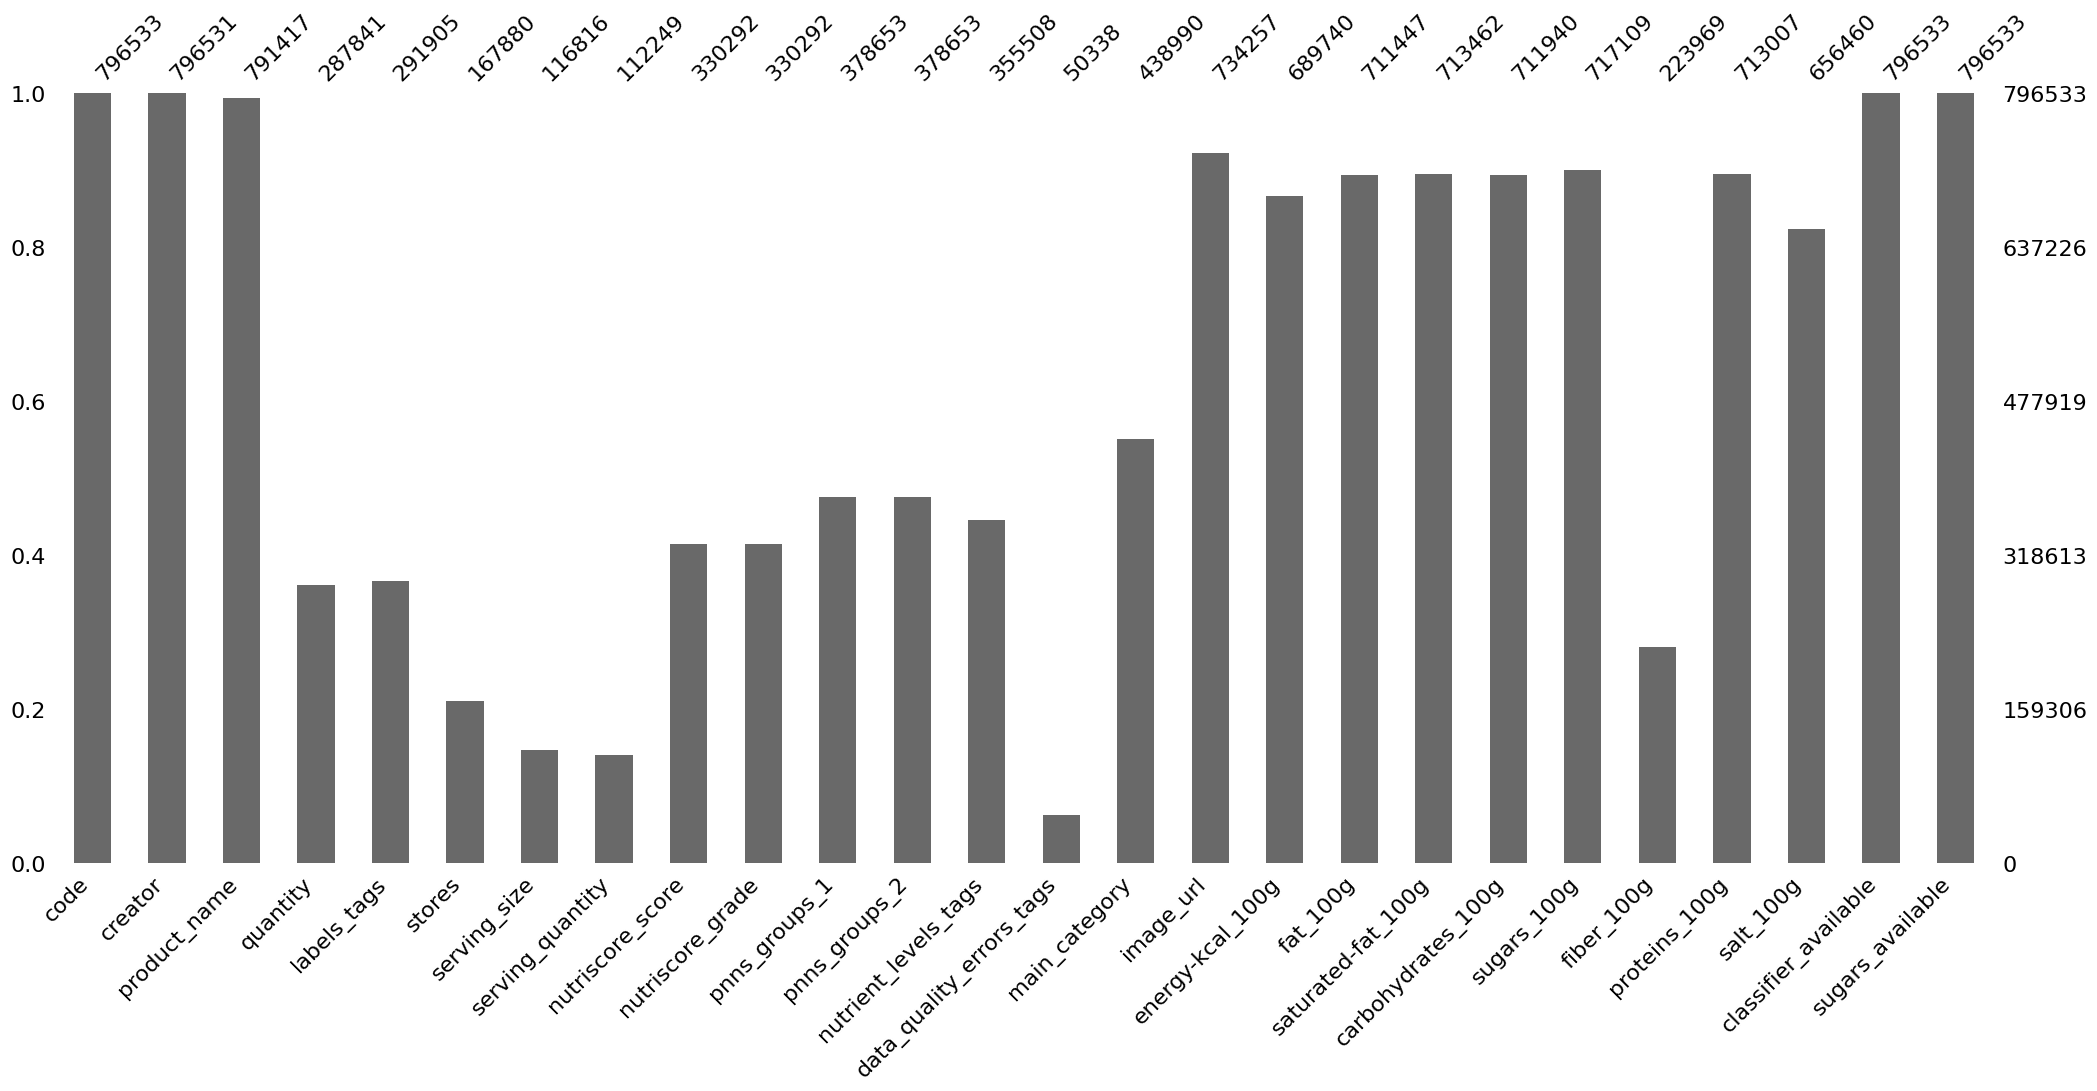

In [119]:
msno.bar(data)

For all those 796_533 products, I should be able to estimate the sugars when missing, based on the sugars group distribution.

I shall remember that I did not adress nutrients problem at that point. 
Before that, I want to tag products with initial nutrients problem

In [120]:
nutrients_f

['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g']

In [121]:
# Creating tags for nutrients problems.
sat_fat = 'more_saturated_fat_than_fat'
sug_carbo = 'more_sugars_than_carbohydrates'
nutsum_101 = 'nutrients_sum_over_101'
neg = 'negative_value'
over100 = 'value_over_100'
nutprob = 'initial_nutrients_problem' # At least one of the above problems.

data.loc[:, sat_fat] = (data.fat_100g 
                        - data['saturated-fat_100g']) < 0

data.loc[:, sug_carbo ] = (data.carbohydrates_100g 
                           - data.sugars_100g) < 0

data.loc[:, nutsum_101] = (data.carbohydrates_100g
                           + data.fat_100g
                           + data.fiber_100g
                           + data.proteins_100g
                           + data.salt_100g) >= 101

data.loc[:, neg] = (data.loc[:, nutrients_f] < 0).any(axis=1)

data.loc[:, over100] = (data.loc[:, nutrients_f] > 100).any(axis=1)

data.loc[:, nutprob] = data.loc[:, sat_fat:over100].any(axis=1)

# And creating one last tag, which will show that sugars value
# was assessed at some point.
data.loc[:, 'sugars_assessed'] = False

In [136]:
data.loc[:, sat_fat:].sample(20)

more_saturated_fat_than_fat  more_sugars_than_carbohydrates  \
792016                        False                           False   
308520                        False                           False   
906200                        False                           False   
803743                        False                           False   
339515                        False                           False   
462427                        False                           False   
896050                        False                           False   
841467                        False                           False   
837021                        False                           False   
492010                        False                           False   
288115                        False                           False   
899435                        False                           False   
331852                        False                           False   
456700                        False                           False   
443918                        False                           False   
577945                        False                           False   
740573                        False                           False   
724654                        False                           False   
246977                        False                           False   
744479                        False                           False   

        nutrients_sum_over_101  negative_value  value_over_100  \
792016                   False           False           False   
308520                   False           False           False   
906200                   False           False           False   
803743                    True           False           False   
339515                   False           False           False   
462427                   False           False           False   
896050                   False           False           False   
841467                   False           False           False   
837021                   False           False           False   
492010                   False           False           False   
288115                   False           False           False   
899435                   False           False           False   
331852                   False           False           False   
456700                   False           False           False   
443918                   False           False           False   
577945                   False           False           False   
740573                   False           False           False   
724654                   False           False           False   
246977                   False           False           False   
744479                   False           False           False   

        initial_nutrients_problem  sugars_assessed  
792016                      False            False  
308520                      False            False  
906200                      False            False  
803743                       True            False  
339515                      False            False  
462427                      False            False  
896050                      False            False  
841467                      False            False  
837021                      False            False  
492010                      False            False  
288115                      False            False  
899435                      False            False  
331852                      False            False  
456700                      False            False  
443918                      False            False  
577945                      False            False  
740573                      False            False  
724654                      False            False  
246977                      False            False  
744479                      False            False

In [123]:
data.to_csv('./csv_files/fr_data_no_dup_tagged.csv.gz',
            index=False,
            sep='\t',
            compression='gzip')

### Some stats in the remaining data

In [124]:
print(data.shape[0])
print(f"nutrients_pbs : {data.initial_nutrients_problem.sum()}")
print(f"{nutsum_101} : {data.nutrients_sum_over_101.sum()}")
print(f"{neg} : {data.negative_value.sum()}")
print(f"{over100} : {data.value_over_100.sum()}")
print(f"{sat_fat} : {data.more_saturated_fat_than_fat.sum()}")
print(f"{sug_carbo} : {data.more_sugars_than_carbohydrates.sum()}")
pct = data.initial_nutrients_problem.sum() * 100 / data.shape[0]
print(f"percentage of suspected products : {pct}")

796533
nutrients_pbs : 6692
nutrients_sum_over_101 : 5060
negative_value : 3
value_over_100 : 308
more_saturated_fat_than_fat : 438
more_sugars_than_carbohydrates : 1073
percentage of suspected products : 0.8401409608892538


So it is not too bad, less than 1% of the dataset seems to be illogical.
I could ignore it, or I can group by type of products and try to give it a nice assessment.

In [143]:
print(data.main_category.value_counts().shape)
print((data.main_category.value_counts() < 20).sum())
print(data.pnns_groups_1.value_counts().shape)
print(data.pnns_groups_2.value_counts().shape)

(22241,)
19553
(11,)
(39,)


I see that many of the categories in main_categories do not have a lot of products inside, so it would be much better to assess a value based on pnns2 when the size of category in main category is too little.

In [126]:
data.pnns_groups_2.value_counts()

Sweets                              35462
Biscuits and cakes                  28685
Processed meat                      24678
One-dish meals                      24297
Meat                                23005
Cheese                              22311
Dressings and sauces                18708
Cereals                             16608
Fish and seafood                    14563
Vegetables                          14431
Alcoholic beverages                 12682
Milk and yogurt                     11221
Salty and fatty products            11093
Sweetened beverages                  9674
Chocolate products                   9463
Fruits                               9450
Fats                                 9214
Bread                                8161
Appetizers                           7259
Fruit juices                         6506
Dairy desserts                       5988
Breakfast cereals                    5118
Unsweetened beverages                5063
Pastries                          

pnns_groups_2 give nice groups to make stats on and assess missing values of sugars. We just have to regroup pastries to be ready for that.

In [127]:
data.loc[data.pnns_groups_2 == 'pastries', 'pnns_groups_2'] = 'Pastries'

### Assessment of sugars values when a classifier is available.

In [128]:
no_sug = data.loc[(~data.sugars_available), classification_f]
no_sug

pnns_groups_1        pnns_groups_2  \
13                Sugary snacks               Sweets   
35               Fish Meat Eggs                 Meat   
42                Sugary snacks               Sweets   
61                    Beverages  Sweetened beverages   
75      Milk and dairy products               Cheese   
...                         ...                  ...   
946089                     <NA>                 <NA>   
946093  Milk and dairy products               Cheese   
946095           Fish Meat Eggs       Processed meat   
946099            Sugary snacks               Sweets   
946101      Alcoholic beverages  Alcoholic beverages   

                    main_category  
13                en:almond-paste  
35      fr:aiguillettes-de-poulet  
42                   en:milk-jams  
61             en:apricot-nectars  
75                     en:cheeses  
...                           ...  
946089              en:toothpaste  
946093            en:goat-cheeses  
946095           en:pate-in-crust  
946099        en:honey-of-corsica  
946101                   en:vodka  

[79424 rows x 3 columns]

<AxesSubplot: >

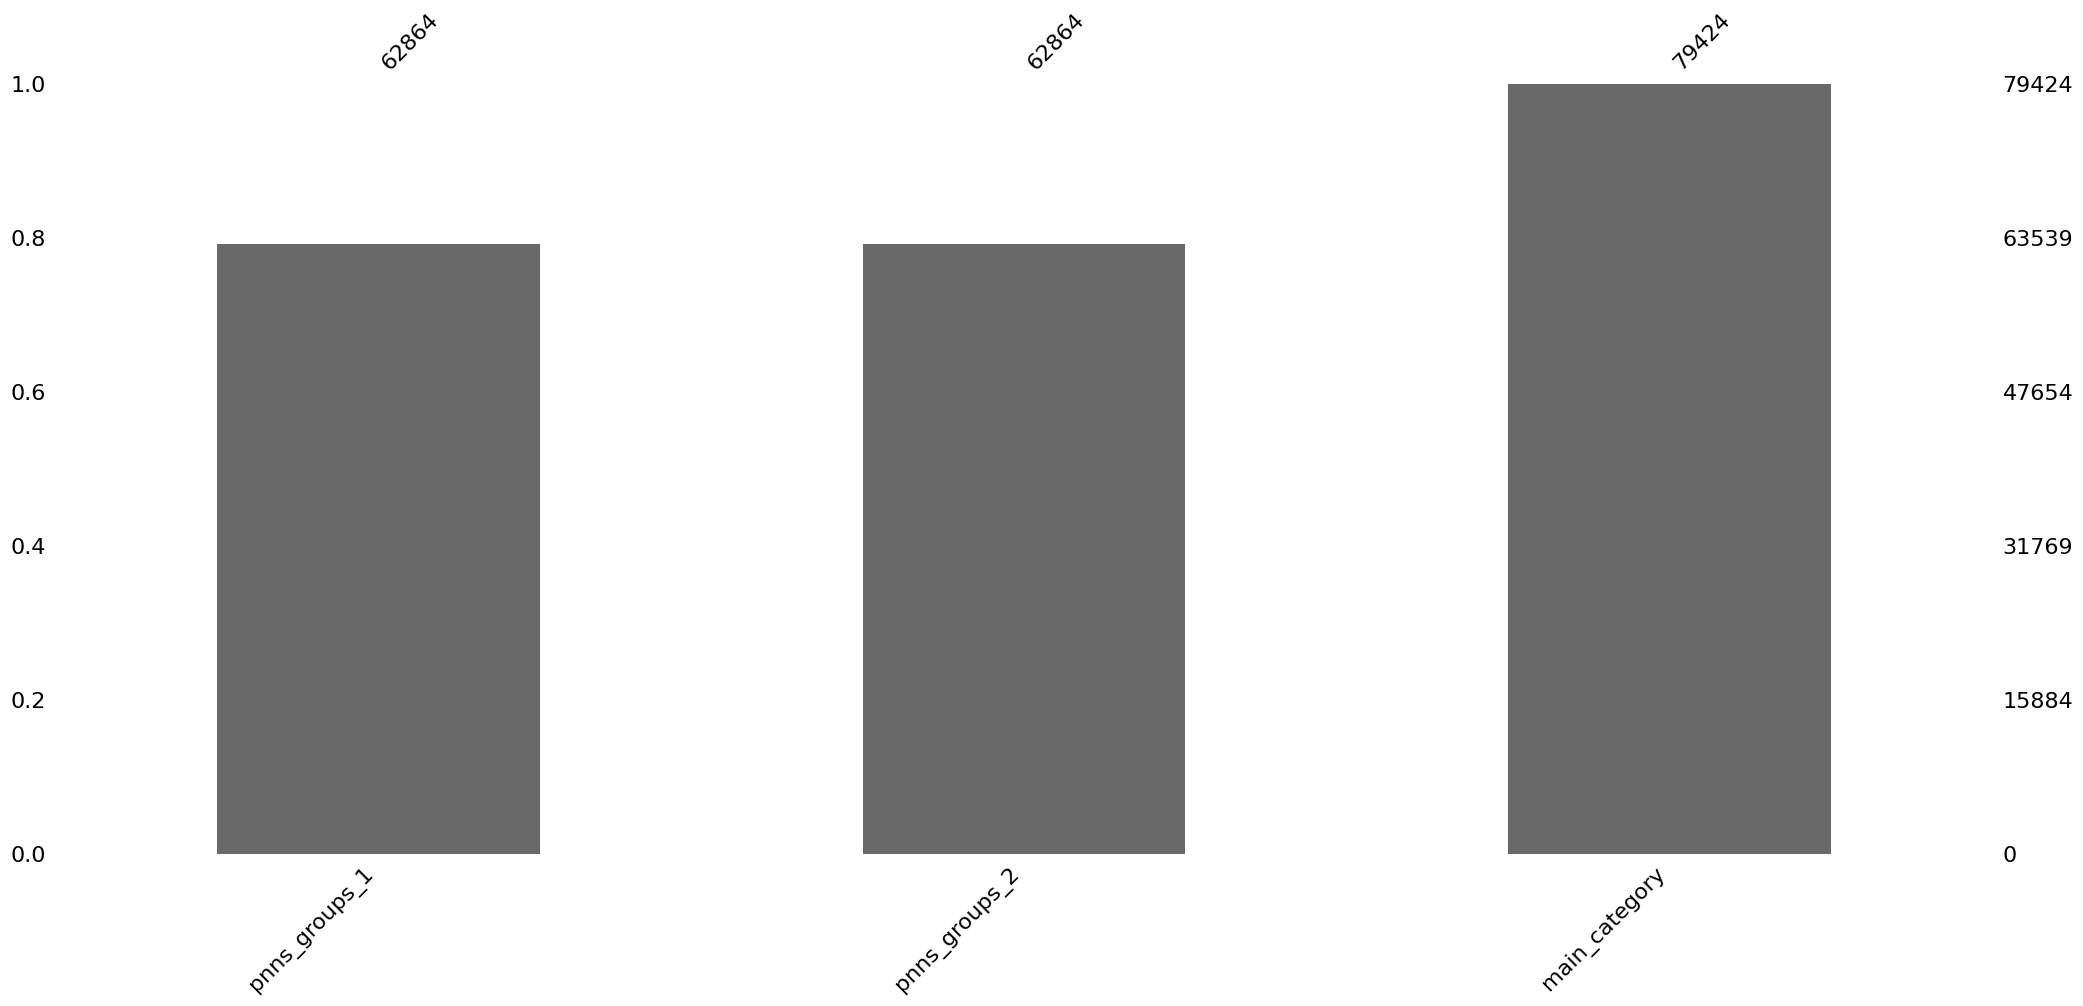

In [129]:
msno.bar(no_sug)

In [144]:
no_sug.notnull().mean()

pnns_groups_1    0.791499
pnns_groups_2    0.791499
main_category    1.000000
dtype: float64

We always have a category. 

To assess the sugars value per 100 g, I am going to look at the category size. If it is > to 20; I will use the median of sugars_100g in the category to assess the product quantity. Else, and if we know it, I will use the median of pnns_group_2.

If it does not meet these conditions, the product will remain unchanged. 

In [184]:
grouped_by_pnns_groups_2 = (data
                 .groupby('pnns_groups_2')['sugars_100g']
                 .agg([len, np.median, np.std]))


grouped_by_pnns_groups_2.rename(columns={'len': 'pnns_groups_2_cardinal',
                              'median': 'sugars_100g_median'},
                     inplace=True)

grouped_by_pnns_groups_2.sort_values('sugars_100g_median',
                          ascending=False,
                          inplace=True)

grouped_by_pnns_groups_2.head(20)

pnns_groups_2_cardinal  sugars_100g_median  \
pnns_groups_2                                                                  
Sweets                                             35462             53.0000   
Dried fruits                                        4398             46.0000   
Chocolate products                                  9463             44.0000   
Biscuits and cakes                                 28685             29.0000   
Ice cream                                           4676             24.0000   
Breakfast cereals                                   5118             17.0000   
Pastries                                            5034             15.0000   
Fruits                                              9450             13.0000   
Dairy desserts                                      5988             12.4000   
Fruit nectars                                        946             11.0000   
Sweetened beverages                                 9674             10.2000   
Fruit juices                                        6506             10.0000   
Milk and yogurt                                    11221              6.6667   
Nuts                                                4511              5.0000   
Teas and herbal teas and coffees                     811              4.3000   
Dressings and sauces                               18708              4.0000   
Plant-based milk substitutes                        1838              3.5000   
Pizza pies and quiches                              5029              3.4000   
Bread                                               8161              3.2000   
Artificially sweetened beverages                    2425              3.0000   

                                        std  
pnns_groups_2                                
Sweets                            23.464133  
Dried fruits                      20.498370  
Chocolate products                14.638103  
Biscuits and cakes                13.081593  
Ice cream                          5.555785  
Breakfast cereals                  9.887527  
Pastries                           7.931371  
Fruits                            27.698360  
Dairy desserts                     7.535728  
Fruit nectars                      3.963843  
Sweetened beverages               27.848517  
Fruit juices                       4.304634  
Milk and yogurt                    6.571727  
Nuts                               6.904589  
Teas and herbal teas and coffees  11.514920  
Dressings and sauces              12.383979  
Plant-based milk substitutes       5.093483  
Pizza pies and quiches            11.704655  
Bread                              4.519206  
Artificially sweetened beverages   8.664880

In [185]:
grouped_by_category = (data
                       .groupby('main_category')['sugars_100g']
                       .agg([len, np.median, np.std]))

grouped_by_category.rename(columns={'len': 'category_cardinal',
                                    'median': 'sugars-100g_median'},
                           inplace=True)

grouped_by_category.sort_values('category_cardinal',
                                ascending=False,
                                inplace=True)

grouped_by_category.head(20)

category_cardinal  sugars-100g_median        std
main_category                                                               
en:groceries                            20987                 3.8  12.632830
en:sweetened-beverages                   4741                 9.4  25.073664
en:beverages                             4130                 7.0  16.758709
en:chicken-breasts                       4067                 0.0   1.990171
en:biscuits                              3399                26.0  11.949161
en:white-hams                            3048                 0.6   1.640651
en:extra-virgin-olive-oils               2624                 0.0   0.501125
en:candies                               2503                60.0  27.685565
en:dark-chocolates                       2417                28.6  12.831259
en:unsweetened-beverages                 2317                 4.5  18.871500
en:salads                                2032                 1.9   2.253923
en:labeled-cheeses                       1956                 0.2   0.957597
en:teas                                  1882                 0.0  14.356568
en:honeys                                1846                75.0  37.433806
en:cheeses                               1777                 0.5   2.998328
en:turkey-cutlets                        1634                 0.0   1.613405
en:confectioneries                       1497                54.0  22.979104
en:chicken-thighs                        1425                 0.0   0.660640
en:breads                                1369                 2.7   5.389362
en:smoked-salmons                        1327                 0.5   0.849518

In [189]:
a = classification.loc[classification.main_category == 'en:candies',
                       'pnns_groups_2'].value_counts()
a

Sweets                 2490
Biscuits and cakes        7
Chocolate products        4
Sweetened beverages       2
Name: pnns_groups_2, dtype: int64

This shows that a product with category candies is categorized in pnns groups mainly as sweets (very normal), but sometimes not.

In [188]:
grouped_by_pnns_groups_2.loc[(grouped_by_pnns_groups_2.index).isin(a.index.values)]

pnns_groups_2_cardinal  sugars_100g_median        std
pnns_groups_2                                                             
Sweets                                35462                53.0  23.464133
Chocolate products                     9463                44.0  14.638103
Biscuits and cakes                    28685                29.0  13.081593
Sweetened beverages                    9674                10.2  27.848517

candies sugars median is 60 (with an high std deviation of 27)

If the group was too small, I would have use pnns_groups_2 to assess the quantity, thus arriving in one of the four groups above.

There is a very high 'probability' that the product labeled 'candies' is also in 'sweets' and so the median difference would be small. But it could be possible, (very low probability) that the product was labeled 'candies' and belongs to pnns_groups_2 'sweetened beverages' where the difference of medians would have been very important 60 - 50...

It is nothing like a proof, but I chose a random element to illustrate that my plan for assigning sugars values seems reasonable.

Plus, in the case I assign a value, I will add a tag so the app designer can mention that reliability is not at its best to the app user.

Let's do the same thing another time : with a product labeled 'white-hams'

In [190]:
a = classification.loc[classification.main_category == 'en:white-hams',
                       'pnns_groups_2'].value_counts()
a

Processed meat    3046
Cheese               2
Name: pnns_groups_2, dtype: int64

In [191]:
grouped_by_pnns_groups_2.loc[(grouped_by_pnns_groups_2.index).isin(a.index.values)]

pnns_groups_2_cardinal  sugars_100g_median       std
pnns_groups_2                                                       
Processed meat                   24678                 0.6  1.386819
Cheese                           22311                 0.5  2.382924

sugars median in white-hams was 0.6	with small deviation : 1.640651

If I had no idea of the category, I would have chosen the pnns_groups_2 thus assigning 0.6 or 0.5.

Perfectly fine.

Last time with dark-chocolates

In [192]:
a = classification.loc[classification.main_category == 'en:dark-chocolates',
                       'pnns_groups_2'].value_counts()
a

Chocolate products    2417
Name: pnns_groups_2, dtype: int64

In [193]:
grouped_by_pnns_groups_2.loc[(grouped_by_pnns_groups_2.index).isin(a.index.values)]

pnns_groups_2_cardinal  sugars_100g_median        std
pnns_groups_2                                                            
Chocolate products                    9463                44.0  14.638103

for dark-chocolates : median = 28.6 and std deviation = 12.831259

If I had no idea of the main_category, it would have been tagged Chocolate products with an higher val of median (44) with the same kind of deviation.

So, not perfect, but quite of for the magnitude assessment.